In [0]:
import pandas as pd
import numpy as np

df = spark.read.table("workspace.default.telco_dataset_synthetic").toPandas()
df.shape

(30000, 19)

In [0]:
df.dtypes

Subscriber_ID              int64
Company                   object
Region_Tier               object
Tenure_Months              int64
Plan_Price                 int64
Plan_Validity_Days         int64
Price_Per_Day             object
VAS_Bundled_Flag           int64
Unwanted_VAS_Complaint     int64
Network_Type              object
Avg_Daily_Usage_GB        object
Call_Drop_Rate_Pct        object
Mute_Call_Freq             int64
5G_Fallback_Count          int64
Support_Ticket_Count       int64
Complaint_Category        object
MNP_Request_Flag           int64
MNP_Rejection_Reason      object
Churn_Status               int64
dtype: object

In [0]:
df.isna().sum().sort_values(ascending=False)

MNP_Rejection_Reason      29698
Complaint_Category        24855
Subscriber_ID                 0
Avg_Daily_Usage_GB            0
MNP_Request_Flag              0
Support_Ticket_Count          0
5G_Fallback_Count             0
Mute_Call_Freq                0
Call_Drop_Rate_Pct            0
Network_Type                  0
Company                       0
Unwanted_VAS_Complaint        0
VAS_Bundled_Flag              0
Price_Per_Day                 0
Plan_Validity_Days            0
Plan_Price                    0
Tenure_Months                 0
Region_Tier                   0
Churn_Status                  0
dtype: int64

In [0]:
df.duplicated().sum()

np.int64(0)

In [0]:
# checking if there are no duplicate subscribers
df['Subscriber_ID'].nunique(), df.shape[0]

(30000, 30000)

In [0]:
df.describe().T

count           mean  ...        75%       max
Subscriber_ID           30000.0  115000.500000  ...  122500.25  130000.0
Tenure_Months           30000.0      45.473033  ...      62.00     361.0
Plan_Price              30000.0    1066.583533  ...     999.00    3999.0
Plan_Validity_Days      30000.0     116.483067  ...      90.00     395.0
VAS_Bundled_Flag        30000.0       2.132067  ...       3.00       5.0
Unwanted_VAS_Complaint  30000.0       0.045467  ...       0.00       1.0
Mute_Call_Freq          30000.0       0.264133  ...       0.00      11.0
5G_Fallback_Count       30000.0       4.900233  ...       8.00      39.0
Support_Ticket_Count    30000.0       0.211033  ...       0.00       4.0
MNP_Request_Flag        30000.0       0.034567  ...       0.00       1.0
Churn_Status            30000.0       0.024500  ...       0.00       1.0

[11 rows x 8 columns]

In [0]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

Company
Jio       12762
Airtel    10752
Vi         4343
BSNL       2143
Name: count, dtype: int64
Region_Tier
Rural     9326
Tier-1    7848
Tier-2    7493
Metro     5333
Name: count, dtype: int64
Price_Per_Day
10.6800000000000000    3705
12.4600000000000000    2800
8.5399999999999991     1932
9.8600000000000000     1709
10.2300000000000000    1068
11.8900000000000000    1011
8.2200000000000006      984
8.5500000000000007      948
8.5600000000000000      888
7.9300000000000000      840
9.9900000000000000      830
14.2500000000000000     787
11.6500000000000000     750
8.4900000000000000      711
8.3200000000000000      705
9.1999999999999993      687
10.9600000000000000     616
14.6100000000000000     555
5.5400000000000000      477
17.8200000000000000     457
5.4800000000000000      454
10.7000000000000000     442
6.4600000000000000      418
13.2700000000000000     395
4.9300000000000000      391
10.1900000000000000     358
6.6300000000000000      310
4.9000000000000004      283
7.4600

In [0]:
#checking out company composition
df['Company'].value_counts(normalize=True) * 100

Company
Jio       42.540000
Airtel    35.840000
Vi        14.476667
BSNL       7.143333
Name: proportion, dtype: float64

In [0]:
#checking out region distribution
df['Region_Tier'].value_counts(normalize=True) * 100

Region_Tier
Rural     31.086667
Tier-1    26.160000
Tier-2    24.976667
Metro     17.776667
Name: proportion, dtype: float64

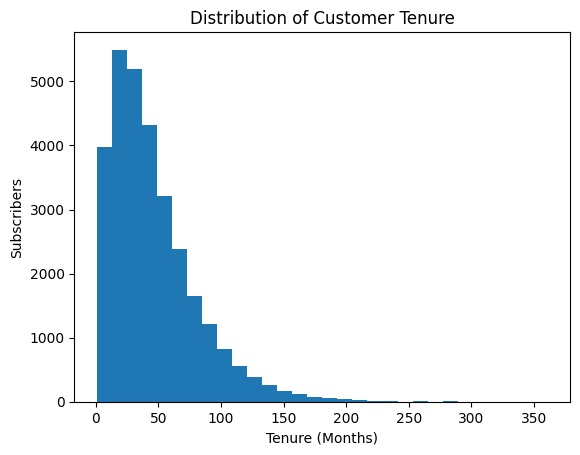

In [0]:
import matplotlib.pyplot as plt

#brief check on customer tenure, we can check out in detail later
plt.hist(df['Tenure_Months'], bins=30)
plt.xlabel('Tenure (Months)')
plt.ylabel('Subscribers')
plt.title('Distribution of Customer Tenure')
plt.show()

In [0]:
df['Plan_Price'].describe()

count    30000.000000
mean      1066.583533
std       1155.203460
min         49.000000
25%        299.000000
50%        499.000000
75%        999.000000
max       3999.000000
Name: Plan_Price, dtype: float64

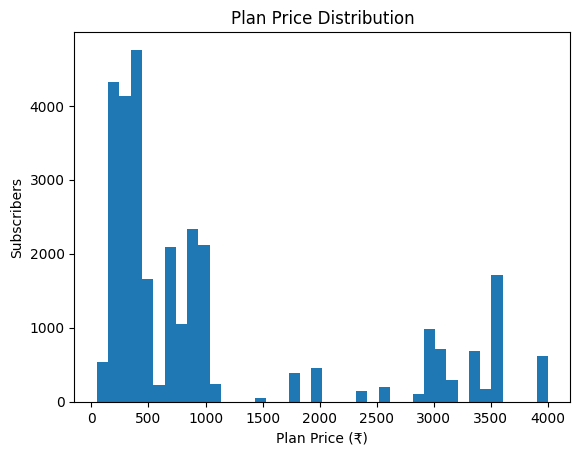

In [0]:
plt.hist(df['Plan_Price'], bins=40)
plt.xlabel('Plan Price (₹)')
plt.ylabel('Subscribers')
plt.title('Plan Price Distribution')
plt.show()

In [0]:
df['Plan_Validity_Days'].value_counts().sort_index()

Plan_Validity_Days
15        96
20        43
24       418
26       138
28     12299
30      1873
56      1131
84      6418
90       705
98       358
336      253
365     6128
395      140
Name: count, dtype: int64

In [0]:
df['Price_Per_Day'].describe()

count                   30000
unique                     55
top       10.6800000000000000
freq                     3705
Name: Price_Per_Day, dtype: object

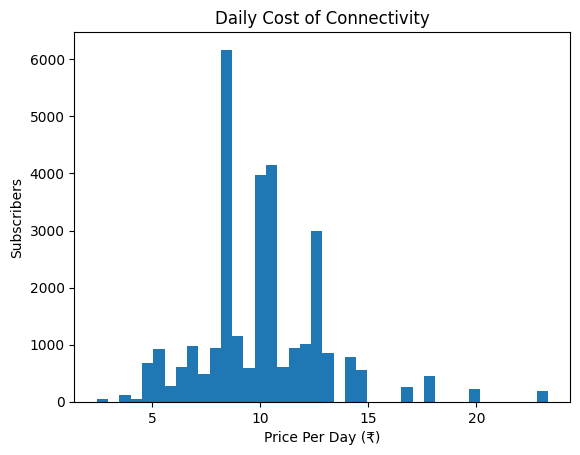

In [0]:
#this is a brief look into what consumers actually want to pay not the plan price
plt.hist(df['Price_Per_Day'], bins=40)
plt.xlabel('Price Per Day (₹)')
plt.ylabel('Subscribers')
plt.title('Daily Cost of Connectivity')
plt.show()

In [0]:
#checking the bundled services
df['VAS_Bundled_Flag'].value_counts().sort_index()

VAS_Bundled_Flag
0    8338
1    3474
2    4759
3    6242
4    3691
5    3496
Name: count, dtype: int64

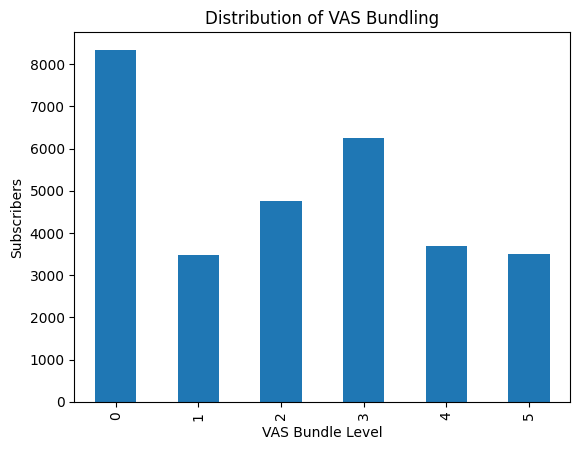

In [0]:
df['VAS_Bundled_Flag'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('VAS Bundle Level')
plt.ylabel('Subscribers')
plt.title('Distribution of VAS Bundling')
plt.show()

In [0]:
#number of people complaining about the bundled services
df['Unwanted_VAS_Complaint'].value_counts(normalize=True) * 100

Unwanted_VAS_Complaint
0    95.453333
1     4.546667
Name: proportion, dtype: float64

In [0]:
#checking network type and quality
df['Network_Type'].value_counts(normalize=True) * 100

Network_Type
4G        52.890000
5G-SA     25.823333
5G-NSA    19.916667
3G         0.933333
5G-Adv     0.356667
4G-Sat     0.080000
Name: proportion, dtype: float64

In [0]:
df['Avg_Daily_Usage_GB'].describe()

count                   30000
unique                   2816
top       2.00000000000000000
freq                      562
Name: Avg_Daily_Usage_GB, dtype: object

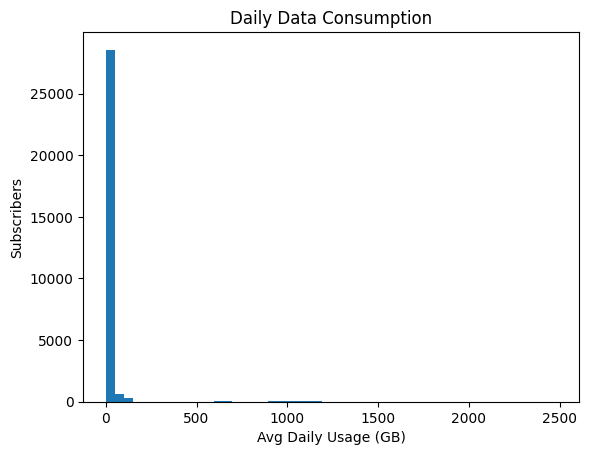

In [0]:
plt.hist(df['Avg_Daily_Usage_GB'], bins=50)
plt.xlabel('Avg Daily Usage (GB)')
plt.ylabel('Subscribers')
plt.title('Daily Data Consumption')
plt.show()

In [0]:
df['Call_Drop_Rate_Pct'].describe()

count                   30000
unique                    543
top       0.56000000000000005
freq                      324
Name: Call_Drop_Rate_Pct, dtype: object

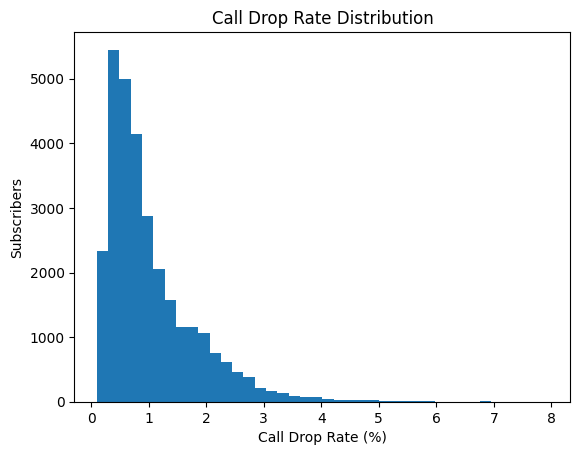

In [0]:
plt.hist(df['Call_Drop_Rate_Pct'], bins=40)
plt.xlabel('Call Drop Rate (%)')
plt.ylabel('Subscribers')
plt.title('Call Drop Rate Distribution')
plt.show()

In [0]:
df['Mute_Call_Freq'].describe()

count    30000.000000
mean         0.264133
std          0.833421
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: Mute_Call_Freq, dtype: float64

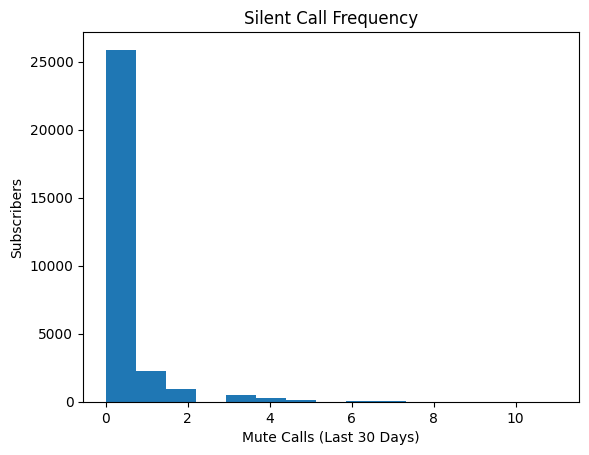

In [0]:
plt.hist(df['Mute_Call_Freq'], bins=15)
plt.xlabel('Mute Calls (Last 30 Days)')
plt.ylabel('Subscribers')
plt.title('Silent Call Frequency')
plt.show()

In [0]:
df['5G_Fallback_Count'].describe()

count    30000.000000
mean         4.900233
std          7.617433
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max         39.000000
Name: 5G_Fallback_Count, dtype: float64

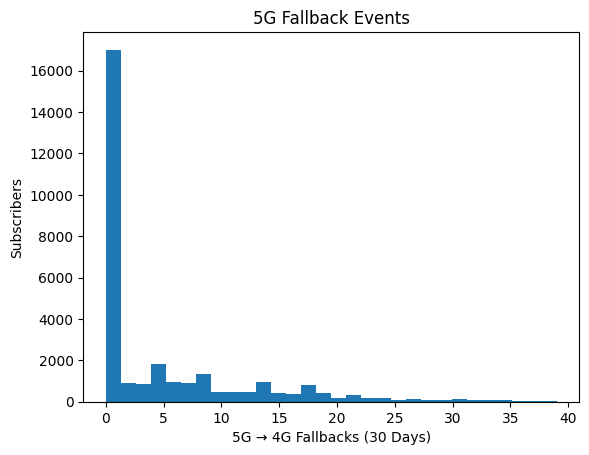

In [0]:
plt.hist(df['5G_Fallback_Count'], bins=30)
plt.xlabel('5G → 4G Fallbacks (30 Days)')
plt.ylabel('Subscribers')
plt.title('5G Fallback Events')
plt.show()

In [0]:
#now checking customer churn data
df['Support_Ticket_Count'].describe()

count    30000.000000
mean         0.211033
std          0.511117
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Support_Ticket_Count, dtype: float64

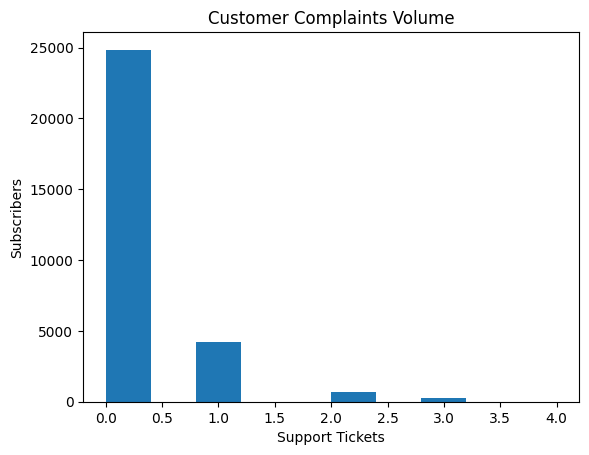

In [0]:
plt.hist(df['Support_Ticket_Count'], bins=10)
plt.xlabel('Support Tickets')
plt.ylabel('Subscribers')
plt.title('Customer Complaints Volume')
plt.show()

In [0]:
df['Complaint_Category'].value_counts()

Complaint_Category
Network    2565
Billing    1871
MNP         331
Spam        256
Service     122
Name: count, dtype: int64

In [0]:
df['MNP_Request_Flag'].value_counts(normalize=True) * 100

MNP_Request_Flag
0    96.543333
1     3.456667
Name: proportion, dtype: float64

In [0]:
df['MNP_Rejection_Reason'].value_counts()

MNP_Rejection_Reason
Dues Pending              168
Contractual Obligation     91
UPC Code Error             43
Name: count, dtype: int64

In [0]:
df['Churn_Status'].value_counts(normalize=True) * 100

Churn_Status
0    97.55
1     2.45
Name: proportion, dtype: float64

# Descriptive Analysis

## Item 1. Complaint Type Breakdown by Operator

What are people complaining about, and who gets blamed for what?

Objective = Decompose complaints by category across operators to see:

* Whether an operator’s complaint load is network-heavy or billing-heavy

* Whether specific pain points (e.g., Network vs Billing) are concentrated

* No normalization by users yet. No rates. Just composition.

In [0]:
# We only look at rows where a complaint exists
complaints_df = df[df['Support_Ticket_Count'] > 0].copy()
complaints_df.shape

(5145, 19)

In [0]:
complaints_df.head()

Subscriber_ID Company  ... MNP_Rejection_Reason  Churn_Status
3          100004    BSNL  ...                 None             1
10         100011    BSNL  ...                 None             0
11         100012      Vi  ...                 None             0
19         100020    BSNL  ...                 None             0
21         100022     Jio  ...                 None             0

[5 rows x 19 columns]

In [0]:
complaints_df['Complaint_Category'].value_counts()

Complaint_Category
Network    2565
Billing    1871
MNP         331
Spam        256
Service     122
Name: count, dtype: int64

In [0]:
# Overall complaint category distribution (market-wide)
complaints_df['Complaint_Category'].value_counts(normalize=True).mul(100).round(2)

Complaint_Category
Network    49.85
Billing    36.37
MNP         6.43
Spam        4.98
Service     2.37
Name: proportion, dtype: float64

In [0]:
# we see that there are too many network and billing complaint
# now let's check which operator gets what kind of complaints
complaint_by_operator = pd.crosstab(
    complaints_df['Company'],
    complaints_df['Complaint_Category']
)

complaint_by_operator

Complaint_Category  Billing  MNP  Network  Service  Spam
Company                                                 
Airtel                  701    4      373       24    43
BSNL                      7   85      577       17    19
Jio                     764   82      514       71   157
Vi                      399  160     1101       10    37

In [0]:
# Complaint composition within each operator (row-wise %)
complaint_mix_pct = (
    complaint_by_operator
    .div(complaint_by_operator.sum(axis=1), axis=0)
    .mul(100)
    .round(2)
)

complaint_mix_pct

Complaint_Category  Billing    MNP  Network  Service  Spam
Company                                                   
Airtel                61.22   0.35    32.58     2.10  3.76
BSNL                   0.99  12.06    81.84     2.41  2.70
Jio                   48.11   5.16    32.37     4.47  9.89
Vi                    23.37   9.37    64.50     0.59  2.17

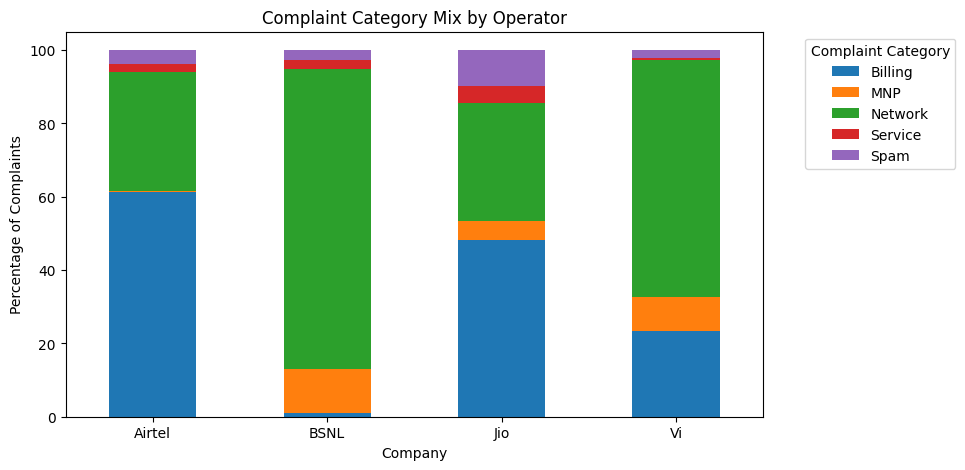

In [0]:
complaint_mix_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)

plt.ylabel('Percentage of Complaints')
plt.title('Complaint Category Mix by Operator')
plt.xticks(rotation=0)
plt.legend(title='Complaint Category', bbox_to_anchor=(1.05, 1))
plt.show()

We can clearly see what kind of complaints each operator has.

In [0]:
# defining the complaint indicator
df['Has_Complaint'] = (df['Support_Ticket_Count'] > 0).astype(int)

In [0]:
# Complaint Rate = (# users with ≥1 complaint) / (total users of operator)
complaint_rate = (
    df.groupby('Company')['Has_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

complaint_rate.columns = ['Company', 'Complaint_Rate_Pct']
complaint_rate

Company  Complaint_Rate_Pct
0  Airtel               10.65
1    BSNL               32.90
2     Jio               12.44
3      Vi               39.30

This shows that BSNL and Vi has the most number of complaints from their operators

In [0]:
market_share = df['Company'].value_counts(normalize=True).mul(100).round(2).reset_index()
market_share.columns = ['Company', 'Market_Share_Pct']

comparison_df = market_share.merge(
    complaint_rate,
    on='Company',
    how='left'
)

comparison_full = comparison_df.merge(
    complaint_mix_pct.reset_index(), # Reset index to merge on 'Company'
    on='Company',
    how='left'
)

comparison_full

Company  Market_Share_Pct  Complaint_Rate_Pct  ...  Network  Service  Spam
0     Jio             42.54               12.44  ...    32.37     4.47  9.89
1  Airtel             35.84               10.65  ...    32.58     2.10  3.76
2      Vi             14.48               39.30  ...    64.50     0.59  2.17
3    BSNL              7.14               32.90  ...    81.84     2.41  2.70

[4 rows x 8 columns]

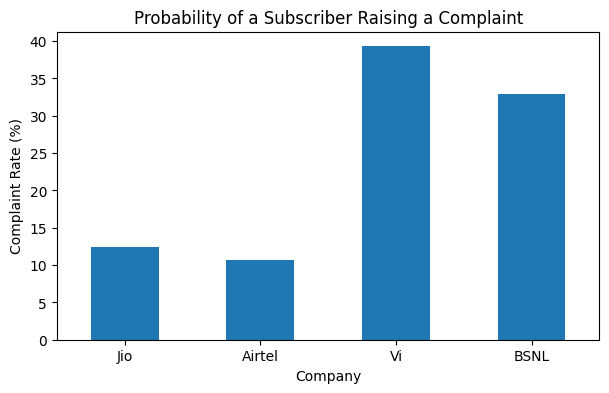

In [0]:
comparison_full.set_index('Company')['Complaint_Rate_Pct'].plot(
    kind='bar',
    figsize=(7,4)
)

plt.ylabel('Complaint Rate (%)')
plt.title('Probability of a Subscriber Raising a Complaint')
plt.xticks(rotation=0)
plt.show()

In [0]:
# now grilling on the network related complaints
df['Has_Network_Complaint'] = np.where(
    (df['Support_Ticket_Count'] > 0) &
    (df['Complaint_Category'] == 'Network'),
    1,
    0
)

In [0]:
network_complaint_rate = (
    df.groupby('Company')['Has_Network_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

network_complaint_rate.columns = ['Company', 'Network_Complaint_Rate_Pct']
network_complaint_rate

Company  Network_Complaint_Rate_Pct
0  Airtel                        3.47
1    BSNL                       26.92
2     Jio                        4.03
3      Vi                       25.35

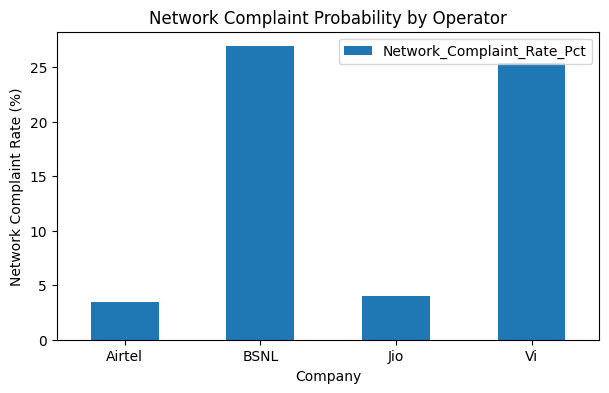

In [0]:
network_complaint_rate.set_index('Company').plot(
    kind='bar',
    figsize=(7,4)
)

plt.ylabel('Network Complaint Rate (%)')
plt.title('Network Complaint Probability by Operator')
plt.xticks(rotation=0)
plt.show()

In [0]:
# now checking where exactly the complaints are coming from?
region_complaint_rate = (
    df.groupby('Region_Tier')['Has_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

region_complaint_rate

Region_Tier  Has_Complaint
0       Metro          18.66
1       Rural          16.85
2      Tier-1          17.98
3      Tier-2          15.59

In [0]:
company_region_complaint = (
    df.groupby(['Company', 'Region_Tier'])['Has_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

company_region_complaint

Company Region_Tier  Has_Complaint
0   Airtel       Metro          11.83
1   Airtel       Rural          10.77
2   Airtel      Tier-1          10.13
3   Airtel      Tier-2          10.22
4     BSNL       Metro          32.34
5     BSNL       Rural          33.73
6     BSNL      Tier-1          36.13
7     BSNL      Tier-2          29.08
8      Jio       Metro          15.71
9      Jio       Rural          10.94
10     Jio      Tier-1          13.83
11     Jio      Tier-2          10.59
12      Vi       Metro          38.01
13      Vi       Rural          40.29
14      Vi      Tier-1          39.87
15      Vi      Tier-2          38.29

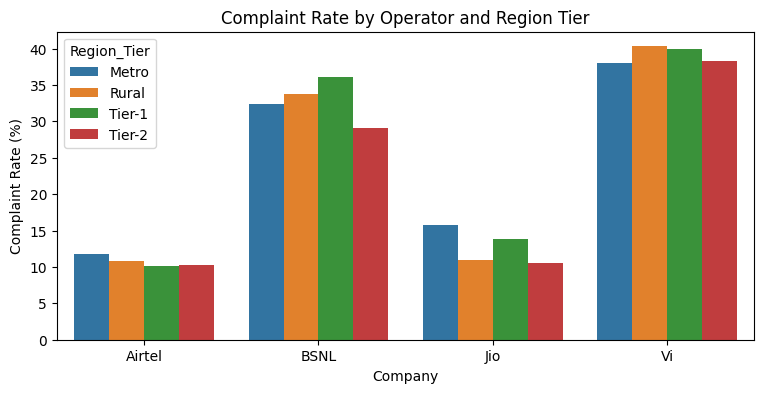

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))
sns.barplot(
    data=company_region_complaint,
    x='Company',
    y='Has_Complaint',
    hue='Region_Tier'
)

plt.ylabel('Complaint Rate (%)')
plt.title('Complaint Rate by Operator and Region Tier')
plt.xticks(rotation=0)
plt.show()

Now we can start narrowing down the network problems for each operator first which are:

1. Call drop rate
2. Mute call freq
3. 5G fallback freq

### Call Drop Issues

In [0]:
df['Call_Drop_Rate_Pct'].describe()
#(df['Call_Drop_Rate_Pct'] > 2).mean() * 100

count                   30000
unique                    543
top       0.56000000000000005
freq                      324
Name: Call_Drop_Rate_Pct, dtype: object

In [0]:
#df['Call_Drop_Rate_Pct'].describe()
(df['Call_Drop_Rate_Pct'] > 2).mean() * 100

np.float64(11.35)

In [0]:
# call drop rate by operator
operator_call_drop = (
    df.groupby('Company')['Call_Drop_Rate_Pct']
      .agg(['mean', 'median'])
      .round(2)
      .reset_index()
)

operator_call_drop

Company      mean median
0  Airtel  0.859778   0.73
1    BSNL  1.812044   1.22
2     Jio  0.862044   0.73
3      Vi  1.592676    1.6

In [0]:
# checking the poor quality incidences
df.assign(
    Poor_Call_Quality = df['Call_Drop_Rate_Pct'] > 2
).groupby('Company')['Poor_Call_Quality'].mean().mul(100).round(2)

Company
Airtel     4.01
BSNL      37.75
Jio        3.68
Vi        39.03
Name: Poor_Call_Quality, dtype: float64

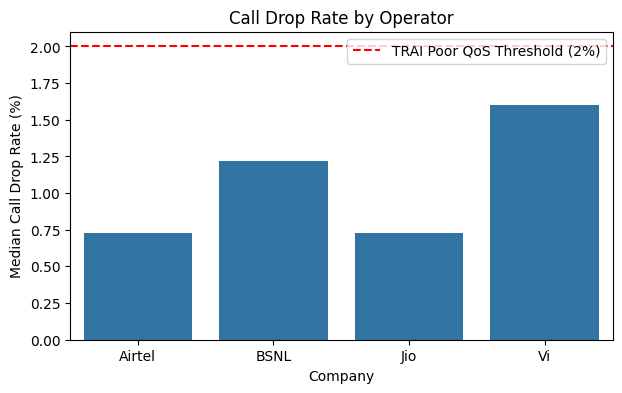

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=operator_call_drop,
    x='Company',
    y='median'
)

plt.axhline(2, color='red', linestyle='--', label='TRAI Poor QoS Threshold (2%)')
plt.ylabel('Median Call Drop Rate (%)')
plt.title('Call Drop Rate by Operator')
plt.legend()
plt.show()

In [0]:
# region wise operator call drop issues
region_call_drop = (
    df.groupby('Region_Tier')['Call_Drop_Rate_Pct']
      .agg(['mean', 'median'])
      .round(2)
      .reset_index()
)

region_call_drop

Region_Tier      mean median
0       Metro  1.175155   0.99
1       Rural  1.032125   0.72
2      Tier-1  1.083582    0.9
3      Tier-2    0.8874    0.6

In [0]:
df.assign(
    Poor_Call_Quality = df['Call_Drop_Rate_Pct'] > 2
).groupby('Region_Tier')['Poor_Call_Quality'].mean().mul(100).round(2)

Region_Tier
Metro     11.63
Rural     13.77
Tier-1    10.42
Tier-2     9.12
Name: Poor_Call_Quality, dtype: float64

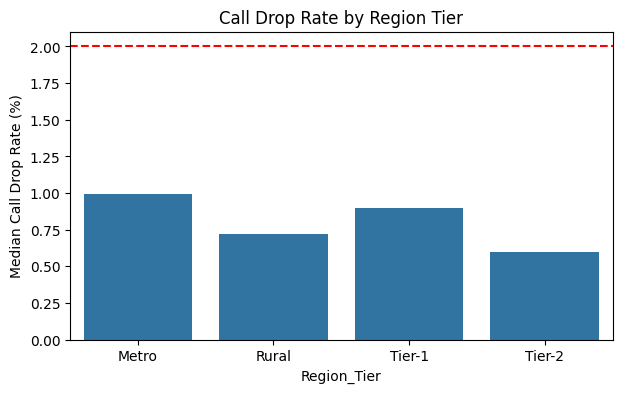

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=region_call_drop,
    x='Region_Tier',
    y='median'
)

plt.axhline(2, color='red', linestyle='--')
plt.ylabel('Median Call Drop Rate (%)')
plt.title('Call Drop Rate by Region Tier')
plt.show()

In [0]:
# checking which operators have call drop issue and in which respective region
op_region_call_drop = (
    df.groupby(['Company', 'Region_Tier'])['Call_Drop_Rate_Pct']
      .median()
      .round(2)
      .reset_index()
)

op_region_call_drop

Company Region_Tier Call_Drop_Rate_Pct
0   Airtel       Metro               0.93
1   Airtel       Rural               0.66
2   Airtel      Tier-1               0.82
3   Airtel      Tier-2               0.58
4     BSNL       Metro              1.275
5     BSNL       Rural              1.235
6     BSNL      Tier-1               1.41
7     BSNL      Tier-2               0.72
8      Jio       Metro               0.94
9      Jio       Rural               0.66
10     Jio      Tier-1               0.84
11     Jio      Tier-2               0.58
12      Vi       Metro               1.55
13      Vi       Rural               1.72
14      Vi      Tier-1                1.7
15      Vi      Tier-2              1.165

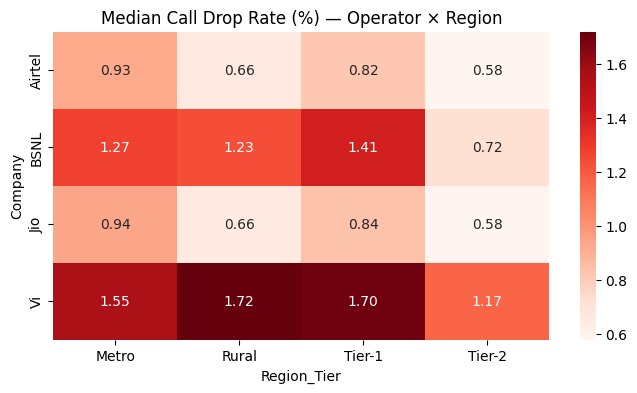

In [0]:
call_drop_heatmap = op_region_call_drop.pivot(
    index='Company',
    columns='Region_Tier',
    values='Call_Drop_Rate_Pct'
)

call_drop_heatmap = call_drop_heatmap.astype(float)

plt.figure(figsize=(8,4))
sns.heatmap(
    call_drop_heatmap,
    annot=True,
    fmt=".2f",
    cmap='Reds'
)

plt.title('Median Call Drop Rate (%) — Operator × Region')
plt.show()

* We can observe that Vi performs poorly across all regions with respect to the issue of call drop rate among all operators. One major reason could be the ongoing network infrastructure upgradation and mobile tower/area expansion.

* Another thing to notice is that BSNL, being a government owned operator is also facing issues at almost across all regions, though their call drop rate is less than that of Vi's. Still, the same reason can be applied to them too with respect to the call drop issue.

* In Tier-2 and Rural regions, both Jio and Airtel have similar call drop rate. And same can be observed in Metro and Tier-1 regions, for both operators, due to high population density and huge network traffic congestion. Overall, both of these must try to minimise this issue across all regions.

### Mute Call Issues

In [0]:
df['Mute_Call_Freq'].describe()
#(df['Mute_Call_Freq'] > 0).mean() * 100

count    30000.000000
mean         0.264133
std          0.833421
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: Mute_Call_Freq, dtype: float64

In [0]:
#df['Mute_Call_Freq'].describe()
(df['Mute_Call_Freq'] > 0).mean() * 100

np.float64(13.77)

In [0]:
# checking the mute call issue by operators
operator_mute = (
    df.assign(
        Has_Mute = df['Mute_Call_Freq'] > 0
    )
    .groupby('Company')['Has_Mute']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

operator_mute

Company  Has_Mute
0  Airtel      6.03
1    BSNL      3.08
2     Jio     25.82
3      Vi      2.81

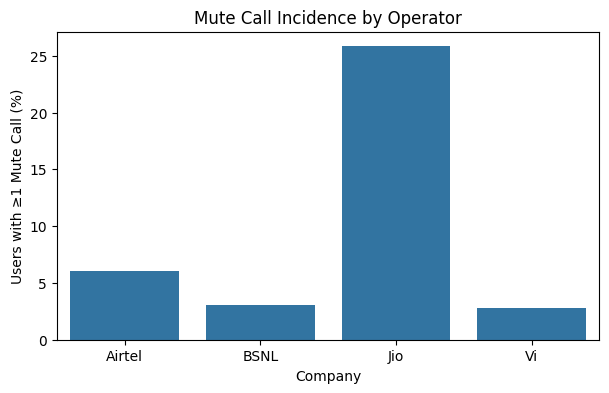

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=operator_mute,
    x='Company',
    y='Has_Mute'
)

plt.ylabel('Users with ≥1 Mute Call (%)')
plt.title('Mute Call Incidence by Operator')
plt.show()

In [0]:
# checking the mute call issue by region
region_mute = (
    df.assign(
        Has_Mute = df['Mute_Call_Freq'] > 0
    )
    .groupby('Region_Tier')['Has_Mute']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

region_mute

Region_Tier  Has_Mute
0       Metro     18.79
1       Rural     10.05
2      Tier-1     17.53
3      Tier-2     10.89

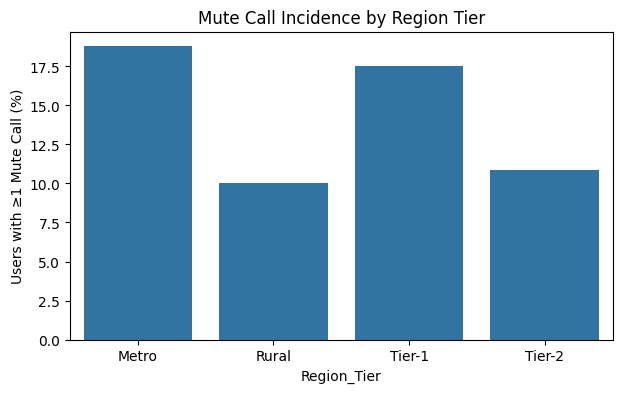

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=region_mute,
    x='Region_Tier',
    y='Has_Mute'
)

plt.ylabel('Users with ≥1 Mute Call (%)')
plt.title('Mute Call Incidence by Region Tier')
plt.show()

In [0]:
# checking which operators have mute call issue and in which respective region
op_region_mute = (
    df.assign(
        Has_Mute = df['Mute_Call_Freq'] > 0
    )
    .groupby(['Company', 'Region_Tier'])['Has_Mute']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

op_region_mute

Company Region_Tier  Has_Mute
0   Airtel       Metro      8.06
1   Airtel       Rural      3.85
2   Airtel      Tier-1      7.72
3   Airtel      Tier-2      5.45
4     BSNL       Metro      3.26
5     BSNL       Rural      3.88
6     BSNL      Tier-1      2.74
7     BSNL      Tier-2      2.33
8      Jio       Metro     35.62
9      Jio       Rural     18.54
10     Jio      Tier-1     34.12
11     Jio      Tier-2     19.51
12      Vi       Metro      2.62
13      Vi       Rural      3.27
14      Vi      Tier-1      2.69
15      Vi      Tier-2      2.46

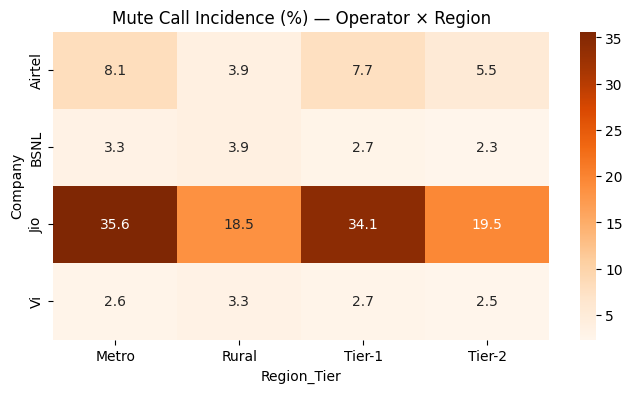

In [0]:
mute_heatmap = op_region_mute.pivot(
    index='Company',
    columns='Region_Tier',
    values='Has_Mute'
)

plt.figure(figsize=(8,4))
sns.heatmap(
    mute_heatmap,
    annot=True,
    fmt=".1f",
    cmap='Oranges'
)

plt.title('Mute Call Incidence (%) — Operator × Region')
plt.show()

* It can be observed that Jio has the major mute call issues across all regions. This occurs when call is connected but no audio is transmitted to each side is usually due to bidirectional audio failure in VoIP systems.

* This happens not from muting, but when Real-time Transport Protocol (RTP) audio packets fail to transmit in either direction. Key causes include: Network Address Translation (NAT) misconfiguration, where private IPs are shared instead of public ones; SIP Application Layer Gateway (ALG) interference, which corrupts signaling; firewall blocking of RTP ports; and asymmetric routing, where network paths allow call setup (via Session Initiation Protocol, SIP) but break the media stream.

### 5G Fallback Issues

In [0]:
df['5G_Fallback_Count'].describe()
#(df['5G_Fallback_Count'] > 0).mean() * 100

count    30000.000000
mean         4.900233
std          7.617433
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max         39.000000
Name: 5G_Fallback_Count, dtype: float64

In [0]:
#df['5G_Fallback_Count'].describe()
(df['5G_Fallback_Count'] > 0).mean() * 100

np.float64(45.10333333333333)

In [0]:
# checking the 5G fallback issue by operator
operator_fallback = (
    df.assign(
        Has_Fallback = df['5G_Fallback_Count'] > 0
    )
    .groupby('Company')['Has_Fallback']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

operator_fallback

Company  Has_Fallback
0  Airtel         57.96
1    BSNL          0.00
2     Jio         57.19
3      Vi          0.00

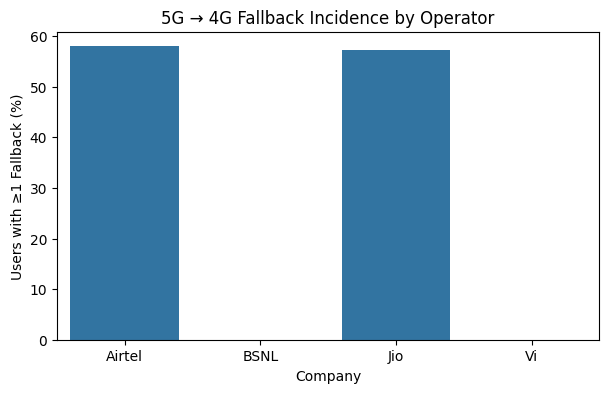

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=operator_fallback,
    x='Company',
    y='Has_Fallback'
)

plt.ylabel('Users with ≥1 Fallback (%)')
plt.title('5G → 4G Fallback Incidence by Operator')
plt.show()

In [0]:
# checking the 5G fallback issue by regions
region_fallback = (
    df.assign(
        Has_Fallback = df['5G_Fallback_Count'] > 0
    )
    .groupby('Region_Tier')['Has_Fallback']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

region_fallback

Region_Tier  Has_Fallback
0       Metro         62.63
1       Rural         33.67
2      Tier-1         56.23
3      Tier-2         35.21

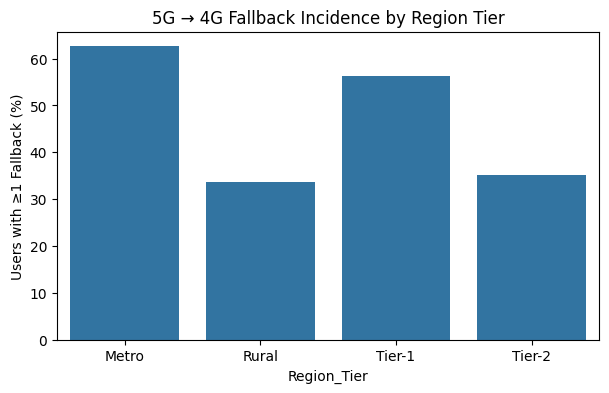

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=region_fallback,
    x='Region_Tier',
    y='Has_Fallback'
)

plt.ylabel('Users with ≥1 Fallback (%)')
plt.title('5G → 4G Fallback Incidence by Region Tier')
plt.show()

In [0]:
# checking which operators have 5G fallback issue and in which respective region
op_region_fallback = (
    df.assign(
        Has_Fallback = df['5G_Fallback_Count'] > 0
    )
    .groupby(['Company', 'Region_Tier'])['Has_Fallback']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

op_region_fallback

Company Region_Tier  Has_Fallback
0   Airtel       Metro         80.17
1   Airtel       Rural         43.84
2   Airtel      Tier-1         72.28
3   Airtel      Tier-2         44.20
4     BSNL       Metro          0.00
5     BSNL       Rural          0.00
6     BSNL      Tier-1          0.00
7     BSNL      Tier-2          0.00
8      Jio       Metro         78.92
9      Jio       Rural         42.53
10     Jio      Tier-1         72.16
11     Jio      Tier-2         44.86
12      Vi       Metro          0.00
13      Vi       Rural          0.00
14      Vi      Tier-1          0.00
15      Vi      Tier-2          0.00

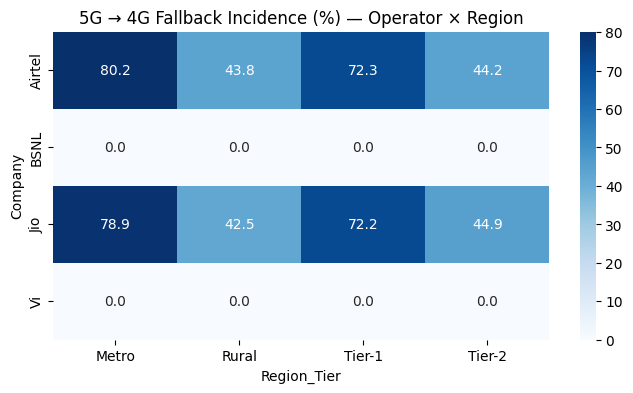

In [0]:
fallback_heatmap = op_region_fallback.pivot(
    index='Company',
    columns='Region_Tier',
    values='Has_Fallback'
)

plt.figure(figsize=(8,4))
sns.heatmap(
    fallback_heatmap,
    annot=True,
    fmt=".1f",
    cmap='Blues'
)

plt.title('5G → 4G Fallback Incidence (%) — Operator × Region')
plt.show()

It can be observed that both Jio and Airtel have fallback issue more than 70% in both Metro and Tier-1 cities and more than 40% in both Tier-2 and Rural region. Major factors that lead to this can be:

* **Network Architecture**: Jio uses a Standalone (SA) 5G architecture, which is built independently of 4G. While this allows for true 5G performance, voice calls (VoNR) are still under development. When a call is made, Jio devices fall back to 4G (EPS Fallback) because 5G voice is not fully operational yet. Airtel relies on Non-Standalone (NSA) 5G, which depends on 4G for control signaling. This means even when connected to 5G, the network uses 4G infrastructure in the background, making fallbacks seamless but less efficient. This setup can lead to 4G data being consumed even when 5G is displayed, causing user confusion and data exhaustion.

* **Network Congestion and Spectrum Constraints**: Rapid 5G adoption has led to network congestion, especially in urban areas. A report by Opensignal found that 5G speeds have declined for both operators due to increased traffic. Only 16% of 5G connections use low-band (700MHz) spectrum, which offers better coverage. The majority use mid-band (3.5GHz), which is faster but has limited range and poor indoor penetration. When overloaded, networks scale back, forcing devices to fall back to 4G.

* **User Experience and Data Management**: Some users report that Airtel deducts 4G data even when 5G is active, due to NSA architecture. This has led to perceptions of unfair data usage. Jio’s unlimited 5G plans have led to network strain, with some users experiencing speed throttling or forced fallbacks during peak hours.

In [0]:
# checking the overall network related issues by layers
network_type_summary = (
    df.groupby('Network_Type')
      .agg(
          Call_Drop_Median=('Call_Drop_Rate_Pct', 'median'),
          Mute_Call_Pct=('Mute_Call_Freq', lambda x: (x > 0).mean() * 100),
          Fallback_Pct=('5G_Fallback_Count', lambda x: (x > 0).mean() * 100)
      )
      .round(2)
      .reset_index()
)

network_type_summary

Network_Type Call_Drop_Median  Mute_Call_Pct  Fallback_Pct
0           3G            0.955           0.00          0.00
1           4G             0.86           3.22          0.00
2       4G-Sat             0.59           4.17          0.00
3       5G-Adv             1.02           3.74        100.00
4       5G-NSA             0.67           8.20         97.62
5        5G-SA             0.74          40.34         97.99

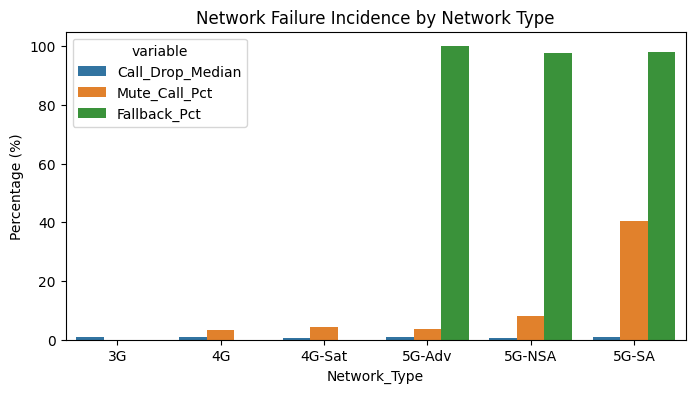

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=network_type_summary.melt(
        id_vars='Network_Type',
        value_vars=['Call_Drop_Median','Mute_Call_Pct', 'Fallback_Pct']
    ),
    x='Network_Type',
    y='value',
    hue='variable'
)

plt.ylabel('Percentage (%)')
plt.title('Network Failure Incidence by Network Type')
plt.show()

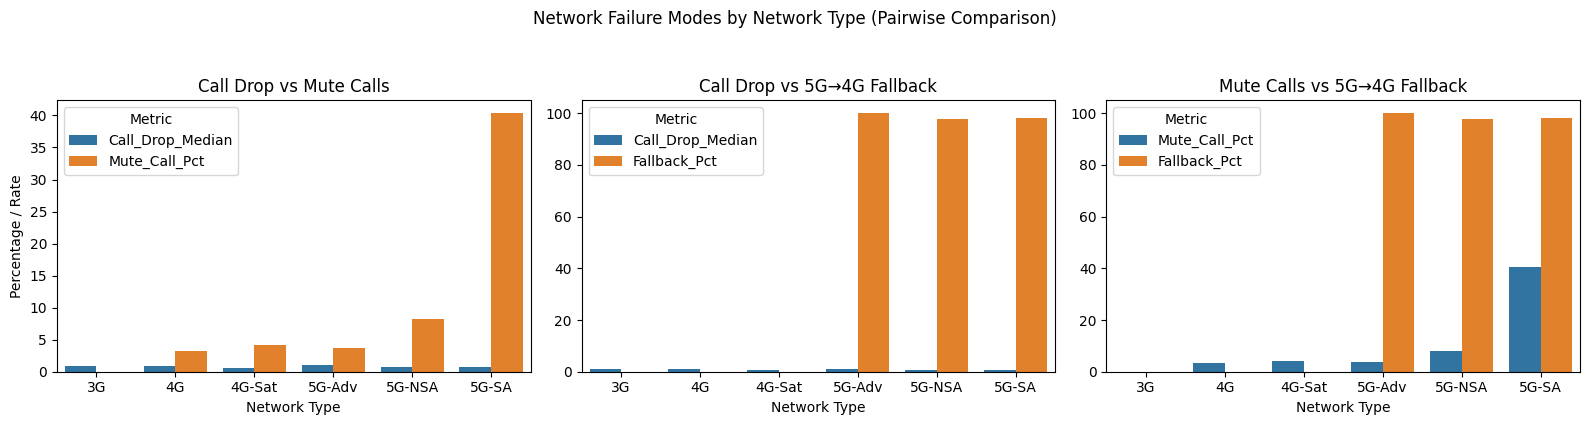

In [0]:
# barplots
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharey=False)

# Call Drop vs Mute Call
sns.barplot(
    data=network_type_summary.melt(
        id_vars='Network_Type',
        value_vars=['Call_Drop_Median', 'Mute_Call_Pct']
    ),
    x='Network_Type',
    y='value',
    hue='variable',
    ax=axes[0]
)

axes[0].set_title('Call Drop vs Mute Calls')
axes[0].set_ylabel('Percentage / Rate')
axes[0].set_xlabel('Network Type')
axes[0].legend(title='Metric')

# Call Drop vs Fallback
sns.barplot(
    data=network_type_summary.melt(
        id_vars='Network_Type',
        value_vars=['Call_Drop_Median', 'Fallback_Pct']
    ),
    x='Network_Type',
    y='value',
    hue='variable',
    ax=axes[1]
)

axes[1].set_title('Call Drop vs 5G→4G Fallback')
axes[1].set_ylabel('')
axes[1].set_xlabel('Network Type')
axes[1].legend(title='Metric')

# Mute Call vs Fallback
sns.barplot(
    data=network_type_summary.melt(
        id_vars='Network_Type',
        value_vars=['Mute_Call_Pct', 'Fallback_Pct']
    ),
    x='Network_Type',
    y='value',
    hue='variable',
    ax=axes[2]
)

axes[2].set_title('Mute Calls vs 5G→4G Fallback')
axes[2].set_ylabel('')
axes[2].set_xlabel('Network Type')
axes[2].legend(title='Metric')

plt.suptitle('Network Failure Modes by Network Type (Pairwise Comparison)', y=1.05)
plt.tight_layout()
plt.show()

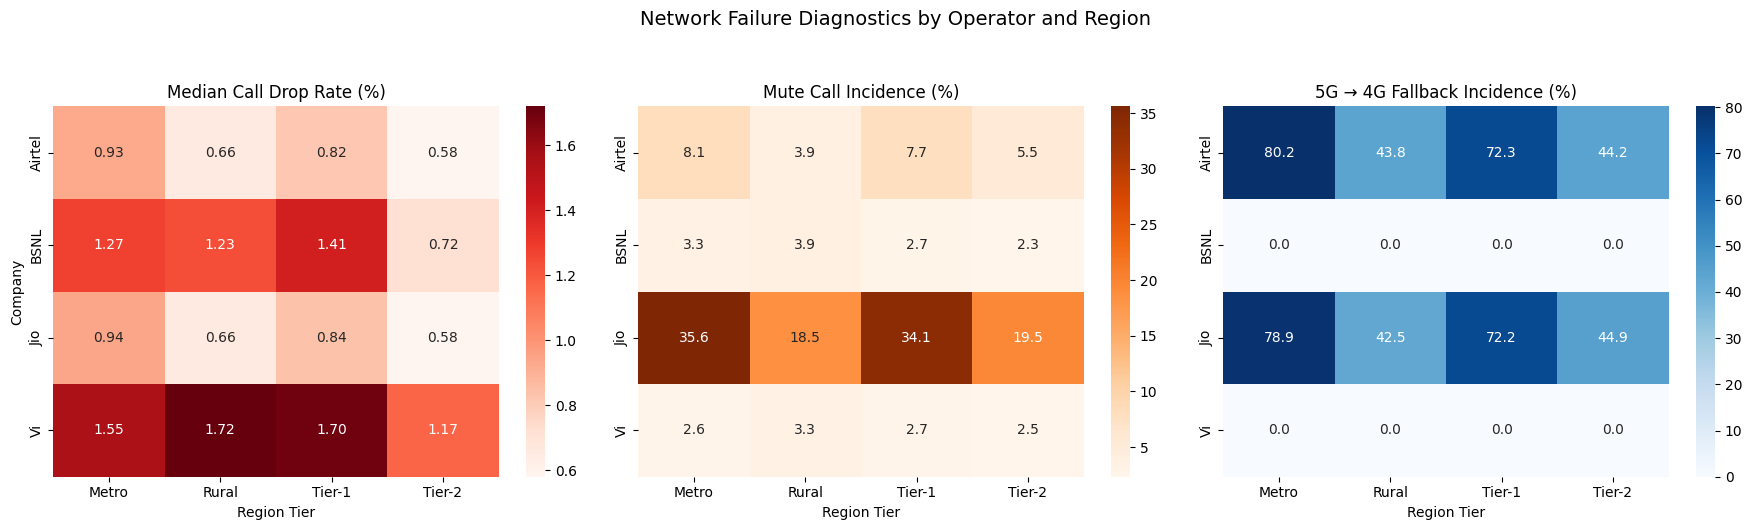

In [0]:
# heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Call Drop Rate
sns.heatmap(
    call_drop_heatmap,
    annot=True,
    fmt=".2f",
    cmap='Reds',
    ax=axes[0]
)

axes[0].set_title('Median Call Drop Rate (%)')
axes[0].set_xlabel('Region Tier')
axes[0].set_ylabel('Company')

# Mute Call Incidence
sns.heatmap(
    mute_heatmap,
    annot=True,
    fmt=".1f",
    cmap='Oranges',
    ax=axes[1]
)

axes[1].set_title('Mute Call Incidence (%)')
axes[1].set_xlabel('Region Tier')
axes[1].set_ylabel('')

# 5G → 4G Fallback
sns.heatmap(
    fallback_heatmap,
    annot=True,
    fmt=".1f",
    cmap='Blues',
    ax=axes[2]
)

axes[2].set_title('5G → 4G Fallback Incidence (%)')
axes[2].set_xlabel('Region Tier')
axes[2].set_ylabel('')

plt.suptitle(
    'Network Failure Diagnostics by Operator and Region',
    fontsize=14,
    y=1.05
)

plt.tight_layout()
plt.show()

## 2. Mobile Plans Inflation

In this section we will be covering rise of mobile plan price for each operator with respect to different kind of plans and customer (region and network) and answer these questions:

1. Is inflation real?
2. Who is more expensive?
3. How does validity drive inflation?
4. How do bundles escalate prices?
5. Does higher price = higher value?
6. Is there any price difference as per region?


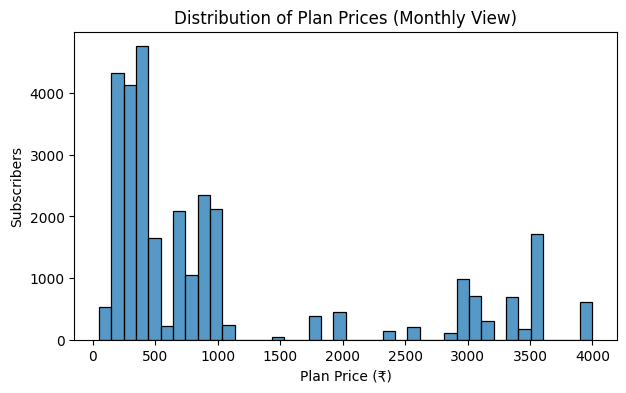

In [0]:
# checking out plan price distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Plan_Price'], bins=40, kde=False)

plt.xlabel('Plan Price (₹)')
plt.ylabel('Subscribers')
plt.title('Distribution of Plan Prices (Monthly View)')
plt.show()

In [0]:
# checking out plan validity distribution
df['Plan_Validity_Days'].value_counts().sort_index()

Plan_Validity_Days
15        96
20        43
24       418
26       138
28     12299
30      1873
56      1131
84      6418
90       705
98       358
336      253
365     6128
395      140
Name: count, dtype: int64

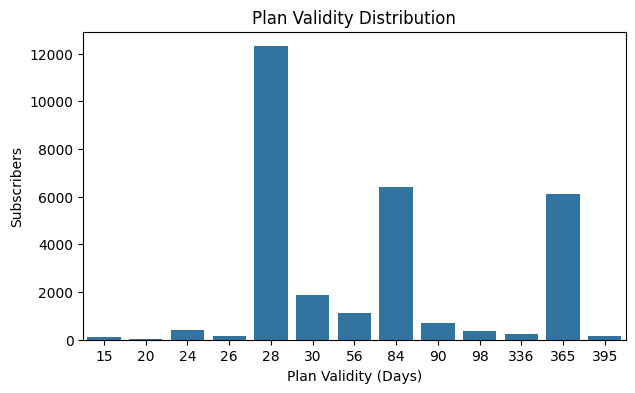

In [0]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=df,
    x='Plan_Validity_Days',
    order=sorted(df['Plan_Validity_Days'].unique())
)

plt.xlabel('Plan Validity (Days)')
plt.ylabel('Subscribers')
plt.title('Plan Validity Distribution')
plt.show()

We can see that there are plan with 28 and 84 days validity. These days are very strategically set up so that the customer pay more for the same plan(s) which have validity of 30 and 90 days. This way, no day is left behind in a month and billing could have been much more convenient for customers.

In [0]:
# checking out price per day
df['Price_Per_Day'].describe()

count                   30000
unique                     55
top       10.6800000000000000
freq                     3705
Name: Price_Per_Day, dtype: object

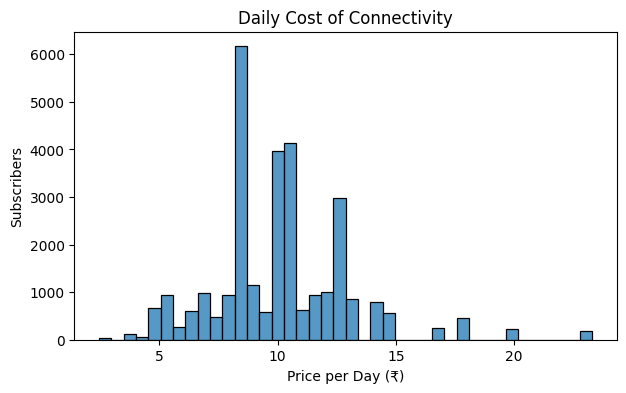

In [0]:
plt.figure(figsize=(7,4))
sns.histplot(df['Price_Per_Day'], bins=40)

plt.xlabel('Price per Day (₹)')
plt.ylabel('Subscribers')
plt.title('Daily Cost of Connectivity')
plt.show()

We can see that most of the price lies between 5 to 15, which is justified and also there can be multitude of reason like differences in mobile plans, bundled services, etc.

For example, if a mobile plan of ₹900 for validity of 90 days, comes about to ₹10/day. Similarly, this distribution show the same for other plans too. The point to note here could be the prices less than ₹5/day and more than ₹15/day. This can be explained that for the former, the reason could be the basic plan provided by the operator. For the latter, the bundled services added to the mobile plan might be increasing the per day price.  

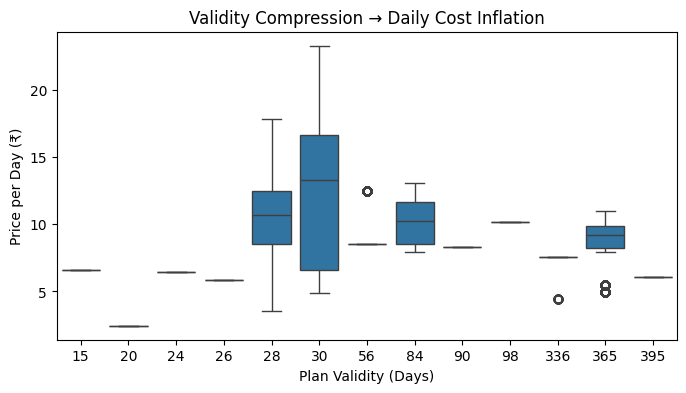

In [0]:
# checking out price per day vs plan validity (this could be an inflation metric)
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Plan_Validity_Days',
    y='Price_Per_Day',
    order=sorted(df['Plan_Validity_Days'].unique())
)

plt.xlabel('Plan Validity (Days)')
plt.ylabel('Price per Day (₹)')
plt.title('Validity Compression → Daily Cost Inflation')
plt.show()

Through this plot we can get some clarity like:

* Shorter plan validities systematically lead to higher effective daily costs, indicating that price inflation in telecom services is primarily embedded in plan design (validity length) rather than visible increases in advertised plan prices.

* 28-day and 30-day plans show the highest variability in price per day, revealing that users on similarly priced “monthly” plans can experience substantially different daily costs, making inflation opaque and difficult for consumers to detect.

* Long-duration plans (84–365 days) tend to reduce the daily cost of connectivity, but they require larger upfront payments, effectively rewarding long-term financial commitment while limiting flexibility for price-sensitive users.

In [0]:
# operator wise price per day of mobile plan
operator_daily_cost = (
    df.groupby('Company')['Price_Per_Day']
      .agg(['median', 'mean'])
      .round(2)
      .reset_index()
)

operator_daily_cost

Company median       mean
0  Airtel  10.68  10.905502
1    BSNL   6.07   7.309589
2     Jio  10.23  10.195478
3      Vi   8.55   9.334419

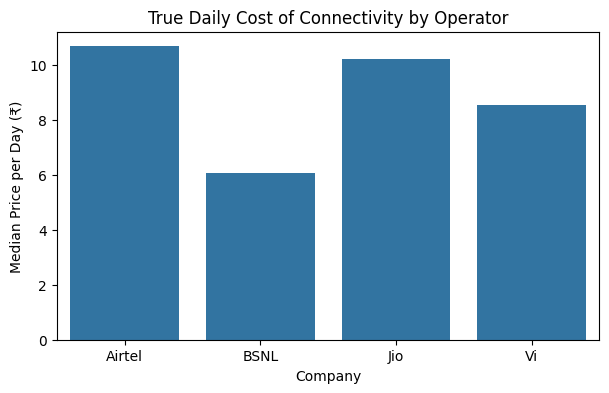

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=operator_daily_cost,
    x='Company',
    y='median'
)

plt.ylabel('Median Price per Day (₹)')
plt.title('True Daily Cost of Connectivity by Operator')
plt.show()

When normalized by plan validity, Airtel and Jio show the highest median price per day, indicating higher effective daily costs despite similar-looking monthly plan prices.

BSNL has the lowest median daily cost, reflecting its positioning as a low-cost, long-validity–oriented operator rather than a premium service provider.

Vi sits between public and private operators, suggesting partial price pressure without the aggressive daily-cost escalation seen in the duopoly.

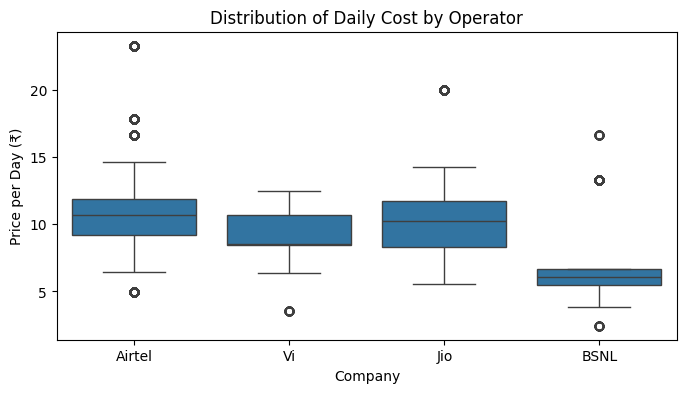

In [0]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Company',
    y='Price_Per_Day'
)

plt.ylabel('Price per Day (₹)')
plt.title('Distribution of Daily Cost by Operator')
plt.show()

Airtel and Jio exhibit wider distributions and higher upper outliers, indicating that a significant subset of users pays substantially more per day than the median.

BSNL’s distribution is tightly clustered at lower daily prices, showing limited price dispersion and fewer premium or bundled plan structures.

The presence of high-value outliers for private operators suggests that daily cost inflation is unevenly distributed, affecting certain customer segments more than others.

In [0]:
# combining company, plan validity and daily cost
inflation_heatmap = (
    df.groupby(['Company', 'Plan_Validity_Days'])['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
      .pivot(
          index='Company',
          columns='Plan_Validity_Days',
          values='Price_Per_Day'
      )
)

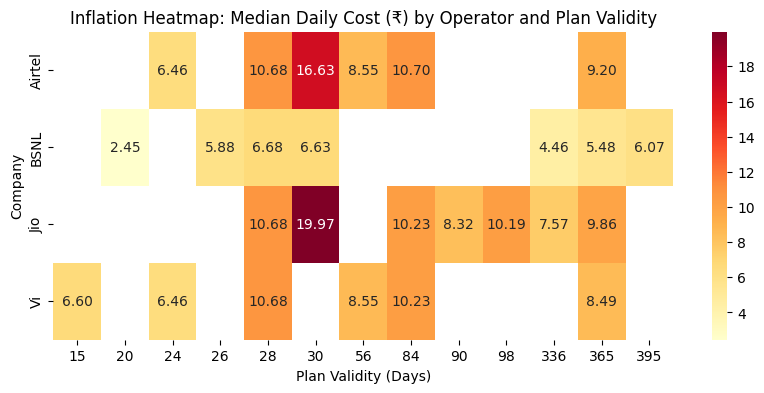

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

inflation_heatmap = inflation_heatmap.apply(
    pd.to_numeric,
    errors='coerce'
)

inflation_heatmap = inflation_heatmap.dropna(axis=1, how='all')

inflation_heatmap = inflation_heatmap.astype(float)
sns.heatmap(
    inflation_heatmap,
    annot=True,
    fmt=".2f",
    cmap='YlOrRd'
)

plt.title('Inflation Heatmap: Median Daily Cost (₹) by Operator and Plan Validity')
plt.xlabel('Plan Validity (Days)')
plt.ylabel('Company')
plt.show()

Across operators, shorter validity plans (28–30 days) consistently show higher median daily costs, visually confirming validity compression as a primary inflation mechanism.

Airtel and Jio display the darkest cells in the 28–30 day range, indicating higher daily pricing at the most commonly used validity lengths.

BSNL maintains relatively lower daily costs across most validity periods, while Vi shows moderate inflation patterns, positioning it between the duopoly and the public-sector operator.

In [0]:
# checking on inflation on short validity plans
short_validity = df[df['Plan_Validity_Days'].isin([28, 30])]

short_validity_summary = (
    short_validity.groupby('Company')['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

short_validity_summary

Company Price_Per_Day
0  Airtel         10.68
1    BSNL          6.68
2     Jio         10.68
3      Vi         10.68

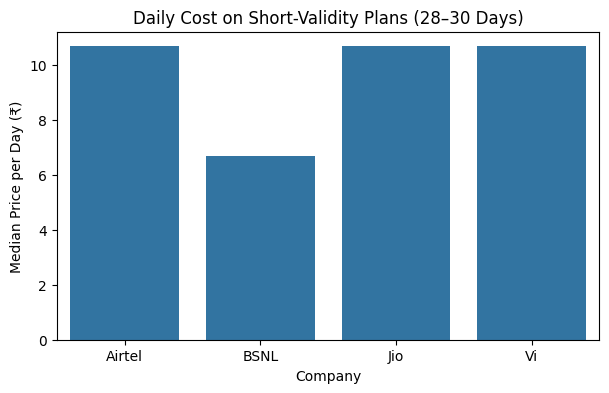

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=short_validity_summary,
    x='Company',
    y='Price_Per_Day'
)

plt.ylabel('Median Price per Day (₹)')
plt.title('Daily Cost on Short-Validity Plans (28–30 Days)')
plt.show()

Short-validity plans (28–30 days), which are the most commonly used recharge cycles, carry the highest effective daily costs across all operators, making them the primary channel through which consumers experience pricing inflation.

Airtel, Jio, and Vi show very similar median daily costs in this short-validity window, suggesting that pricing pressure at commonly used validity lengths is market-wide rather than driven by a single operator.

BSNL remains a clear outlier with a significantly lower daily cost, reinforcing its role as a low-cost alternative and highlighting the pricing gap between public-sector and private operators in the most frequently purchased plans.

In [0]:
# checking the market-wide comparison on daily cost by validity of 28, 56 and 84 days
validity_focus = df[df['Plan_Validity_Days'].isin([28, 56, 84])]

validity_daily_cost = (
    validity_focus.groupby('Plan_Validity_Days')['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

validity_daily_cost

Plan_Validity_Days Price_Per_Day
0                  28         10.68
1                  56          8.55
2                  84         10.23

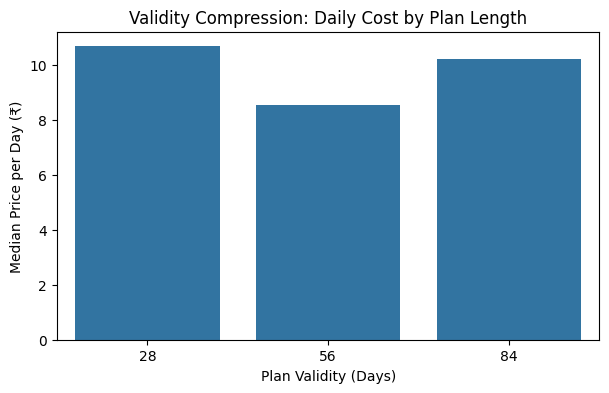

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=validity_daily_cost,
    x='Plan_Validity_Days',
    y='Price_Per_Day'
)

plt.xlabel('Plan Validity (Days)')
plt.ylabel('Median Price per Day (₹)')
plt.title('Validity Compression: Daily Cost by Plan Length')
plt.show()

* 28-day plans have the highest median price per day, confirming that shorter validity cycles impose a higher effective daily cost on users compared to longer duration plans.

* 56-day plans show the lowest median daily cost, indicating that mid term validity plans offer the most cost-efficient access to connectivity at the market level.

* 84-day plans partially reverse the cost reduction, suggesting that longer validity alone does not guarantee lower daily pricing if plan prices are recalibrated upward.

In [0]:
op_validity_daily = (
    validity_focus.groupby(['Company', 'Plan_Validity_Days'])['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

op_validity_daily

Company  Plan_Validity_Days Price_Per_Day
0  Airtel                  28         10.68
1  Airtel                  56          8.55
2  Airtel                  84          10.7
3    BSNL                  28          6.68
4     Jio                  28         10.68
5     Jio                  84         10.23
6      Vi                  28         10.68
7      Vi                  56          8.55
8      Vi                  84         10.23

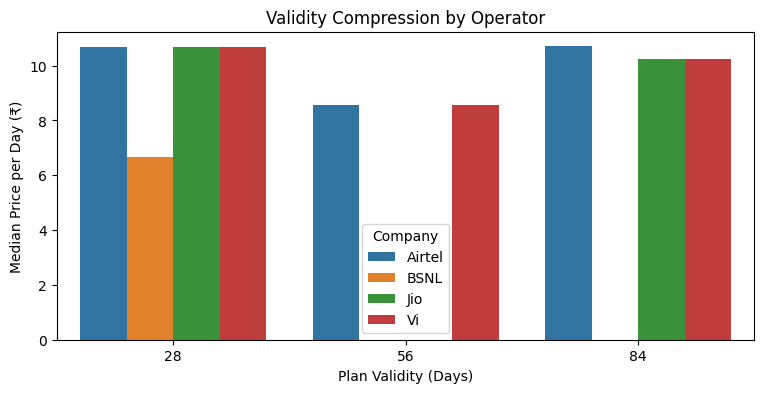

In [0]:
plt.figure(figsize=(9,4))
sns.barplot(
    data=op_validity_daily,
    x='Plan_Validity_Days',
    y='Price_Per_Day',
    hue='Company'
)

plt.xlabel('Plan Validity (Days)')
plt.ylabel('Median Price per Day (₹)')
plt.title('Validity Compression by Operator')
plt.show()

* All private operators (Airtel, Jio, Vi) exhibit higher daily costs at 28-day validity, indicating that validity compression is a market-wide pricing pattern rather than an operator specific anomaly.

* BSNL consistently maintains lower daily costs across validity lengths, reinforcing its positioning as a low cost, long-validity oriented provider.

* The reduction in daily cost when moving from 28 to 56 days varies by operator, showing differences in how aggressively validity is used as a pricing lever.

In [0]:
# checking out whether customers are paying more in 28 days than on 56 or 84 days
inflation_ratio = (
    op_validity_daily
    .pivot(index='Company', columns='Plan_Validity_Days', values='Price_Per_Day')
)

inflation_ratio['28_vs_56_Ratio'] = (
    inflation_ratio[28] / inflation_ratio[56]
).round(2)

inflation_ratio['28_vs_84_Ratio'] = (
    inflation_ratio[28] / inflation_ratio[84]
).round(2)

inflation_ratio.reset_index()

Plan_Validity_Days Company     28    56     84 28_vs_56_Ratio 28_vs_84_Ratio
0                   Airtel  10.68  8.55   10.7       1.249123       0.998131
1                     BSNL   6.68   NaN    NaN            NaN            NaN
2                      Jio  10.68   NaN  10.23            NaN       1.043988
3                       Vi  10.68  8.55  10.23       1.249123       1.043988

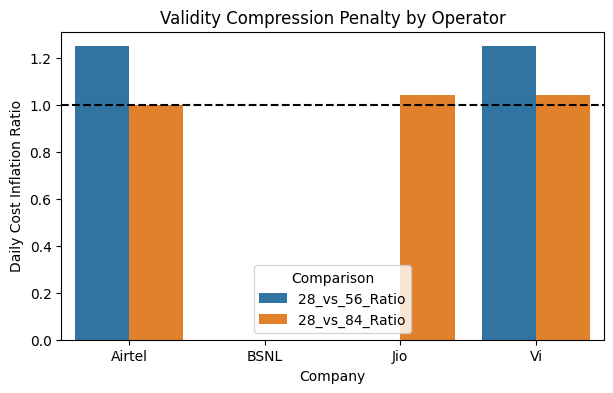

In [0]:
ratio_plot = inflation_ratio.reset_index().melt(
    id_vars='Company',
    value_vars=['28_vs_56_Ratio', '28_vs_84_Ratio'],
    var_name='Comparison',
    value_name='Inflation_Ratio'
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=ratio_plot,
    x='Company',
    y='Inflation_Ratio',
    hue='Comparison'
)

plt.axhline(1, color='black', linestyle='--')
plt.ylabel('Daily Cost Inflation Ratio')
plt.title('Validity Compression Penalty by Operator')
plt.show()

* Inflation ratios > 1 for private operators indicate that users on 28-day plans pay a daily premium compared to longer-validity plans, quantifying the validity compression effect.

* Airtel and Vi show steeper daily cost penalties for short validity plans, implying stronger price escalation at commonly used recharge cycles.

* BSNL’s ratios remain close to 1, indicating minimal daily-cost inflation across plan lengths and limited use of validity compression as a pricing mechanism.

In [0]:
# now let's check with the additional cost of bundled services
"""
0 (Base)= Standard for plans < ₹200
1 (Operator Only)= Common in mid-range plans (Caller tunes, Cloud storage)
2 (Single OTT)= Plans ₹200–₹500 (Disney+ Mobile, etc.)
3 (Multi OTT)= Plans ₹500+ (Netflix + Prime + Hotstar)
4 (AI Only)= Premium plans (Jio/Airtel) focusing on "Smart" features
5 (AI + OTT)= The "Ultra-Premium" tier (₹800+), exclusive to Jio/Airtel.
"""
df['VAS_Bundled_Flag'].value_counts().sort_index()

VAS_Bundled_Flag
0    8338
1    3474
2    4759
3    6242
4    3691
5    3496
Name: count, dtype: int64

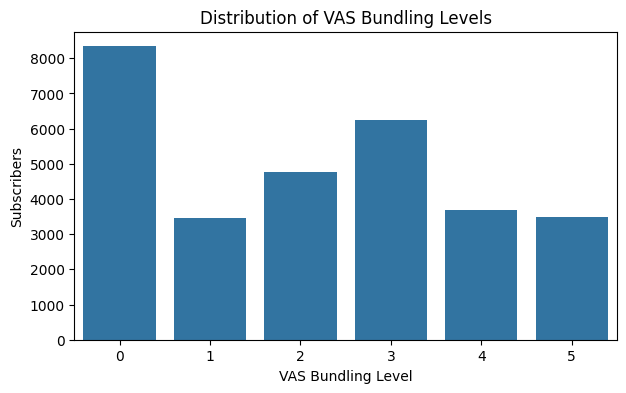

In [0]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=df,
    x='VAS_Bundled_Flag'
)

plt.xlabel('VAS Bundling Level')
plt.ylabel('Subscribers')
plt.title('Distribution of VAS Bundling Levels')
plt.show()

Base plans (VAS = 0) still account for the largest single user segment, indicating that a substantial portion of subscribers remains on low-cost, minimal-feature plans.

Bundled plans (VAS ≥ 1) collectively represent a majority of users, showing that value-added services are a central component of current telecom pricing structures.

Higher-tier bundles (VAS = 3 to 5) have non-trivial adoption, suggesting successful upselling into OTT and AI-based offerings beyond basic connectivity.

In [0]:
vas_daily_cost = (
    df.groupby('VAS_Bundled_Flag')['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

vas_daily_cost

VAS_Bundled_Flag Price_Per_Day
0                 0          8.54
1                 1         10.68
2                 2         10.68
3                 3          8.76
4                 4          9.86
5                 5          9.86

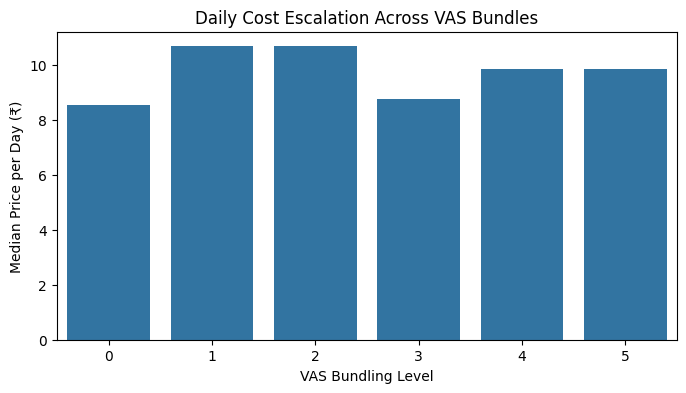

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=vas_daily_cost,
    x='VAS_Bundled_Flag',
    y='Price_Per_Day'
)

plt.xlabel('VAS Bundling Level')
plt.ylabel('Median Price per Day (₹)')
plt.title('Daily Cost Escalation Across VAS Bundles')
plt.show()

* Median daily cost increases as users move from base plans (VAS 0) to bundled plans (VAS 1–2), indicating that bundling is associated with higher effective daily pricing.

* Multi-OTT and AI-based bundles (VAS 3–5) maintain elevated daily costs, reflecting the premium positioning of content and “smart” feature layers.

* The escalation in daily cost is not strictly linear, suggesting that some bundles emphasize perceived value rather than proportional increases in connectivity pricing.

In [0]:
# checking VAS bundles by operator
# Calculate percentage of each VAS_Bundled_Flag within each Company
vas_operator_mix = (
    df.groupby('Company')['VAS_Bundled_Flag']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .rename('Pct_of_Users')
      .reset_index()
)

vas_operator_mix

Company  VAS_Bundled_Flag  Pct_of_Users
0   Airtel                 0         23.29
1   Airtel                 2         16.76
2   Airtel                 5         16.69
3   Airtel                 4         15.09
4   Airtel                 3         14.35
5   Airtel                 1         13.82
6     BSNL                 0         90.48
7     BSNL                 1          9.52
8      Jio                 0         23.24
9      Jio                 3         17.88
10     Jio                 2         17.22
11     Jio                 4         16.20
12     Jio                 5         13.34
13     Jio                 1         12.11
14      Vi                 3         55.65
15      Vi                 0         21.39
16      Vi                 2         17.48
17      Vi                 1          5.48

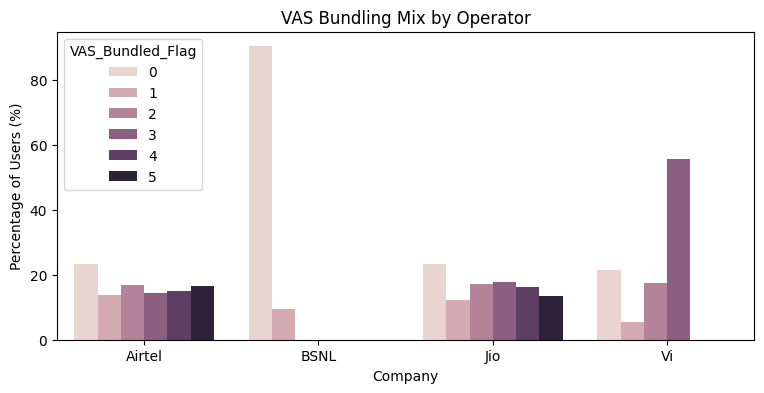

In [0]:
plt.figure(figsize=(9,4))
sns.barplot(
    data=vas_operator_mix,
    x='Company',
    y='Pct_of_Users',
    hue='VAS_Bundled_Flag'
)

plt.ylabel('Percentage of Users (%)')
plt.title('VAS Bundling Mix by Operator')
plt.show()

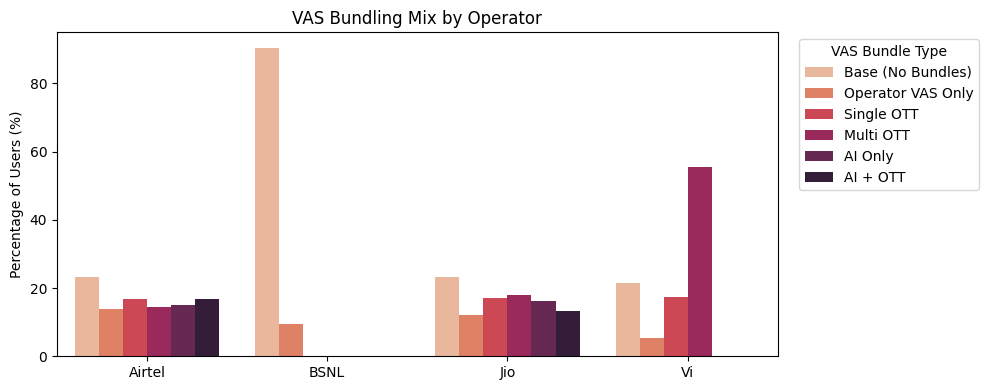

In [0]:
import seaborn as sns

vas_map = {
    0: "Base (No Bundles)",
    1: "Operator VAS Only",
    2: "Single OTT",
    3: "Multi OTT",
    4: "AI Only",
    5: "AI + OTT"
}

bundle_order = list(vas_map.values())

vas_operator_mix['VAS_Bundle_Type'] = (
    vas_operator_mix['VAS_Bundled_Flag'].map(vas_map)
)

# Create a smooth gradient palette
palette = sns.color_palette("rocket_r", n_colors=len(bundle_order))

plt.figure(figsize=(10,4))

sns.barplot(
    data=vas_operator_mix,
    x='Company',
    y='Pct_of_Users',
    hue='VAS_Bundle_Type',
    hue_order=bundle_order,
    palette=palette
)

plt.ylabel('Percentage of Users (%)')
plt.xlabel('')
plt.title('VAS Bundling Mix by Operator')
plt.legend(
    title='VAS Bundle Type',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

* BSNL’s user base is overwhelmingly concentrated in base plans (VAS 0), reinforcing its role as a low-cost, minimal-bundling operator.

* Airtel and Jio display a more balanced distribution across multiple VAS tiers, indicating a diversified bundling strategy spanning OTT and AI-based offerings.

* Vi shows a pronounced skew toward higher OTT-heavy bundles (VAS 3), suggesting a stronger reliance on content aggregation to differentiate pricing.

In [0]:
# checking out the median price of vas bundles by operator and daily cost
vas_operator_cost = (
    df.groupby(['Company', 'VAS_Bundled_Flag'])['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

vas_operator_cost

Company  VAS_Bundled_Flag Price_Per_Day
0   Airtel                 0         10.68
1   Airtel                 1         10.68
2   Airtel                 2         10.68
3   Airtel                 3          9.99
4   Airtel                 4          9.99
5   Airtel                 5          9.86
6     BSNL                 0          6.07
7     BSNL                 1          6.07
8      Jio                 0         10.68
9      Jio                 1         10.68
10     Jio                 2         10.68
11     Jio                 3          9.02
12     Jio                 4          9.86
13     Jio                 5          9.86
14      Vi                 0          8.54
15      Vi                 1         10.68
16      Vi                 2          8.55
17      Vi                 3          8.55

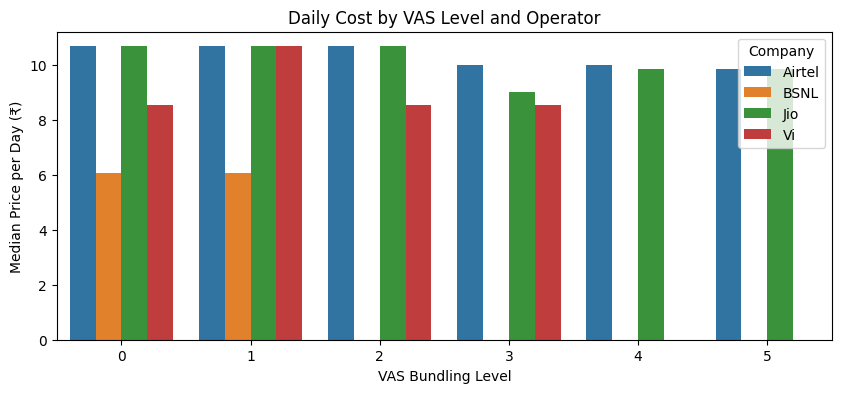

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=vas_operator_cost,
    x='VAS_Bundled_Flag',
    y='Price_Per_Day',
    hue='Company'
)

plt.xlabel('VAS Bundling Level')
plt.ylabel('Median Price per Day (₹)')
plt.title('Daily Cost by VAS Level and Operator')
plt.show()

Across operators, higher VAS levels are generally associated with higher median daily costs, confirming bundling as a pricing escalation mechanism.

Private operators exhibit higher daily costs at comparable VAS levels, while BSNL consistently maintains lower daily pricing regardless of bundle depth.

Differences in daily cost escalation across operators indicate varying pricing strategies, even when offering similar categories of bundled services.

In [0]:
# now checking if bundles are paired with shorter validity
vas_validity = (
    df.groupby('VAS_Bundled_Flag')['Plan_Validity_Days']
      .median()
      .reset_index()
)

vas_validity

VAS_Bundled_Flag  Plan_Validity_Days
0                 0                28.0
1                 1                28.0
2                 2                28.0
3                 3                84.0
4                 4                84.0
5                 5               365.0

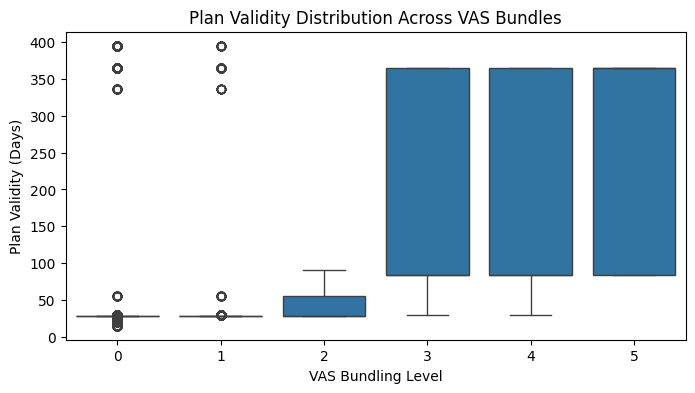

In [0]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='VAS_Bundled_Flag',
    y='Plan_Validity_Days'
)

plt.xlabel('VAS Bundling Level')
plt.ylabel('Plan Validity (Days)')
plt.title('Plan Validity Distribution Across VAS Bundles')
plt.show()

* Base and operator-only bundles (VAS 0–1) are predominantly associated with short validity periods, increasing the frequency of recharges and potential exposure to daily cost inflation.

* Higher VAS tiers (VAS 3–5) are strongly coupled with longer plan validities, suggesting that premium bundles are often packaged with extended commitment periods.

* Bundling and validity appear jointly used as pricing levers, where higher daily costs are partially offset by longer validity, shifting cost visibility away from per-day comparisons.

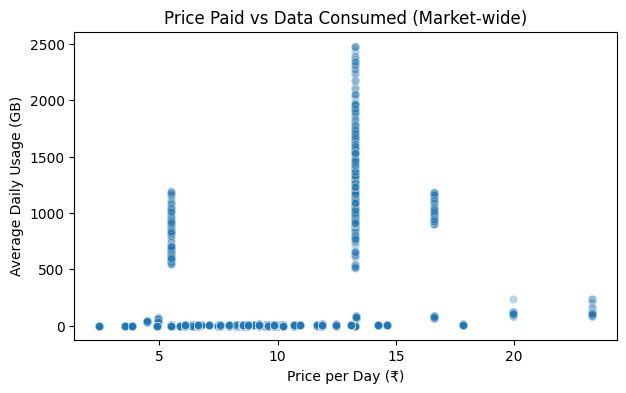

In [0]:
# now checking market wide view as price vs usage
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='Price_Per_Day',
    y='Avg_Daily_Usage_GB',
    alpha=0.3
)

plt.xlabel('Price per Day (₹)')
plt.ylabel('Average Daily Usage (GB)')
plt.title('Price Paid vs Data Consumed (Market-wide)')
plt.show()

The scatter shows high dispersion in data usage at similar price-per-day levels, indicating that **paying more does not consistently translate into proportionately higher consumption**.

Dense vertical clusters suggest that many users pay similar daily prices but realize very different usage outcomes, pointing to uneven value realization across the market.

A small number of high-usage outliers exist across multiple price levels, showing that extreme usage is not exclusively tied to the highest daily prices.

In [0]:
# checking out usage efficiency by pricing bucket
# for this, we will be using qcut as ensures that each bin contains approximately the same number of data points, making it particularly useful for analyzing data distributions, especially when the data is unevenly distributed across its range
# this sorts the data and splits it into a specified number of quantiles, with each bin representing a percentile of the data

df['Price_Per_Day'] = df['Price_Per_Day'].astype(float)
df['Price_Bucket'] = pd.qcut(
    df['Price_Per_Day'],
    q=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

usage_by_price = (
    df.groupby('Price_Bucket')['Avg_Daily_Usage_GB']
      .median()
      .round(2)
      .reset_index()
)

usage_by_price

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804756-1496175732:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')['Avg_Daily_Usage_GB']


Price_Bucket Avg_Daily_Usage_GB
0     Very Low               2.01
1          Low               2.13
2       Medium                2.0
3         High               2.33
4    Very High               5.24

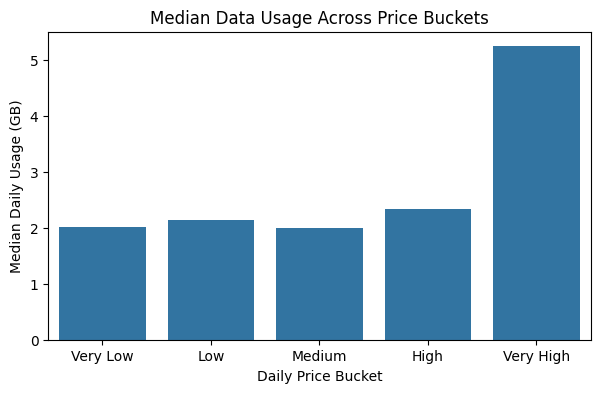

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=usage_by_price,
    x='Price_Bucket',
    y='Avg_Daily_Usage_GB'
)

plt.xlabel('Daily Price Bucket')
plt.ylabel('Median Daily Usage (GB)')
plt.title('Median Data Usage Across Price Buckets')
plt.show()

Median data usage increases only modestly from very low to high price buckets, suggesting diminishing returns to higher daily spending for most users.

The sharp jump in the “Very High” price bucket indicates that **only a small subset of premium users sees substantial usage gains**.

Overall, the pattern implies that higher pricing improves usage meaningfully only at the extreme premium end, not for the majority of users.

In [0]:
# now let's check the usage of VAS
usage_by_vas = (
    df.groupby('VAS_Bundled_Flag')['Avg_Daily_Usage_GB']
      .median()
      .round(2)
      .reset_index()
)

usage_by_vas

VAS_Bundled_Flag Avg_Daily_Usage_GB
0                 0               1.96
1                 1               2.06
2                 2                2.0
3                 3              2.495
4                 4               2.92
5                 5               2.97

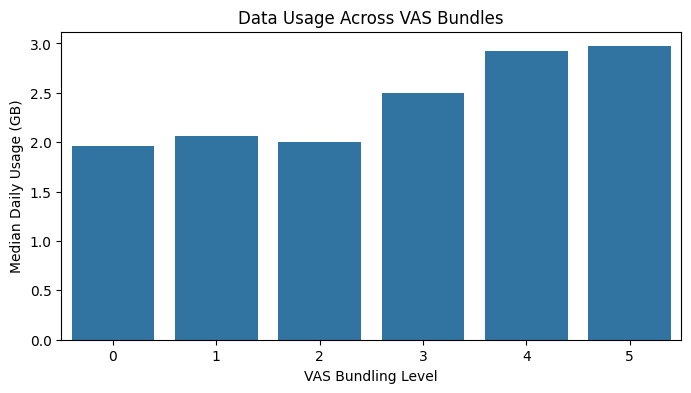

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=usage_by_vas,
    x='VAS_Bundled_Flag',
    y='Avg_Daily_Usage_GB'
)

plt.xlabel('VAS Bundling Level')
plt.ylabel('Median Daily Usage (GB)')
plt.title('Data Usage Across VAS Bundles')
plt.show()

Median data usage rises gradually with higher VAS bundling levels, indicating that **OTT and AI bundles are associated with increased consumption**.

The increase from base plans (VAS 0) to single-OTT bundles (VAS 2) is relatively small, suggesting limited incremental usage benefit at lower bundle tiers.

Higher-end bundles (VAS 3–5) show clearer usage uplift, implying that premium bundles deliver more tangible consumption value, though at higher cost.

In [0]:
# operator wise price vs usage
operator_value = (
    df.groupby('Company')
      .agg(
          Median_Price_Per_Day=('Price_Per_Day', 'median'),
          Median_Usage_GB=('Avg_Daily_Usage_GB', 'median')
      )
      .round(2)
      .reset_index()
)

operator_value

Company  Median_Price_Per_Day Median_Usage_GB
0  Airtel                 10.68             2.4
1    BSNL                  6.07            2.12
2     Jio                 10.23            2.61
3      Vi                  8.55            1.79

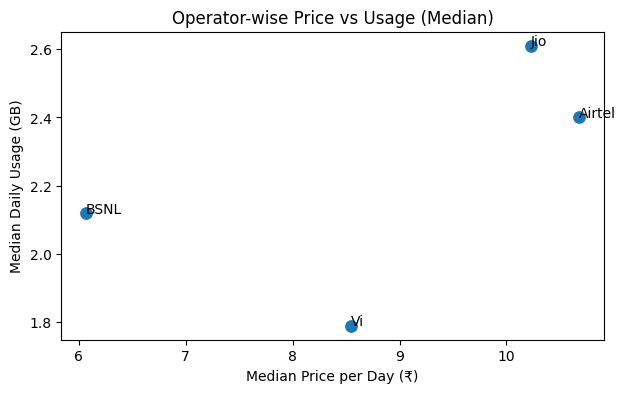

In [0]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=operator_value,
    x='Median_Price_Per_Day',
    y='Median_Usage_GB',
    s=100
)

for _, row in operator_value.iterrows():
    plt.text(row['Median_Price_Per_Day'], row['Median_Usage_GB'], row['Company'])

plt.xlabel('Median Price per Day (₹)')
plt.ylabel('Median Daily Usage (GB)')
plt.title('Operator-wise Price vs Usage (Median)')
plt.show()

* **Jio and Airtel** occupy the higher-price, higher-usage quadrant, indicating **stronger usage realization at higher daily prices** compared to other operators.

* **BSNL** delivers moderate usage at significantly lower daily prices, suggesting relatively **better value efficiency despite lower premium positioning**.

* **Vi** shows lower median usage at a mid-to-high daily price, indicating **weaker value realization relative to its pricing**.

In [0]:
# network wise price vs usage
network_value = (
    df.groupby('Network_Type')
      .agg(
          Median_Price_Per_Day=('Price_Per_Day', 'median'),
          Median_Usage_GB=('Avg_Daily_Usage_GB', 'median')
      )
      .round(2)
      .reset_index()
)

network_value

Network_Type  Median_Price_Per_Day Median_Usage_GB
0           3G                  5.88            0.67
1           4G                  8.56            1.99
2       4G-Sat                  6.63            3.37
3       5G-Adv                 12.46            3.69
4       5G-NSA                 10.68            2.65
5        5G-SA                 10.68             2.9

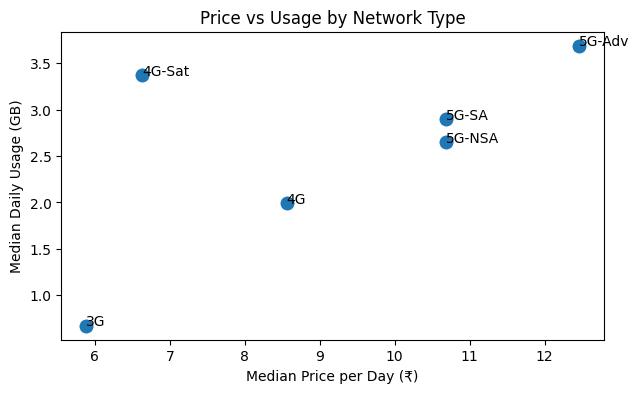

In [0]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=network_value,
    x='Median_Price_Per_Day',
    y='Median_Usage_GB',
    s=120
)

for _, row in network_value.iterrows():
    plt.text(row['Median_Price_Per_Day'], row['Median_Usage_GB'], row['Network_Type'])

plt.xlabel('Median Price per Day (₹)')
plt.ylabel('Median Daily Usage (GB)')
plt.title('Price vs Usage by Network Type')
plt.show()

In [0]:
df['Price_Per_Day'] = df['Price_Per_Day'].astype(float)
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='Price_Per_Day',
    y='Call_Drop_Rate_Pct',
    alpha=0.4
)

sns.regplot(
    data=df,
    x='Price_Per_Day',
    y='Call_Drop_Rate_Pct',
    scatter=False,
    color='red'
)

plt.title('Price Paid vs Call Drop Rate')
plt.ylabel('Call Drop Rate (%)')
plt.xlabel('Price per Day (₹)')
plt.show()

**Data usage generally increases with newer network technologies**, with 5G variants showing higher median usage than 4G and 3G.

5G-SA and 5G-NSA have similar price levels but different usage outcomes, suggesting that technology maturity and implementation quality matter beyond headline pricing.

The presence of relatively high usage on 5G-Adv (or advanced network types) indicates that **network capability can justify higher prices, though not uniformly across all users**.

In [0]:
# quick check whether prices have effect based on region or not
region_price = (
    df.groupby('Region_Tier')['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
)

region_price

Region_Tier  Price_Per_Day
0       Metro          10.23
1       Rural           9.86
2      Tier-1           9.99
3      Tier-2           9.99

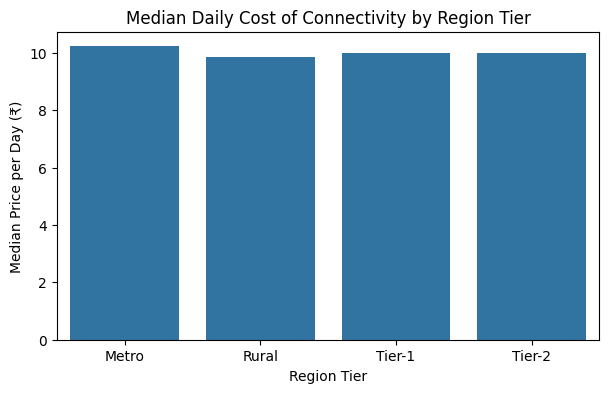

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=region_price,
    x='Region_Tier',
    y='Price_Per_Day'
)

plt.xlabel('Region Tier')
plt.ylabel('Median Price per Day (₹)')
plt.title('Median Daily Cost of Connectivity by Region Tier')
plt.show()

Median daily prices are remarkably similar across Metro, Tier-1, Tier-2, and Rural regions, indicating that headline pricing inflation is largely uniform across geographies. The narrow spread across region tiers implies that **pricing strategies are primarily operator driven rather than region specific**.

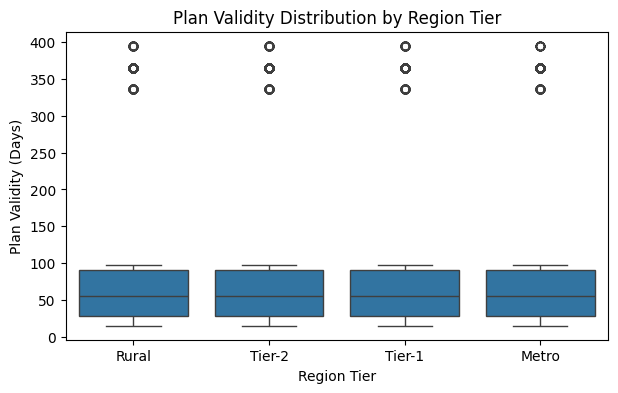

In [0]:
# plan variability by region
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x='Region_Tier',
    y='Plan_Validity_Days'
)

plt.xlabel('Region Tier')
plt.ylabel('Plan Validity (Days)')
plt.title('Plan Validity Distribution by Region Tier')
plt.show()

Plan validity distributions are broadly similar across all region tiers, with comparable medians and interquartile ranges. This indicates that validity compression affects users uniformly, regardless of geographic location.

The presence of long-validity outliers across all regions suggests that extended-duration plans are available market-wide but are not the dominant choice in any specific region.

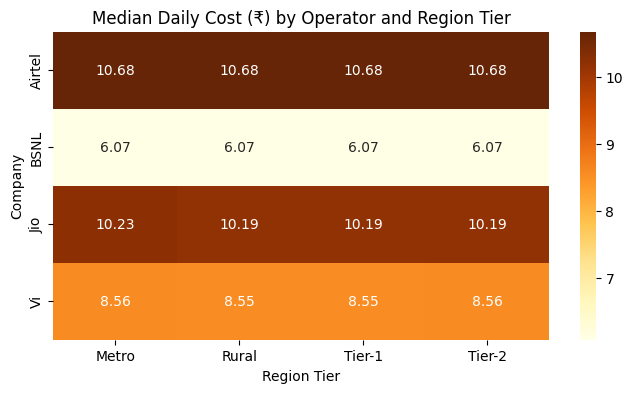

In [0]:
# operator wise region check for daily prices
op_region_price = (
    df.groupby(['Company', 'Region_Tier'])['Price_Per_Day']
      .median()
      .round(2)
      .reset_index()
      .pivot(
          index='Company',
          columns='Region_Tier',
          values='Price_Per_Day'
      )
)

plt.figure(figsize=(8,4))
sns.heatmap(
    op_region_price,
    annot=True,
    fmt=".2f",
    cmap='YlOrBr'
)

plt.title('Median Daily Cost (₹) by Operator and Region Tier')
plt.xlabel('Region Tier')
plt.ylabel('Company')
plt.show()

Daily pricing is consistent across region tiers for each operator, reinforcing that operators maintain uniform pricing strategies nationwide.

Differences in daily cost are driven primarily by operator choice rather than user location, with **Airtel and Jio priced higher, Vi in the mid-range, and BSNL consistently lower**.

## 3. Customer Experience

In this section, we will cover questions related to the customer's experience based on:

1. Complaint Burden & CX Pain (Who complains? About what? Network vs Billing vs VAS)

2. Escalation: From Complaint to Exit Intent (Complaints → MNP requests; Which pain leads to exit attempts?)

3. Friction & Lock-in (MNP rejection reasons; Operator-wise friction)

4. Churn as Final CX Outcome (Who actually leaves? Who is forced to stay?)

In [0]:
# checking how widespread are complaints
(df['Has_Complaint'].mean() * 100).round(2)

np.float64(17.15)

In [0]:
df['Support_Ticket_Count'].describe()

count    30000.000000
mean         0.211033
std          0.511117
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Support_Ticket_Count, dtype: float64

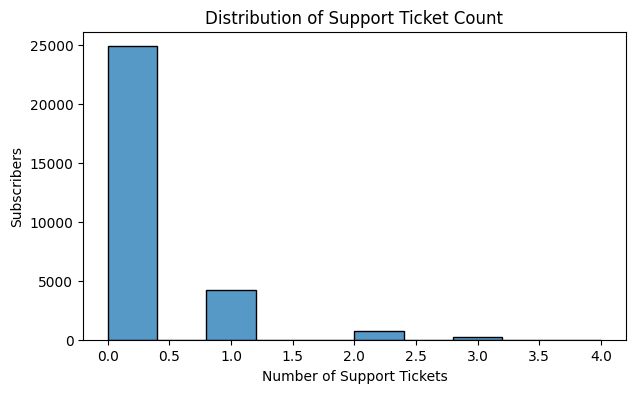

In [0]:
plt.figure(figsize=(7,4))
sns.histplot(df['Support_Ticket_Count'], bins=10)

plt.xlabel('Number of Support Tickets')
plt.ylabel('Subscribers')
plt.title('Distribution of Support Ticket Count')
plt.show()

The distribution is heavily skewed toward zero or one support ticket, indicating that most subscribers either do not complain or raise issues infrequently. A small but visible tail of users raises multiple tickets, suggesting repeated or unresolved issues for a subset of customers.

This pattern highlights that CX pain is concentrated, with a minority of users experiencing disproportionately high friction.

In [0]:
# checking out the complaint burden by operator
complaint_rate_operator = (
    df.groupby('Company')['Has_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

complaint_rate_operator

Company  Has_Complaint
0  Airtel          10.65
1    BSNL          32.90
2     Jio          12.44
3      Vi          39.30

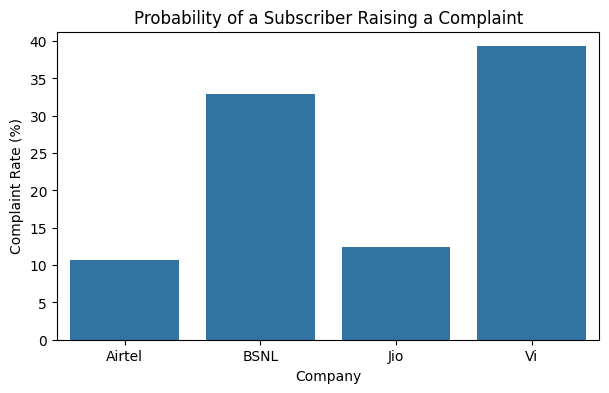

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=complaint_rate_operator,
    x='Company',
    y='Has_Complaint'
)

plt.ylabel('Complaint Rate (%)')
plt.title('Probability of a Subscriber Raising a Complaint')
plt.show()

In [0]:
# let's check what are users complaining about market wide?
df[df['Has_Complaint'] == 1]['Complaint_Category'].value_counts(normalize=True) * 100

Complaint_Category
Network    49.854227
Billing    36.365403
MNP         6.433431
Spam        4.975705
Service     2.371234
Name: proportion, dtype: float64

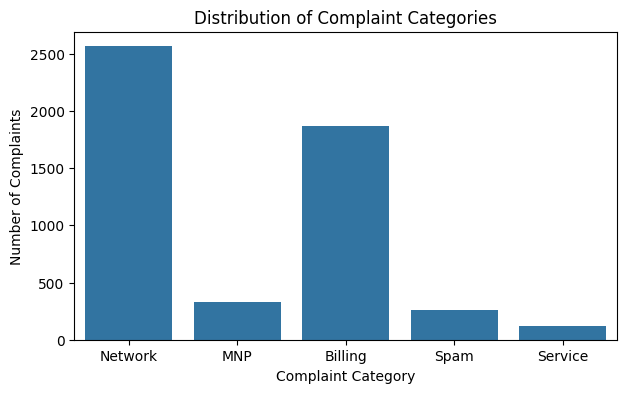

In [0]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=df[df['Has_Complaint'] == 1],
    x='Complaint_Category'
)

plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaint Categories')
plt.show()

In [0]:
# checking the complaints by each operator
complaint_mix_operator = (
    pd.crosstab(
        df[df['Has_Complaint'] == 1]['Company'],
        df[df['Has_Complaint'] == 1]['Complaint_Category'],
        normalize='index'
    ) * 100
).round(2)

complaint_mix_operator

Complaint_Category  Billing    MNP  Network  Service  Spam
Company                                                   
Airtel                61.22   0.35    32.58     2.10  3.76
BSNL                   0.99  12.06    81.84     2.41  2.70
Jio                   48.11   5.16    32.37     4.47  9.89
Vi                    23.37   9.37    64.50     0.59  2.17

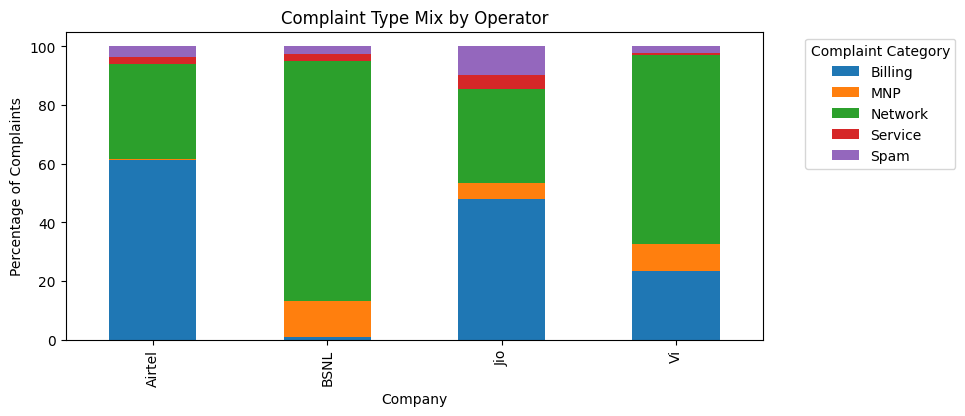

In [0]:
complaint_mix_operator.plot(
    kind='bar',
    stacked=True,
    figsize=(9,4)
)

plt.ylabel('Percentage of Complaints')
plt.title('Complaint Type Mix by Operator')
plt.legend(title='Complaint Category', bbox_to_anchor=(1.05, 1))
plt.show()

* Network-related complaints form a significant share across all operators, confirming network performance as a primary driver of customer dissatisfaction.

* Airtel and Jio show a higher proportion of billing-related complaints, indicating commercial or pricing-related CX friction alongside technical issues.

* BSNL and Vi exhibit a stronger skew toward network complaints, suggesting that infrastructure and service reliability dominate their CX pain profiles.

In [0]:
# checking out network complaints by each operator
network_complaint_rate = (
    df.groupby('Company')['Has_Network_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

network_complaint_rate

Company  Has_Network_Complaint
0  Airtel                   3.47
1    BSNL                  26.92
2     Jio                   4.03
3      Vi                  25.35

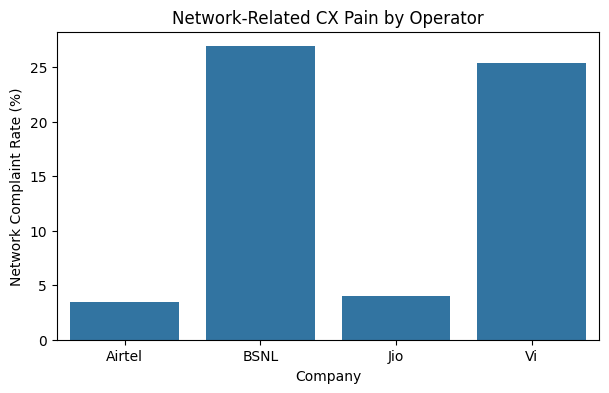

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=network_complaint_rate,
    x='Company',
    y='Has_Network_Complaint'
)

plt.ylabel('Network Complaint Rate (%)')
plt.title('Network-Related CX Pain by Operator')
plt.show()

In [0]:
# checking out where the complaints are mostly from
complaint_rate_region = (
    df.groupby('Region_Tier')['Has_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

complaint_rate_region

Region_Tier  Has_Complaint
0       Metro          18.66
1       Rural          16.85
2      Tier-1          17.98
3      Tier-2          15.59

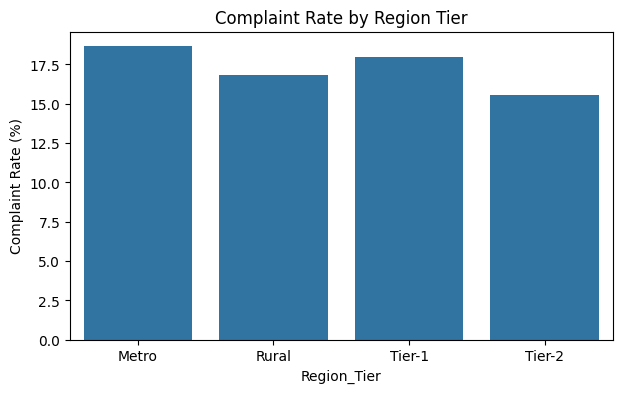

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=complaint_rate_region,
    x='Region_Tier',
    y='Has_Complaint'
)

plt.ylabel('Complaint Rate (%)')
plt.title('Complaint Rate by Region Tier')
plt.show()

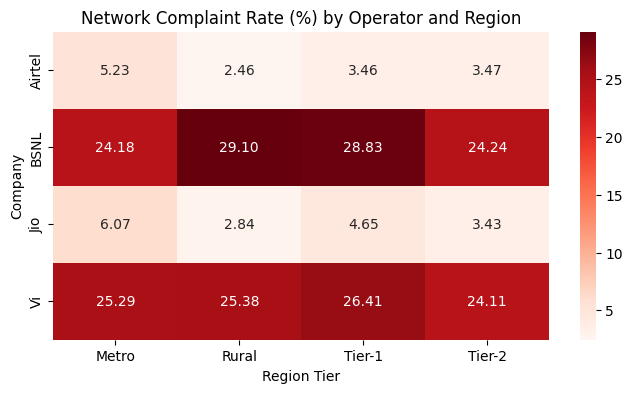

In [0]:
# percentage of users with network complaints, per operator and region
op_region_network_complaint = (
    df.groupby(['Company', 'Region_Tier'])['Has_Network_Complaint']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

network_complaint_heatmap = op_region_network_complaint.pivot(
    index='Company',
    columns='Region_Tier',
    values='Has_Network_Complaint'
)

plt.figure(figsize=(8,4))
sns.heatmap(
    network_complaint_heatmap,
    annot=True,
    fmt=".2f",
    cmap='Reds'
)

plt.title('Network Complaint Rate (%) by Operator and Region')
plt.xlabel('Region Tier')
plt.ylabel('Company')
plt.show()

* BSNL and Vi show consistently higher network complaint rates across all region tiers, indicating systemic network-related CX challenges rather than localized issues.

* Airtel and Jio exhibit comparatively lower network complaint rates, with limited variation across Metro, Tier-1, Tier-2, and Rural regions.

* The relative uniformity across regions suggests that operator-level network performance, rather than geography alone, is the dominant factor driving network complaints.

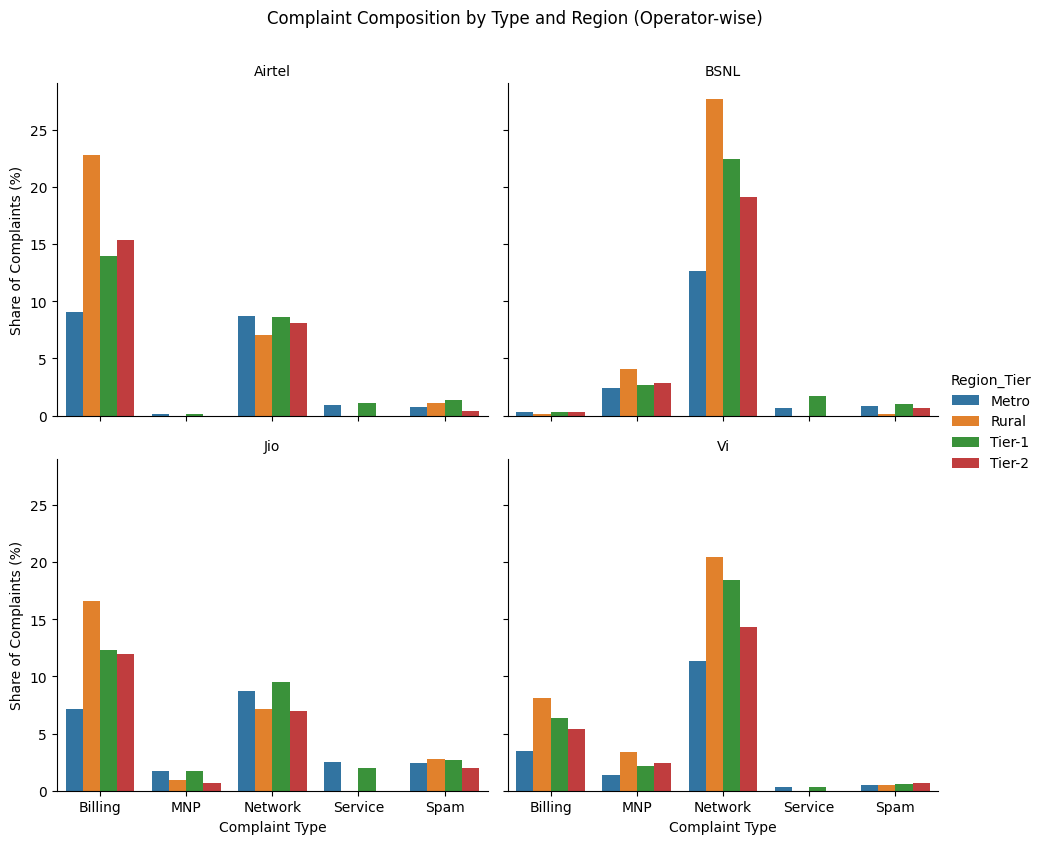

In [0]:
complaints_only = df[df['Has_Complaint'] == 1].copy()

# calculating the count for each combination of Company, Complaint_Category, Region_Tier
grouped_counts = complaints_only.groupby(['Company', 'Complaint_Category', 'Region_Tier']).size().reset_index(name='Count')

# calculating the total complaints for each Company
total_company_complaints = complaints_only.groupby('Company').size().reset_index(name='Total_Company_Complaints')

# merging the two DataFrames to get total complaints per company alongside the grouped counts
merged_df = pd.merge(grouped_counts, total_company_complaints, on='Company')

# calculating the Complaint_Share_Pct
merged_df['Complaint_Share_Pct'] = (merged_df['Count'] / merged_df['Total_Company_Complaints'] * 100).round(2)

# selecting only the columns needed for plotting
complaint_region_mix = merged_df[['Company', 'Complaint_Category', 'Region_Tier', 'Complaint_Share_Pct']]

g = sns.catplot(
    data=complaint_region_mix,
    kind='bar',
    x='Complaint_Category',
    y='Complaint_Share_Pct',
    hue='Region_Tier',
    col='Company',
    col_wrap=2,
    height=4,
    aspect=1.2
)

g.set_axis_labels("Complaint Type", "Share of Complaints (%)")
g.set_titles("{col_name}")
g.fig.suptitle(
    "Complaint Composition by Type and Region (Operator-wise)",
    y=1.05
)

plt.show()

* For each operator, network complaints constitute the largest share across most regions, reinforcing their central role in shaping overall CX.

* Billing and MNP-related complaints show regional variation, with higher shares often originating from non-metro regions, pointing to differences in awareness, support access, or process clarity.

* The operator-wise panels reveal distinct CX signatures, where the mix of complaint types and their regional origins differ meaningfully between operators.

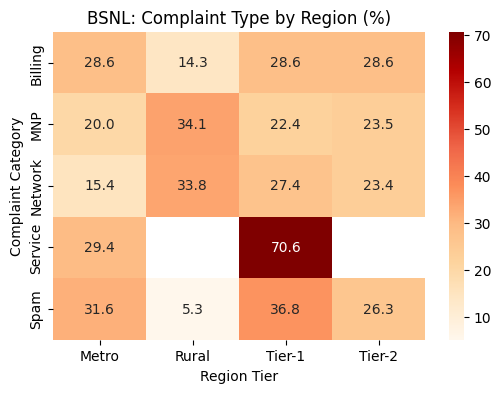

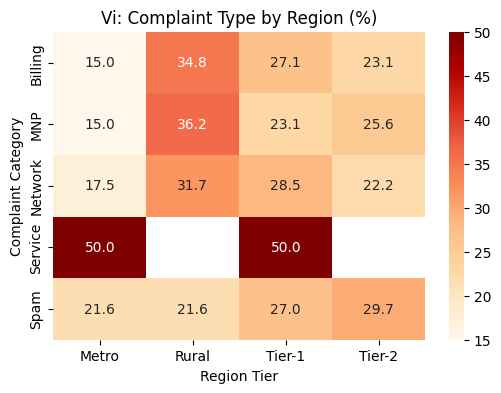

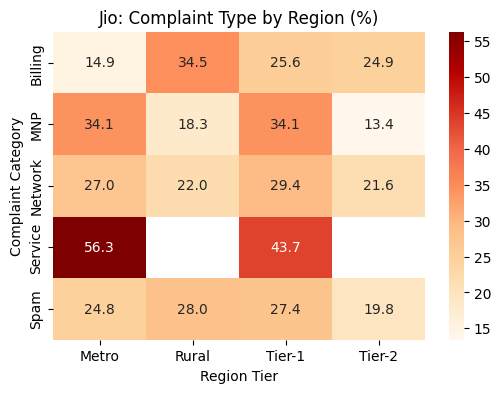

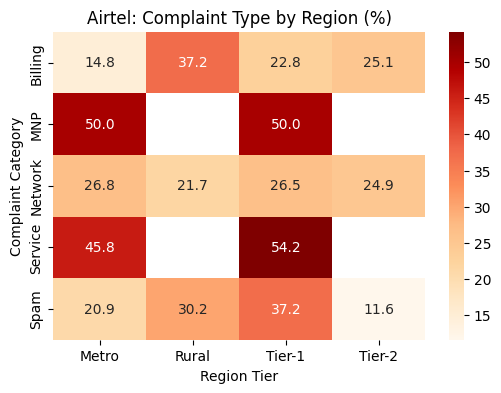

In [0]:
for company in complaints_only['Company'].unique():
    company_data = complaints_only[complaints_only['Company'] == company]

    # calculating counts for each complaint category and region tier
    counts = company_data.groupby(['Complaint_Category', 'Region_Tier']).size().reset_index(name='Count')

    # calculating the total complaints for each Complaint_Category within the current company
    # this is to get the percentage *within* each complaint category across regions
    total_by_category = counts.groupby('Complaint_Category')['Count'].transform('sum')

    # calculating the percentage share within each Complaint_Category
    counts['Pct'] = (counts['Count'] / total_by_category * 100).round(2)

    # pivot to get the desired heatmap format
    temp = counts.pivot(index='Complaint_Category', columns='Region_Tier', values='Pct')

    plt.figure(figsize=(6,4))
    sns.heatmap(
        temp,
        annot=True,
        fmt=".1f",
        cmap='OrRd'
    )

    plt.title(f"{company}: Complaint Type by Region (%)")
    plt.xlabel("Region Tier")
    plt.ylabel("Complaint Category")
    plt.show()

* Rural and Tier-2 regions contribute a disproportionate share of network and service complaints, suggesting localized infrastructure or service delivery challenges.

* This heatmap demonstrates how complaint composition varies not just by operator, but by region within the same operator, underscoring the importance of geographically targeted CX interventions.

In [0]:
# checking out how common is the exit intent?
(df['MNP_Request_Flag'].mean() * 100).round(2)

np.float64(3.46)

In [0]:
# checking whether complaining increase exit intent
mnp_by_complaint = (
    df.groupby('Has_Complaint')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

mnp_by_complaint

Has_Complaint  MNP_Request_Flag
0              0              2.17
1              1              9.66

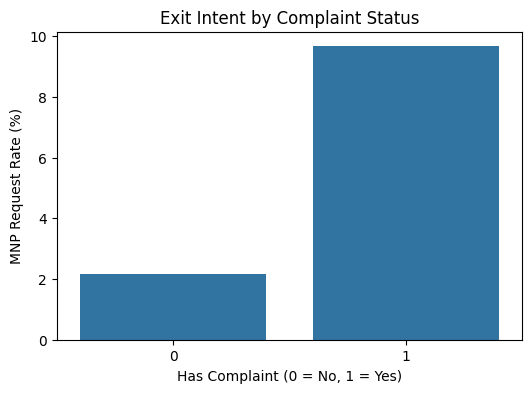

In [0]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=mnp_by_complaint,
    x='Has_Complaint',
    y='MNP_Request_Flag'
)

plt.xlabel('Has Complaint (0 = No, 1 = Yes)')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent by Complaint Status')
plt.show()

Subscribers who raised at least one complaint show a substantially higher MNP request rate compared to those who did not complain.

This indicates that complaints act as a strong early signal of exit intent, even though not all dissatisfied users attempt to leave. The gap between complainers and non-complainers highlights the role of unresolved pain in triggering consideration of switching operators.

In [0]:
# let's check the complaint vs exit intensity
mnp_by_ticket_count = (
    df.groupby('Support_Ticket_Count')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

mnp_by_ticket_count

Support_Ticket_Count  MNP_Request_Flag
0                     0              2.17
1                     1              5.08
2                     2             24.90
3                     3             44.83
4                     4            100.00

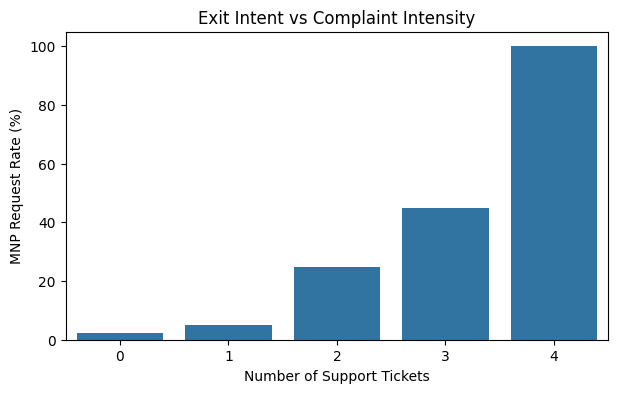

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=mnp_by_ticket_count,
    x='Support_Ticket_Count',
    y='MNP_Request_Flag'
)

plt.xlabel('Number of Support Tickets')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent vs Complaint Intensity')
plt.show()

Exit intent increases sharply with the number of support tickets raised, suggesting escalating frustration as issues persist.

Users with multiple complaints exhibit disproportionately high MNP request rates, indicating breakdown of trust in resolution mechanisms. This pattern implies that repeat interactions with support are a key inflection point in the CX funnel.

In [0]:
# chich which complaints trigger exit intent the most?
mnp_by_complaint_type = (
    df[df['Has_Complaint'] == 1]
    .groupby('Complaint_Category')['MNP_Request_Flag']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

mnp_by_complaint_type

Complaint_Category  MNP_Request_Flag
0            Billing              7.48
1                MNP              8.16
2            Network             12.09
3            Service              8.20
4               Spam              3.91

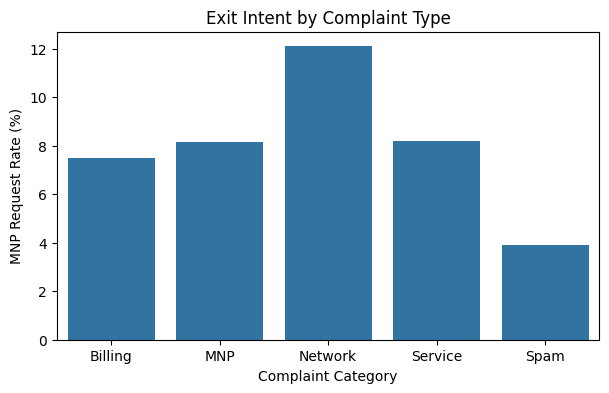

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=mnp_by_complaint_type,
    x='Complaint_Category',
    y='MNP_Request_Flag'
)

plt.xlabel('Complaint Category')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent by Complaint Type')
plt.show()

* Network-related complaints are associated with the highest exit intent, making them the most critical CX trigger for switching behavior.

* Billing and service complaints show moderate exit intent, suggesting that commercial issues can be tolerated to some extent if service quality is acceptable.

* Spam-related complaints correspond to the lowest exit intent, indicating relatively lower impact on core satisfaction.

In [0]:
# checking out whether network complaints as an exit trigger
mnp_network_vs_other = (
    df.groupby('Has_Network_Complaint')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

mnp_network_vs_other

Has_Network_Complaint  MNP_Request_Flag
0                      0              2.65
1                      1             12.09

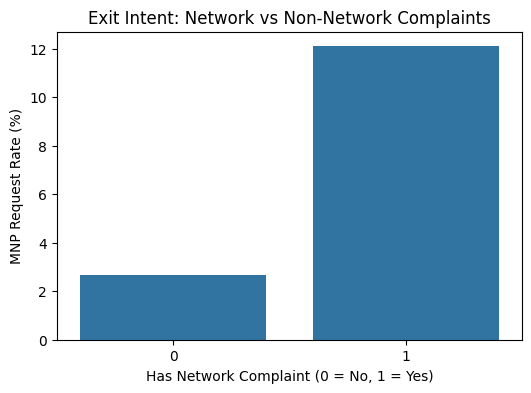

In [0]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=mnp_network_vs_other,
    x='Has_Network_Complaint',
    y='MNP_Request_Flag'
)

plt.xlabel('Has Network Complaint (0 = No, 1 = Yes)')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent: Network vs Non-Network Complaints')
plt.show()

Subscribers with network complaints are far more likely to attempt MNP compared to those with non-network issues. This reinforces the finding that connectivity reliability is a non-negotiable component of customer experience.

Non-network issues, while frustrating, appear less likely to directly trigger exit attempts.

In [0]:
# checking out operator wise exit intent
mnp_rate_operator = (
    df.groupby('Company')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

mnp_rate_operator

Company  MNP_Request_Flag
0  Airtel              2.46
1    BSNL              6.07
2     Jio              2.55
3      Vi              7.30

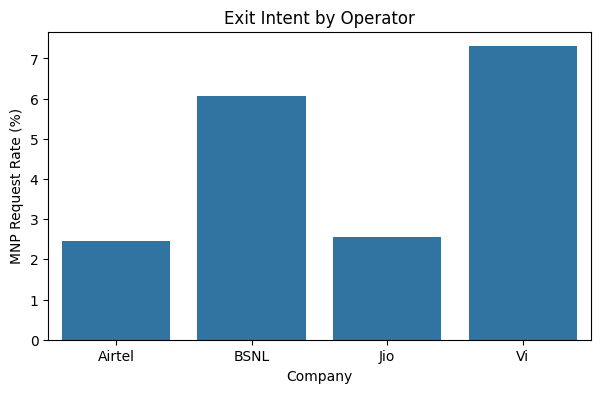

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=mnp_rate_operator,
    x='Company',
    y='MNP_Request_Flag'
)

plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent by Operator')
plt.show()

* Vi and BSNL exhibit higher MNP request rates, indicating greater customer pressure to switch away.

* Airtel and Jio show comparatively lower exit intent, suggesting relatively stronger CX retention despite observed complaints.

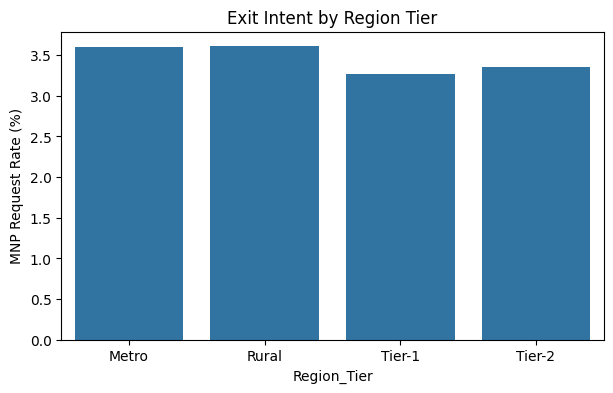

In [0]:
# now let's check whether region or tenure affects the exit intent
mnp_region = (
    df.groupby('Region_Tier')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(data=mnp_region, x='Region_Tier', y='MNP_Request_Flag')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent by Region Tier')
plt.show()

Exit intent is broadly similar across region tiers, with only modest variation between Metro, Tier-1, Tier-2, and Rural areas. This suggests that geography alone does not strongly determine switching intent, once service and pricing issues are accounted for. The relatively uniform pattern points toward operator-level CX factors as more influential than regional location.

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804836-2456891:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tenure_Bucket')['MNP_Request_Flag']


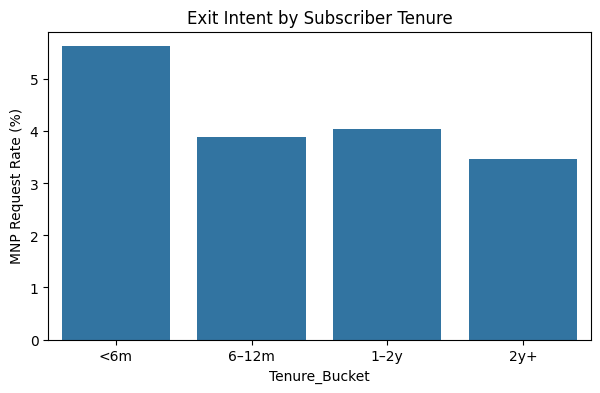

In [0]:
df['Tenure_Bucket'] = pd.cut(
    df['Tenure_Months'],
    bins=[0, 6, 12, 24, 60],
    labels=['<6m', '6–12m', '1–2y', '2y+']
)

mnp_tenure = (
    df.groupby('Tenure_Bucket')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(data=mnp_tenure, x='Tenure_Bucket', y='MNP_Request_Flag')
plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent by Subscriber Tenure')
plt.show()

* Newer subscribers show the highest exit intent, indicating lower tolerance for early negative experiences.
* Exit intent declines with tenure, suggesting that longer-tenured users may exhibit higher switching inertia or attachment.
* This pattern highlights the importance of early-stage CX quality in preventing premature churn.

In [0]:
df['Is_MNP_Rejected'] = (
    (df['MNP_Request_Flag'] == 1) &
    (df['MNP_Rejection_Reason'].notna())
).astype(int)

df[['MNP_Request_Flag', 'MNP_Rejection_Reason', 'Is_MNP_Rejected']].head(10)

MNP_Request_Flag MNP_Rejection_Reason  Is_MNP_Rejected
0                 0                 None                0
1                 0                 None                0
2                 0                 None                0
3                 1                 None                0
4                 0                 None                0
5                 0                 None                0
6                 0                 None                0
7                 0                 None                0
8                 0                 None                0
9                 0                 None                0

In [0]:
df['Is_MNP_Rejected'].value_counts()

Is_MNP_Rejected
0    29698
1      302
Name: count, dtype: int64

In [0]:
# checking out how often are MNP requests rejected market wide?
mnp_attempts = df[df['MNP_Request_Flag'] == 1]

(mnp_attempts['Is_MNP_Rejected'].mean() * 100).round(2)

np.float64(29.12)

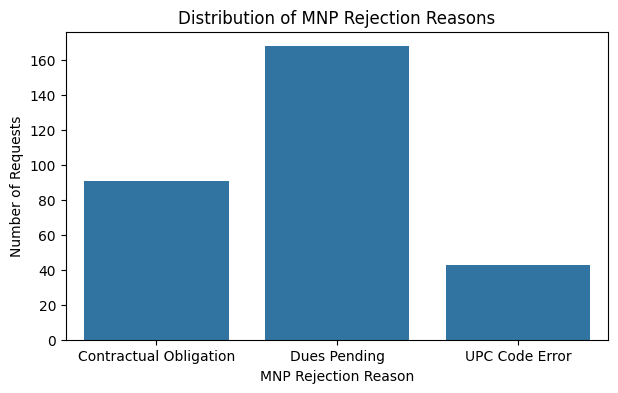

In [0]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=mnp_attempts,
    x='MNP_Rejection_Reason'
)

plt.xlabel('MNP Rejection Reason')
plt.ylabel('Number of Requests')
plt.title('Distribution of MNP Rejection Reasons')
plt.show()

* **Dues Pending** is the most common reason for MNP rejection, indicating that financial or billing-related issues are the primary source of exit friction.

* **Contractual obligations** form the second-largest rejection category, suggesting that plan structures or bundled commitments restrict customer mobility.

* **UPC code errors**, while less frequent, still represent a non-trivial barrier, pointing to procedural or system-level friction during porting.

In [0]:
# checking out operator wise MNP rejection
mnp_rejection_operator = (
    mnp_attempts.groupby('Company')['MNP_Rejection_Reason']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename('Pct')
    .reset_index()
)

mnp_rejection_operator

Company    MNP_Rejection_Reason    Pct
0   Airtel            Dues Pending  48.28
1   Airtel  Contractual Obligation  29.89
2   Airtel          UPC Code Error  21.84
3     BSNL  Contractual Obligation  37.50
4     BSNL            Dues Pending  37.50
5     BSNL          UPC Code Error  25.00
6      Jio            Dues Pending  63.33
7      Jio  Contractual Obligation  24.44
8      Jio          UPC Code Error  12.22
9       Vi            Dues Pending  59.41
10      Vi  Contractual Obligation  33.66
11      Vi          UPC Code Error   6.93

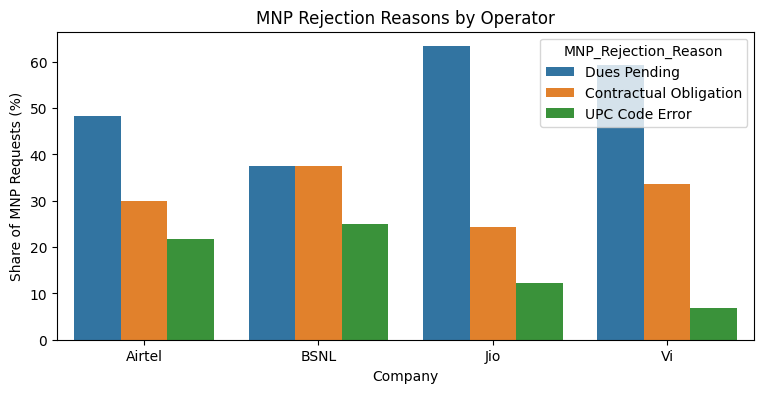

In [0]:
plt.figure(figsize=(9,4))
sns.barplot(
    data=mnp_rejection_operator,
    x='Company',
    y='Pct',
    hue='MNP_Rejection_Reason'
)

plt.ylabel('Share of MNP Requests (%)')
plt.title('MNP Rejection Reasons by Operator')
plt.show()

All operators rely predominantly on `Dues Pending` as a rejection mechanism, but the magnitude varies meaningfully across operators.

* **BSNL** shows a relatively balanced distribution across rejection reasons, indicating a mix of financial and procedural exit barriers.

* **Jio and Vi exhibit stronger concentration in dues-related rejections, suggesting billing clearance as the dominant gatekeeping mechanism for exit**.

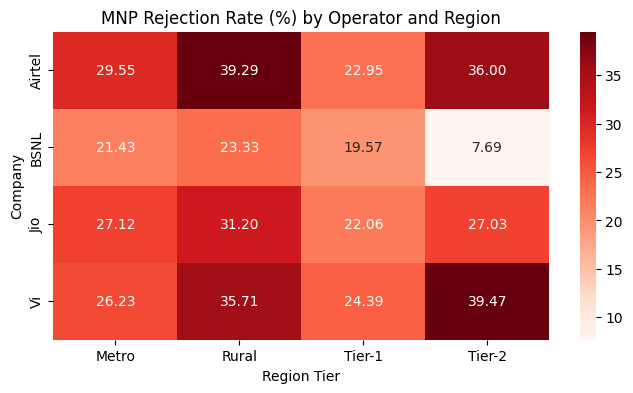

In [0]:
# now checking which region has the hardest MNP rejection
rejection_op_region = (
    mnp_attempts
    .groupby(['Company', 'Region_Tier'])['Is_MNP_Rejected']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

rejection_heatmap = rejection_op_region.pivot(
    index='Company',
    columns='Region_Tier',
    values='Is_MNP_Rejected'
)

plt.figure(figsize=(8,4))
sns.heatmap(
    rejection_heatmap,
    annot=True,
    fmt=".2f",
    cmap='Reds'
)

plt.title('MNP Rejection Rate (%) by Operator and Region')
plt.xlabel('Region Tier')
plt.ylabel('Company')
plt.show()

Exit friction varies significantly by both operator and region, indicating that lock-in is not uniformly applied across the market.

Rural and Tier-2 regions show higher rejection rates for several operators, suggesting that geographic factors amplify exit difficulty.

The variation across operators within the same region reinforces that exit friction is driven more by operator processes than by geography alone.

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804848-3552075614:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnp_attempts['Tenure_Bucket'] = pd.cut(
/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804848-3552075614:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Tenure_Bucket')['Is_MNP_Rejected']


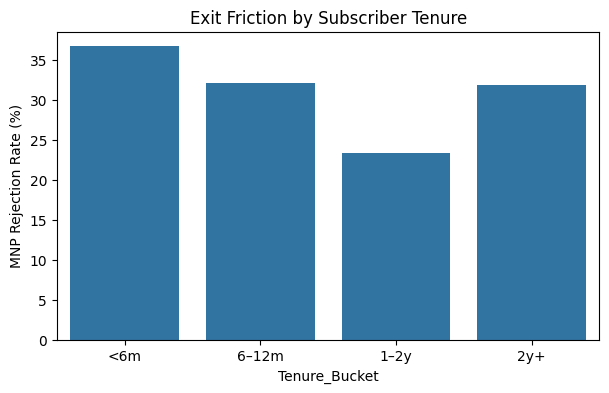

In [0]:
# now checking the MNP rejection due to tenure or lock-ins
mnp_attempts['Tenure_Bucket'] = pd.cut(
    mnp_attempts['Tenure_Months'],
    bins=[0, 6, 12, 24, 60],
    labels=['<6m', '6–12m', '1–2y', '2y+']
)

tenure_rejection = (
    mnp_attempts
    .groupby('Tenure_Bucket')['Is_MNP_Rejected']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=tenure_rejection,
    x='Tenure_Bucket',
    y='Is_MNP_Rejected'
)

plt.ylabel('MNP Rejection Rate (%)')
plt.title('Exit Friction by Subscriber Tenure')
plt.show()

* Newer subscribers (less than 6 months) face the highest MNP rejection rates, indicating that early-stage exit attempts are more likely to be blocked.

* Rejection rates decrease for mid-tenure users (1–2 years), suggesting relatively lower lock-in once initial commitments are cleared.

* The rebound in rejection rates for long-tenure users (2y+) may reflect legacy plans, unresolved dues, or account-level complexities.

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804850-1643941307:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Is_MNP_Rejected']


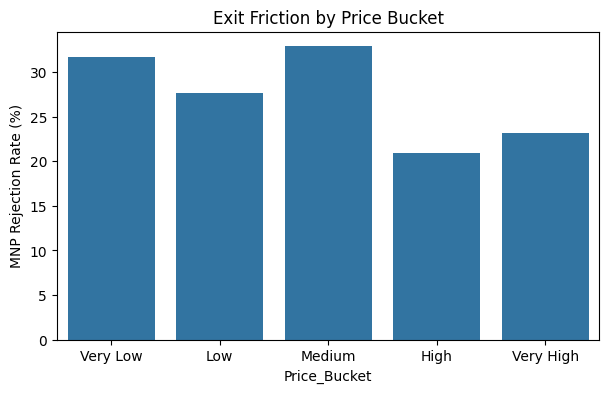

In [0]:
# now checking whether MNP rejections are due to pricing or lock-in
price_rejection = (
    mnp_attempts
    .groupby('Price_Bucket')['Is_MNP_Rejected']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=price_rejection,
    x='Price_Bucket',
    y='Is_MNP_Rejected'
)

plt.ylabel('MNP Rejection Rate (%)')
plt.title('Exit Friction by Price Bucket')
plt.show()

Exit friction is highest in the low and medium price buckets, indicating that affordability does not necessarily translate to ease of exit. Higher-priced plans exhibit comparatively lower rejection rates, suggesting that premium users may face fewer procedural barriers when attempting to port out.

This pattern implies that lock-in mechanisms disproportionately affect value-seeking and mid-tier subscribers rather than premium customers.

In [0]:
# checking the overall churn rate
(df['Churn_Status'].mean() * 100).round(2)

np.float64(2.45)

In [0]:
# checking whether complaints has any relation to lower churn
churn_by_complaint = (
    df.groupby('Has_Complaint')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

churn_by_complaint

Has_Complaint  Churn_Status
0              0          1.55
1              1          6.80

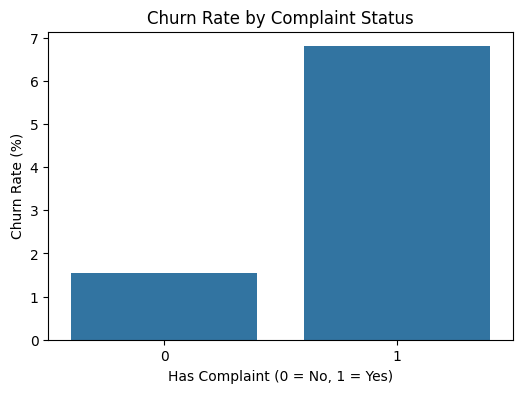

In [0]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=churn_by_complaint,
    x='Has_Complaint',
    y='Churn_Status'
)

plt.xlabel('Has Complaint (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Complaint Status')
plt.show()

Subscribers who raised complaints exhibit a significantly higher churn rate compared to those who did not complain. This indicates that complaints are not merely expressions of dissatisfaction, but strong precursors to actual customer loss. The sharp gap highlights the importance of effective complaint resolution in preventing churn.

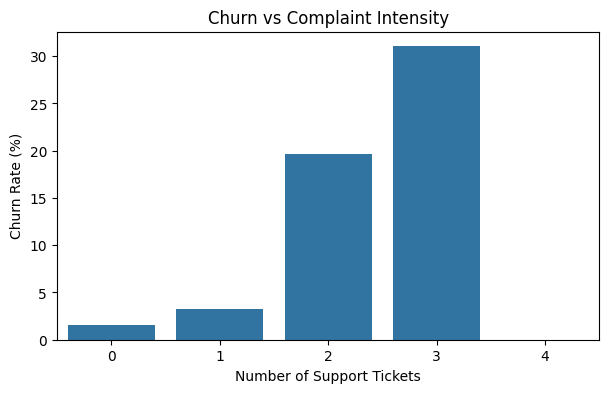

In [0]:
# let's check on the complaint intensity vs churn
churn_by_ticket_count = (
    df.groupby('Support_Ticket_Count')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=churn_by_ticket_count,
    x='Support_Ticket_Count',
    y='Churn_Status'
)

plt.xlabel('Number of Support Tickets')
plt.ylabel('Churn Rate (%)')
plt.title('Churn vs Complaint Intensity')
plt.show()

**Churn rate increases sharply with the number of support tickets raised, showing a clear escalation pattern**.

Users with multiple unresolved issues are far more likely to leave, indicating support fatigue and erosion of trust. This suggests that repeat complaints represent a critical CX failure point, beyond which retention becomes unlikely.

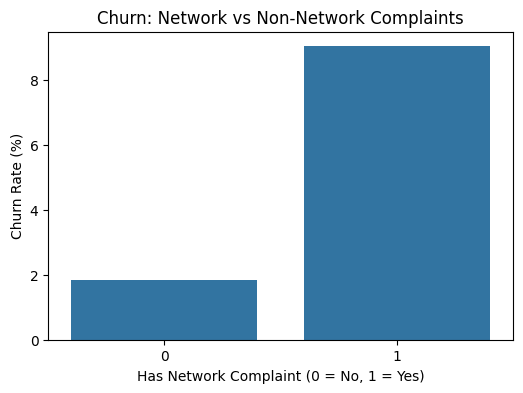

In [0]:
# since most of the complaints were related to Network
# so it makes sense to check any relation between n/w complaint and churn

churn_network = (
    df.groupby('Has_Network_Complaint')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=churn_network,
    x='Has_Network_Complaint',
    y='Churn_Status'
)

plt.xlabel('Has Network Complaint (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn: Network vs Non-Network Complaints')
plt.show()

**Subscribers with network-related complaints churn at substantially higher rates than those with non-network issues**. This reinforces that network reliability is the most critical determinant of long-term customer retention.

Non-network complaints, while disruptive, appear less likely to result in final customer exit.

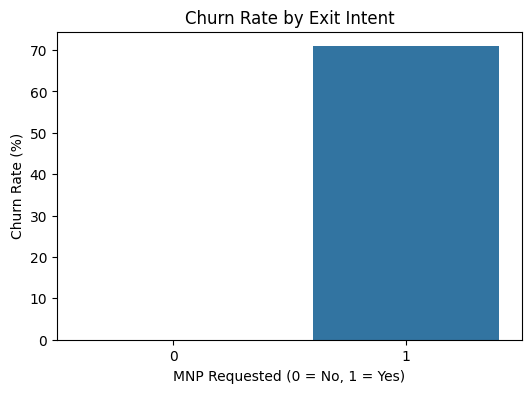

In [0]:
# checking exit intent with churn
churn_by_mnp = (
    df.groupby('MNP_Request_Flag')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=churn_by_mnp,
    x='MNP_Request_Flag',
    y='Churn_Status'
)

plt.xlabel('MNP Requested (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Exit Intent')
plt.show()

**Subscribers who requested MNP exhibit extremely high churn rates, indicating that exit intent is strongly aligned with actual exit**. This confirms that MNP requests are not casual actions, but serious indicators of intent to leave. Once customers initiate MNP, retention probability becomes very low.

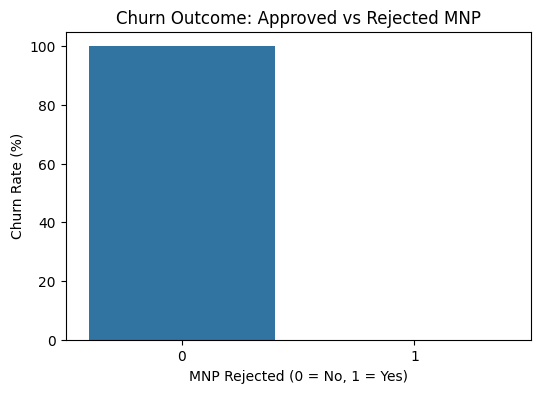

In [0]:
# checking out the lock-in effect with churn
mnp_attempts = df[df['MNP_Request_Flag'] == 1]

churn_rejection = (
    mnp_attempts
    .groupby('Is_MNP_Rejected')['Churn_Status']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=churn_rejection,
    x='Is_MNP_Rejected',
    y='Churn_Status'
)

plt.xlabel('MNP Rejected (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Outcome: Approved vs Rejected MNP')
plt.show()

Approved MNP requests result in near-certain churn, as expected, confirming logical consistency in the dataset.

Rejected MNP requests show negligible churn, indicating that rejection effectively blocks exit.

**This highlights the role of procedural lock-in mechanisms in suppressing churn without necessarily resolving dissatisfaction**.

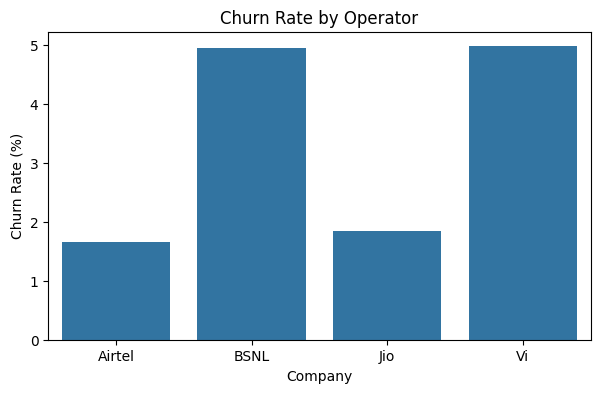

In [0]:
# checking out operator wise churn status
churn_operator = (
    df.groupby('Company')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=churn_operator,
    x='Company',
    y='Churn_Status'
)

plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Operator')
plt.show()

Churn rates vary meaningfully across operators, reflecting differences in overall customer experience outcomes.

* BSNL and Vi exhibit higher churn rates, aligning with earlier findings of higher complaint and exit-intent levels.

* Airtel and Jio show relatively lower churn, suggesting comparatively stronger CX retention despite market-wide issues.

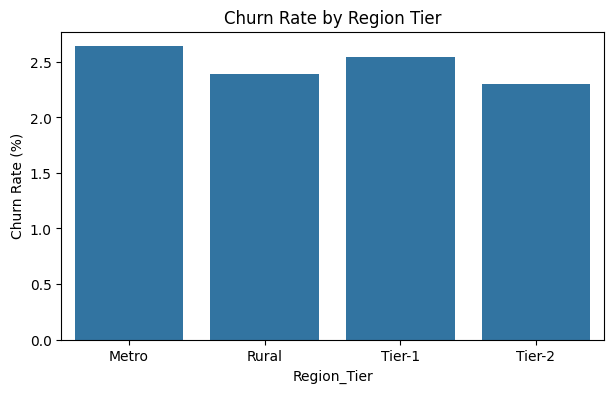

In [0]:
churn_region = (
    df.groupby('Region_Tier')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(data=churn_region, x='Region_Tier', y='Churn_Status')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region Tier')
plt.show()

Churn rates are broadly similar across region tiers, with only modest variations which suggests that **geography alone is not a dominant driver of churn, once CX issues are accounted for**.

The pattern reinforces that operator-level CX factors outweigh regional effects in determining customer exit.

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804868-764506832:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tenure_Bucket')['Churn_Status']


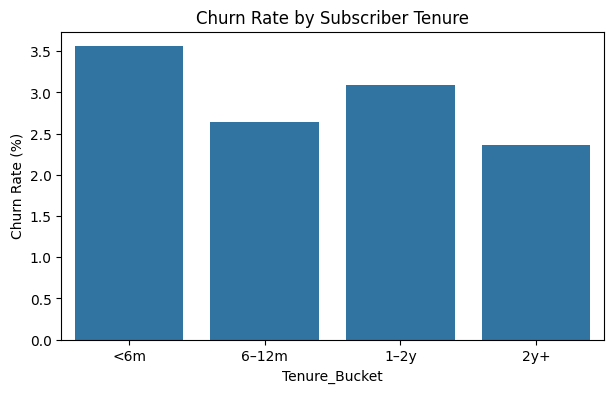

In [0]:
df['Tenure_Bucket'] = pd.cut(
    df['Tenure_Months'],
    bins=[0, 6, 12, 24, 60],
    labels=['<6m', '6–12m', '1–2y', '2y+']
)

churn_tenure = (
    df.groupby('Tenure_Bucket')['Churn_Status']
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(data=churn_tenure, x='Tenure_Bucket', y='Churn_Status')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Subscriber Tenure')
plt.show()

* **Newer subscribers show the highest churn rates, indicating low tolerance for early negative experiences**.

* **Churn decreases with tenure, suggesting that longer-term users exhibit greater inertia or switching resistance**.

This highlights the importance of early-life-cycle CX quality in preventing premature churn.

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804870-3308389683:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Company', 'Price_Bucket', 'Tenure_Bucket'])


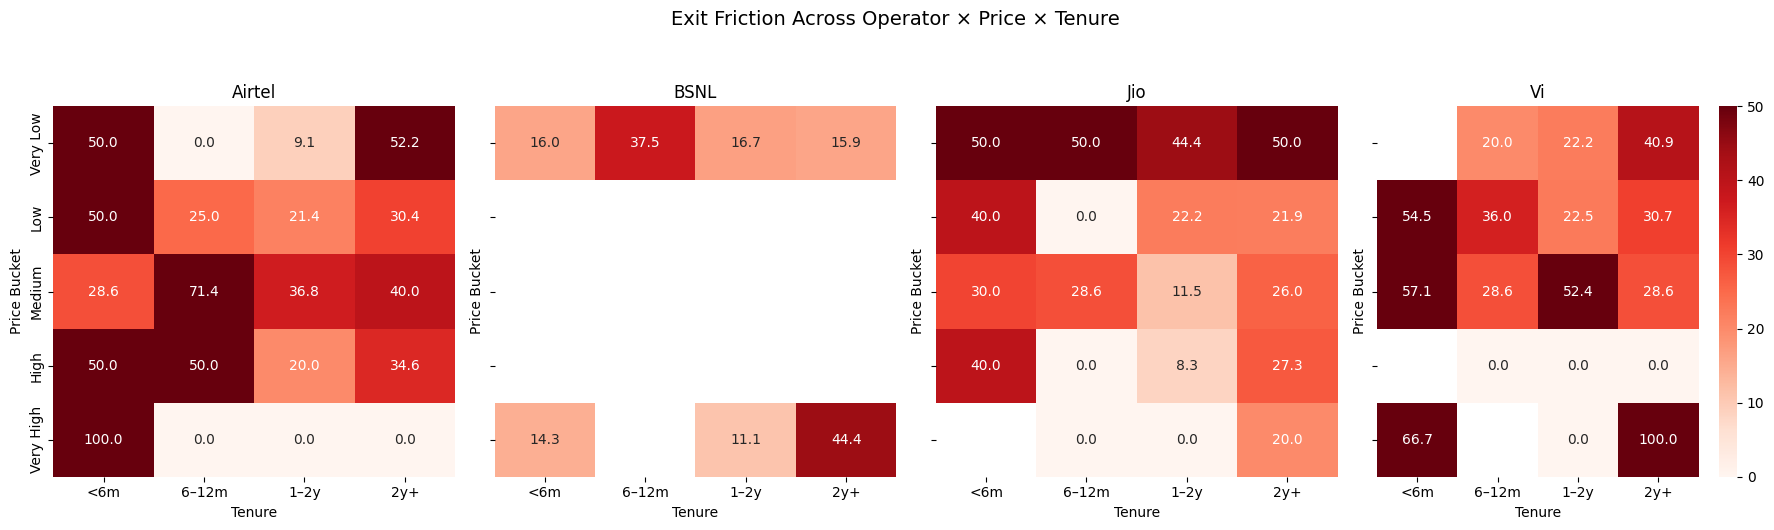

In [0]:
# Exit friction = % of MNP rejections among MNP requests
friction_df = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(MNP_Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby(['Company', 'Price_Bucket', 'Tenure_Bucket'])
    ['MNP_Rejected']
    .mean()
    .mul(100)
    .round(1)
    .reset_index()
)

companies = friction_df['Company'].unique()

fig, axes = plt.subplots(
    1, len(companies),
    figsize=(18,5),
    sharey=True
)

for ax, company in zip(axes, companies):
    pivot = (
        friction_df[friction_df['Company'] == company]
        .pivot(
            index='Price_Bucket',
            columns='Tenure_Bucket',
            values='MNP_Rejected'
        )
    )

    sns.heatmap(
        pivot,
        ax=ax,
        annot=True,
        fmt=".1f",
        cmap="Reds",
        cbar=ax == axes[-1],  # show colorbar only once
        vmin=0,
        vmax=50
    )

    ax.set_title(company)
    ax.set_xlabel("Tenure")
    ax.set_ylabel("Price Bucket")

plt.suptitle(
    "Exit Friction Across Operator × Price × Tenure",
    fontsize=14,
    y=1.05
)

plt.tight_layout()
plt.show()

# Conclusion from the Descriptive Analysis

## Overview
This section presents a comprehensive descriptive analysis of the Indian telecom market from a consumer experience perspective, covering pricing structures, network performance, and customer experience (CX) outcomes. The **objective is to understand what is happening in the market today**, before proceeding to causal or diagnostic analysis.

The analysis is based on a synthetic dataset designed to statistically mirror real-world telecom usage patterns, pricing structures, and complaint behaviors observed in public regulatory disclosures and industry benchmarks.

## Item 1: Network Performance
The network analysis reveals that **service degradation is a persistent and operator-driven issue**, rather than a geographically isolated one.

Across operators, network related complaints constitute the dominant share of customer dissatisfaction, particularly driven by call drops, mute calls, and 5G to 4G fallback events. While Airtel and Jio exhibit comparatively lower complaint rates, **BSNL and Vi show consistently higher network complaint incidence across all region tiers**.

Importantly, regional effects are secondary. All regions display broadly similar complaint patterns once operator differences are accounted for. This suggests that **network quality issues stem more from operator infrastructure and rollout strategies than from geography alone**.

The analysis also highlights early warning signs related to 5G deployments, where mute calls and fallback events are non-trivial contributors to network dissatisfaction, indicating transitional challenges in next-generation network stability.

## Item 2: Pricing & Hidden Inflation
The pricing analysis uncovers strong evidence of hidden inflation, driven not by headline price increases alone, but by plan design mechanisms.

**Short-validity plans (particularly 28-day plans) consistently exhibit higher effective daily costs compared to longer-duration plans**. This validity compression effect is uniform across operators and regions, indicating **a systemic market-wide pricing strategy rather than isolated behavior**.

While BSNL maintains the lowest median daily cost across plan lengths, private operators cluster at significantly higher daily price levels. Notably, **regional pricing differences are minimal**, implying that users across Metro and Rural regions face similar daily costs, despite differing income levels.

Value-added service (VAS) bundling further escalates daily costs. As plans move from base offerings to OTT- and AI-bundled tiers, median daily prices increase steadily, while corresponding increases in data usage are comparatively modest. This suggests that **bundling inflates perceived value more than delivered utility, especially for mid-tier users**.

## Item 3: Customer Experience (CX)
Customer experience analysis was structured as a four-stage funnel: complaints → exit intent → exit friction → churn.

* ### Complaints as the Entry Point
Most subscribers do not raise complaints; however, **a small subset experiences repeated issues, leading to multiple support tickets**. Network issues dominate complaint categories across all operators, reinforcing their role as the primary CX pain point. Complaint composition varies by operator and region, revealing **distinct CX pain signatures** rather than a uniform market experience.

* ### Exit Friction (MNP Rejections)
Among users who attempt to port out, a substantial fraction face rejection. **Dues pending and contractual obligations emerge as the dominant rejection reasons**, with meaningful variation across operators and regions. Exit friction is particularly pronounced for low- and mid-priced plans, suggesting that **lock-in mechanisms disproportionately affect value-seeking users**.

* ### Churn
Churn outcomes confirm the CX funnel dynamics. **Subscribers with complaints churn at much higher rates than those without. Network-related complaints, repeated support interactions, and MNP requests are all strongly associated with final customer exit**. Approved MNP requests almost always result in churn, while rejected requests effectively suppress churn without resolving underlying dissatisfaction. Operator-wise churn patterns align closely with earlier CX findings: **operators with higher complaint and exit-intent levels also exhibit higher churn rates**.

## Summary of Descriptive Findings

Taken together, the descriptive analysis reveals a market characterized by:

* Uniform pricing inflation driven by plan validity compression and bundling strategies

* Operator-driven network quality issues, rather than region-specific failures

* Customer experience deterioration that follows a clear escalation path, from complaints to exit intent to churn

* Exit friction mechanisms that reduce churn figures without necessarily improving customer satisfaction

These findings establish a strong factual foundation for subsequent diagnostic analysis and policy recommendations, aimed at addressing both operational shortcomings and structural market dynamics.

# Diagnostic Analysis Framework
## Indian Telecom Market (2026)
### Purpose of Diagnostic Analysis

While descriptive analysis establishes what is happening, diagnostic analysis aims to identify root causes, structural drivers, and failure mechanisms behind:

* Network degradation
* Hidden pricing inflation
* Customer dissatisfaction
* Exit friction and churn suppression

## Part 1 : The “Premium Illusion” Test

Does paying more actually buy better service? Why this matters

If higher prices do not translate into better quality, the market is extractive rather than competitive.

Core hypotheses:
* Higher plan prices → lower network failures
* Higher daily cost → fewer complaints & lower churn

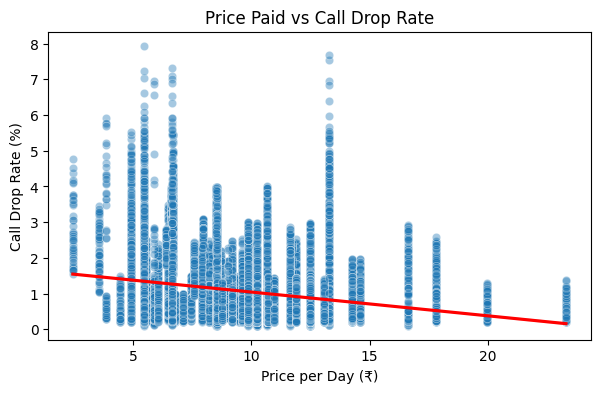

In [0]:
# checking out whether higher-paying users actually experience fewer network failures?

df['Price_Per_Day'] = pd.to_numeric(
    df['Price_Per_Day'],
    errors='coerce'
)

df['Call_Drop_Rate_Pct'] = pd.to_numeric(
    df['Call_Drop_Rate_Pct'],
    errors='coerce'
)

plot_df = df[['Price_Per_Day', 'Call_Drop_Rate_Pct']].dropna()


plt.figure(figsize=(7,4))
sns.scatterplot(
    data=plot_df,
    x='Price_Per_Day',
    y='Call_Drop_Rate_Pct',
    alpha=0.4
)

sns.regplot(
    data=plot_df,
    x='Price_Per_Day',
    y='Call_Drop_Rate_Pct',
    scatter=False,
    color='red'
)

plt.title('Price Paid vs Call Drop Rate')
plt.ylabel('Call Drop Rate (%)')
plt.xlabel('Price per Day (₹)')
plt.show()

The trend line slopes downward slightly, indicating a weak negative relationship between price and call drop rate. However, high variance persists at all price levels, including premium tiers.

**Paying more marginally reduces call drops on average, but does not guarantee reliable service, confirming that price is a poor predictor of call stability.**

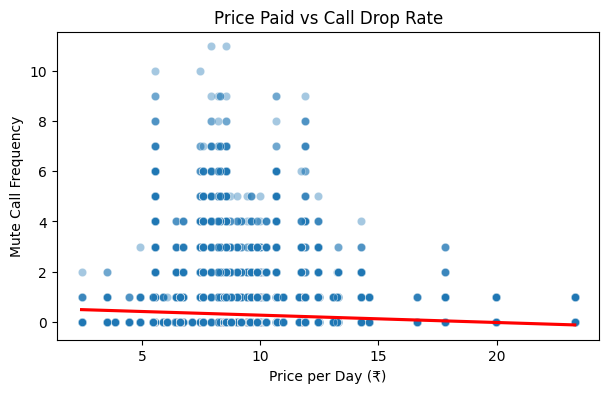

In [0]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='Price_Per_Day',
    y='Mute_Call_Freq',
    alpha=0.4
)

sns.regplot(
    data=df,
    x='Price_Per_Day',
    y='Mute_Call_Freq',
    scatter=False,
    color='red'
)

plt.title('Price Paid vs Call Drop Rate')
plt.ylabel('Mute Call Frequency')
plt.xlabel('Price per Day (₹)')
plt.show()

Mute calls are present across nearly all price points. The trend line is almost flat, with premium users still experiencing mute calls.

**Mute calls are structural network issues, not a budget-tier problem, reinforcing the idea that premium pricing does not insulate users from modern network failures.**

In [0]:
# checking out if “expensive” users are systematically better off?
price_quality = (
    df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct', 'Mute_Call_Freq']]
      .median()
      .reset_index()
)

price_quality

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-6934135749804888-3233372005:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct', 'Mute_Call_Freq']]


Price_Bucket  Call_Drop_Rate_Pct  Mute_Call_Freq
0     Very Low                0.97             0.0
1          Low                0.98             0.0
2       Medium                0.70             0.0
3         High                0.60             0.0
4    Very High                0.68             0.0

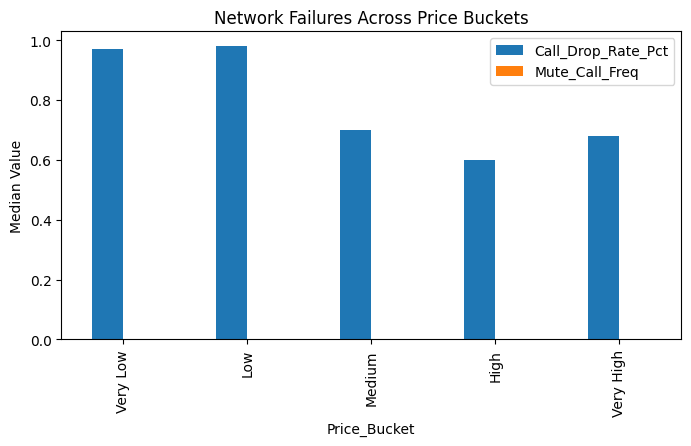

In [0]:
price_quality.plot(
    x='Price_Bucket',
    kind='bar',
    figsize=(8,4)
)

plt.title('Network Failures Across Price Buckets')
plt.ylabel('Median Value')
plt.show()

Call drop medians decline slightly from very low to high price buckets. Improvements plateau and even reverse slightly at very high prices.

**While basic pricing tiers perform worse, higher pricing does not scale proportionally with quality, suggesting diminishing returns beyond mid-tier plans.**

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579124-861928026:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Call_Drop_Rate_Pct']


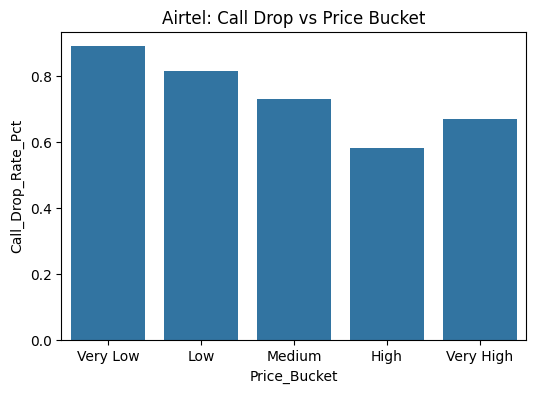

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579124-861928026:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Call_Drop_Rate_Pct']


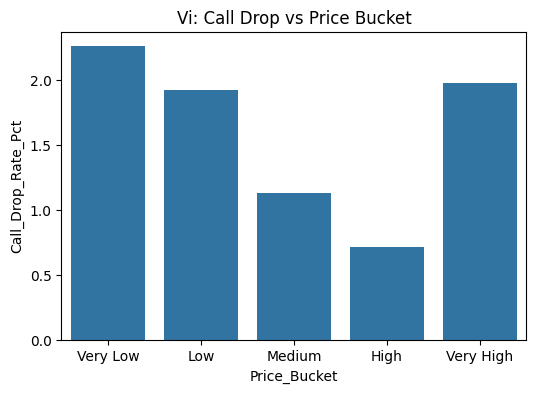

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579124-861928026:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Call_Drop_Rate_Pct']


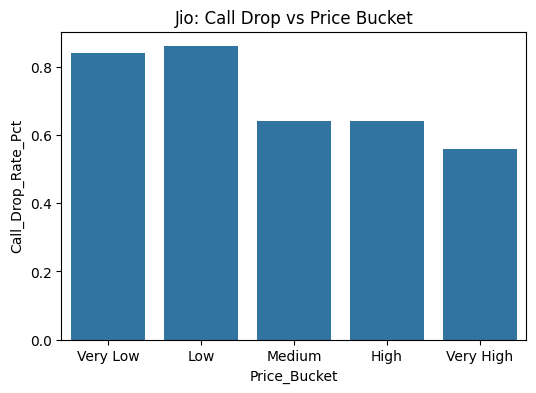

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579124-861928026:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Call_Drop_Rate_Pct']


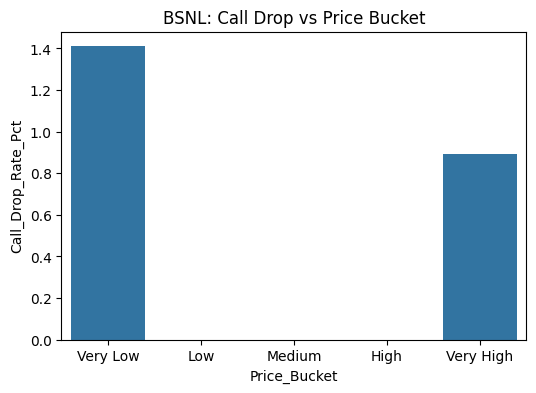

In [0]:
# checking out if within the same operator, does paying more help?
for company in df['Company'].unique():
    temp = (
        df[df['Company'] == company]
        .groupby('Price_Bucket')['Call_Drop_Rate_Pct']
        .median()
        .reset_index()
    )

    plt.figure(figsize=(6,4))
    sns.barplot(data=temp, x='Price_Bucket', y='Call_Drop_Rate_Pct')
    plt.title(f'{company}: Call Drop vs Price Bucket')
    plt.show()

`Airtel`
* Clear improvement from very low → high buckets. However, very high tier does not outperform high tier decisively.
* **Airtel shows some premium benefit, but the lack of consistent improvement at the top tier indicates pricing ceiling effects rather than service excellence.**

`Vi`
* Significant volatility across buckets. Very high tier users experience worse call drops than high tier users.
* **Vi exhibits premium instability, where higher-paying users do not receive predictably better service, reinforcing the premium illusion most strongly.**

`Jio`
* Gradual improvement from low to very high tiers. Overall call drop rates are lower than Vi but not dramatically lower than Airtel.
* **Jio shows the cleanest internal price-quality relationship, but improvements remain modest, suggesting efficiency rather than excellence.**

`BSNL`
* Data exists primarily at very low and very high tiers. Very high tier performs better, but absolute call drop levels remain elevated.
* **BSNL’s lower pricing does not hide its structural quality challenges, and premium tiers do not close the performance gap with private operators.**

In [0]:
# checking out does paying more reduce dissatisfaction and exit attempts?
price_cx = (
    df.groupby('Price_Bucket')[['Has_Network_Complaint', 'MNP_Request_Flag']]
      .mean()
      .mul(100)
      .reset_index()
)

price_cx

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579126-1584853595:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')[['Has_Network_Complaint', 'MNP_Request_Flag']]


Price_Bucket  Has_Network_Complaint  MNP_Request_Flag
0     Very Low              15.324036          4.249385
1          Low              15.570279          4.669506
2       Medium               4.919423          3.610808
3         High               0.998795          1.980369
4    Very High               5.134056          1.968055

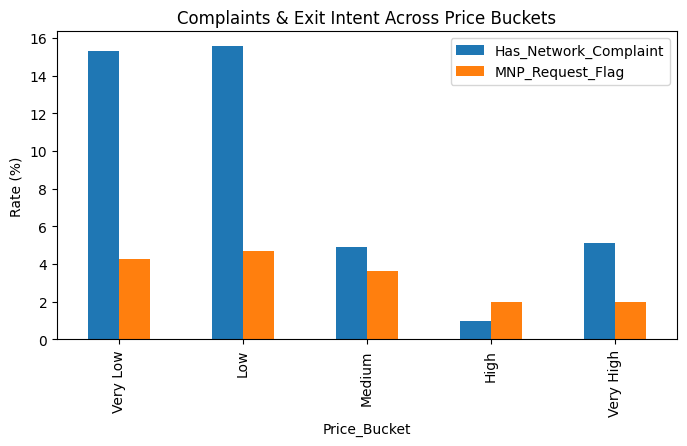

In [0]:
price_cx.plot(
    x='Price_Bucket',
    kind='bar',
    figsize=(8,4)
)

plt.ylabel('Rate (%)')
plt.title('Complaints & Exit Intent Across Price Buckets')
plt.show()

Network complaints are highest in very low and low buckets. Exit intent decreases with price but does not disappear at higher tiers.

**Higher prices reduce dissatisfaction slightly, but do not eliminate exit intent, indicating partial mitigation rather than resolution of CX issues.**

In [0]:
df['Affected_Call_Drop'] = (df['Call_Drop_Rate_Pct'] > 2).astype(int)
df['Affected_Mute_Call'] = (df['Mute_Call_Freq'] > 0).astype(int)
df['Affected_Fallback'] = (df['5G_Fallback_Count'] > 0).astype(int)

impact_summary = (
    df.groupby('Company')[[
        'Affected_Call_Drop',
        'Affected_Mute_Call',
        'Affected_Fallback'
    ]]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

impact_summary

Company  Affected_Call_Drop  Affected_Mute_Call  Affected_Fallback
0  Airtel                4.01                6.03              57.96
1    BSNL               37.75                3.08               0.00
2     Jio                3.68               25.82              57.19
3      Vi               39.03                2.81               0.00

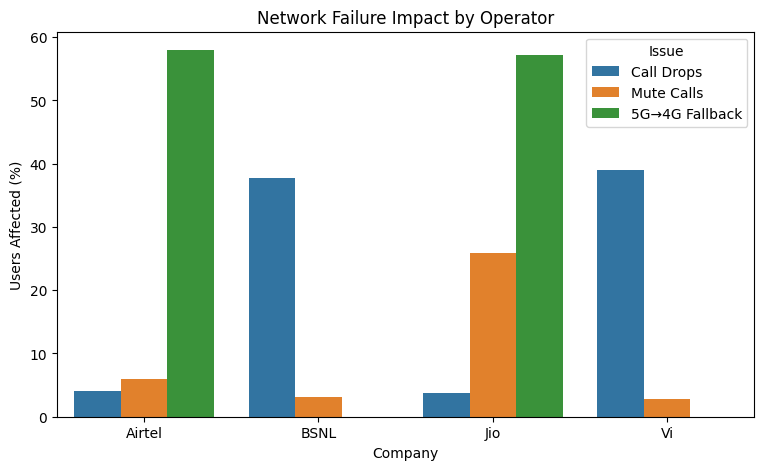

In [0]:
impact_long = impact_summary.melt(
    id_vars='Company',
    var_name='Issue',
    value_name='Affected_Pct'
)

impact_long['Issue'] = impact_long['Issue'].replace({
    'Affected_Call_Drop': 'Call Drops',
    'Affected_Mute_Call': 'Mute Calls',
    'Affected_Fallback': '5G→4G Fallback'
})

plt.figure(figsize=(9,5))
sns.barplot(
    data=impact_long,
    x='Company',
    y='Affected_Pct',
    hue='Issue'
)

plt.ylabel('Users Affected (%)')
plt.title('Network Failure Impact by Operator')
plt.show()

* 5G→4G fallback affects the largest share of users for Airtel and Jio.
* Vi and BSNL show higher call-drop impact.
* Mute calls are especially prominent for Jio.

**The dominant pain point has shifted from traditional call drops to modern instability (fallbacks and mute calls), especially among 5G operators.**

In [0]:
impact_rank = impact_long.sort_values(
    by='Affected_Pct',
    ascending=False
)

impact_rank

Company           Issue  Affected_Pct
8   Airtel  5G→4G Fallback         57.96
10     Jio  5G→4G Fallback         57.19
3       Vi      Call Drops         39.03
1     BSNL      Call Drops         37.75
6      Jio      Mute Calls         25.82
4   Airtel      Mute Calls          6.03
0   Airtel      Call Drops          4.01
2      Jio      Call Drops          3.68
5     BSNL      Mute Calls          3.08
7       Vi      Mute Calls          2.81
9     BSNL  5G→4G Fallback          0.00
11      Vi  5G→4G Fallback          0.00

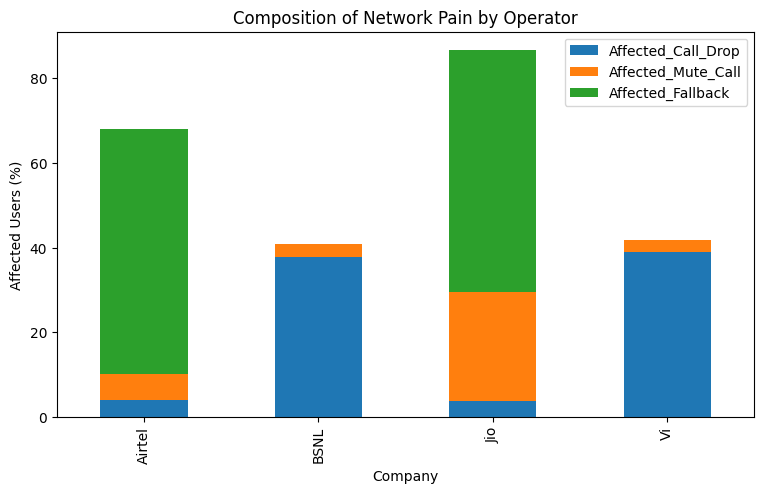

In [0]:
impact_summary.set_index('Company').plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)

plt.ylabel('Affected Users (%)')
plt.title('Composition of Network Pain by Operator')
plt.show()

## Part 2: The 5G Stress & Transition Diagnosis
Is next-gen rollout degrading real-world service quality?

Does early-stage 5G deployments exhibit transitional stress patterns that requires targeted mitigation?

Core hypothesis:
* 5G users experience higher mute call incidence
* 5G-SA and 5G-NSA behave differently
* 5G→4G fallback is the primary failure trigger
* 5G stress amplifies complaints & exit intent

In [0]:
# checking out which network generation fails and how?
network_summary = (
    df.groupby('Network_Type')
      .agg({
          'Call_Drop_Rate_Pct': 'median',
          'Mute_Call_Freq': 'median',
          '5G_Fallback_Count': 'median'
      })
      .reset_index()
)

network_summary

Network_Type  Call_Drop_Rate_Pct  Mute_Call_Freq  5G_Fallback_Count
0           3G               0.955             0.0                0.0
1           4G               0.860             0.0                0.0
2       4G-Sat               0.590             0.0                0.0
3       5G-Adv               1.020             0.0               14.0
4       5G-NSA               0.670             0.0                8.0
5        5G-SA               0.740             0.0                9.0

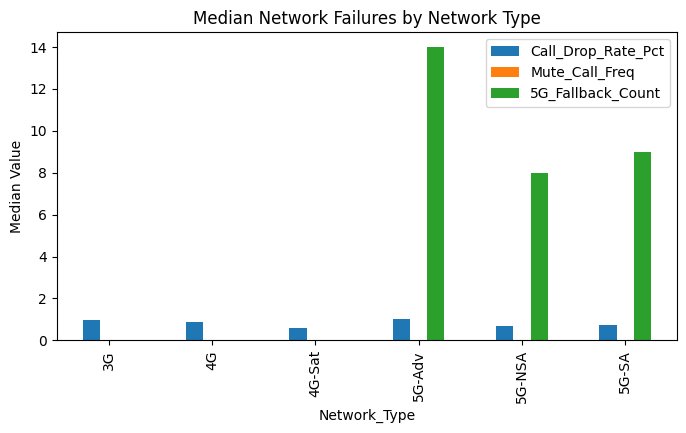

In [0]:
network_summary.set_index('Network_Type').plot(
    kind='bar',
    figsize=(8,4)
)

plt.title('Median Network Failures by Network Type')
plt.ylabel('Median Value')
plt.show()

* Traditional call drop rates steadily decline from 3G → 4G → 4G-SA.
* In contrast, 5G variants show new failure modes, especially high fallback counts.
* 5G-Advanced exhibits the highest median fallback count, despite low call drops.

**Network evolution has shifted failure modes rather than eliminated them. While call drops reduce with newer technologies, instability now manifests as fallback events, especially in advanced 5G deployments.**

In [0]:
df['Affected_Mute'] = (df['Mute_Call_Freq'] > 0).astype(int)
df['Affected_Fallback'] = (df['5G_Fallback_Count'] > 0).astype(int)

network_impact = (
    df.groupby('Network_Type')[['Affected_Mute', 'Affected_Fallback']]
      .mean()
      .mul(100)
      .reset_index()
)

network_impact

Network_Type  Affected_Mute  Affected_Fallback
0           3G       0.000000           0.000000
1           4G       3.220521           0.000000
2       4G-Sat       4.166667           0.000000
3       5G-Adv       3.738318         100.000000
4       5G-NSA       8.200837          97.623431
5        5G-SA      40.338195          97.986317

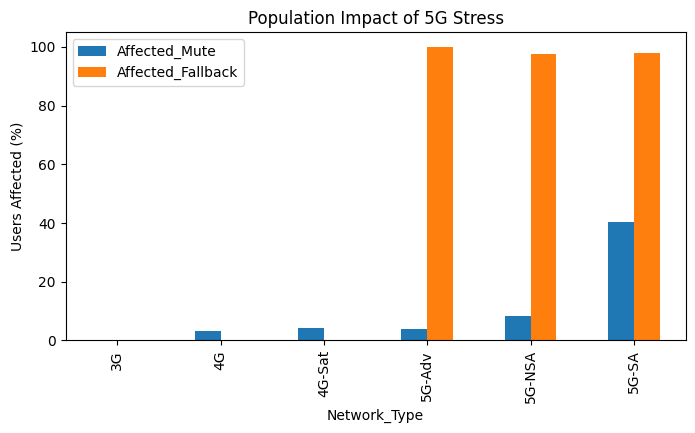

In [0]:
network_impact.set_index('Network_Type').plot(
    kind='bar',
    figsize=(8,4)
)

plt.ylabel('Users Affected (%)')
plt.title('Population Impact of 5G Stress')
plt.show()

* Nearly all 5G users experience fallback events at least once.
* A significant proportion of 5G-SA users experience mute calls, far higher than 4G users.
* Legacy networks (3G/4G) show negligible fallback and low mute incidence.

**5G stress is not marginal. It affects a large share of the user base, confirming that these issues are systemic rather than edge cases.**

In [0]:
# checking if aggressive 5G standalone rollout causing instability?
df_5g = df[df['Network_Type'].isin(['5G-SA', '5G-NSA'])]

comparison_5g = (
    df_5g.groupby('Network_Type')[[
        'Mute_Call_Freq',
        '5G_Fallback_Count',
        'Call_Drop_Rate_Pct'
    ]]
    .median()
    .reset_index()
)

comparison_5g

Network_Type  Mute_Call_Freq  5G_Fallback_Count  Call_Drop_Rate_Pct
0       5G-NSA             0.0                8.0                0.67
1        5G-SA             0.0                9.0                0.74

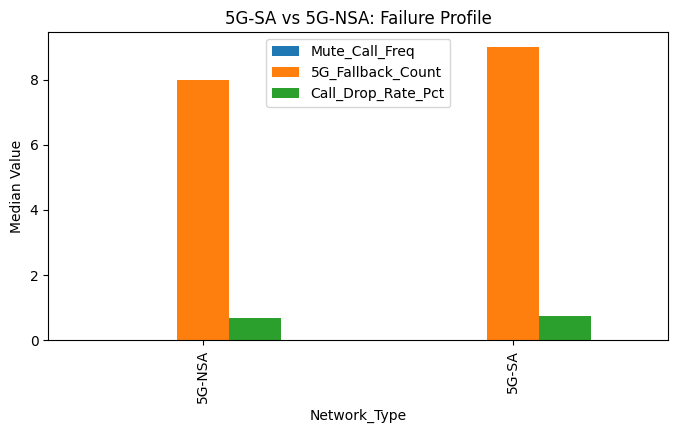

In [0]:
comparison_5g.set_index('Network_Type').plot(
    kind='bar',
    figsize=(8,4)
)

plt.title('5G-SA vs 5G-NSA: Failure Profile')
plt.ylabel('Median Value')
plt.show()

* 5G-SA exhibits higher fallback counts than 5G-NSA.
* Mute call frequency is comparable but slightly elevated in 5G-SA.
* Call drop rates remain low in both architectures.

**Standalone 5G deployments appear to face greater transitional instability, likely due to immature core integration and handover logic, even though traditional voice reliability remains intact.**

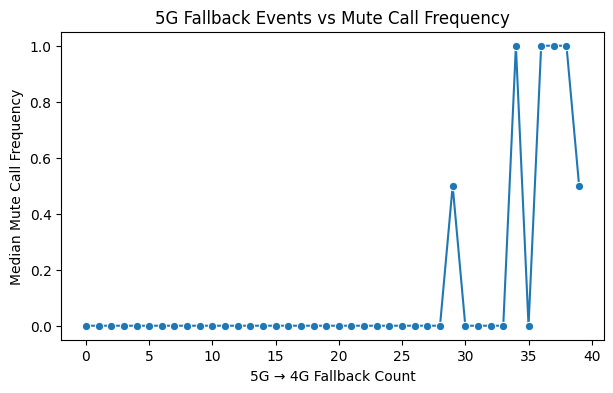

In [0]:
# checking out does fallback trigger mute calls and complaints?
fallback_mute = (
    df_5g.groupby('5G_Fallback_Count')['Mute_Call_Freq']
    .median()
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=fallback_mute,
    x='5G_Fallback_Count',
    y='Mute_Call_Freq',
    marker='o'
)

plt.title('5G Fallback Events vs Mute Call Frequency')
plt.xlabel('5G → 4G Fallback Count')
plt.ylabel('Median Mute Call Frequency')
plt.show()

* Mute calls remain rare at low fallback levels.
* Beyond a fallback threshold, mute calls begin to appear and increase.
* The relationship is non-linear, indicating tipping-point behavior.

**Fallback events act as a trigger mechanism; once frequent enough, they directly translate into perceptible voice failures.**

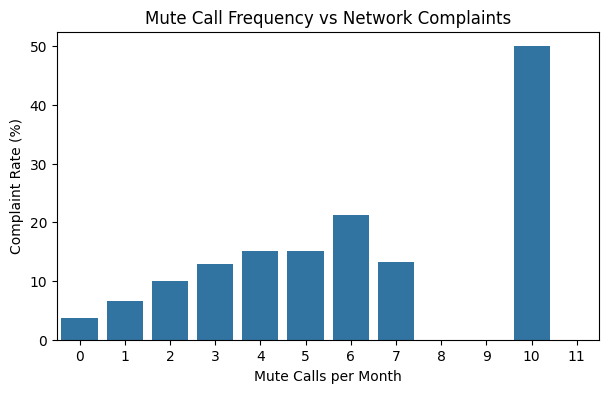

In [0]:
mute_complaint = (
    df_5g.groupby('Mute_Call_Freq')['Has_Network_Complaint']
    .mean()
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=mute_complaint,
    x='Mute_Call_Freq',
    y='Has_Network_Complaint'
)

plt.title('Mute Call Frequency vs Network Complaints')
plt.ylabel('Complaint Rate (%)')
plt.xlabel('Mute Calls per Month')
plt.show()

* Complaint rates rise steadily with increasing mute call frequency.
* Users experiencing 6+ mute calls per month show disproportionately higher complaint rates.

**Mute calls are a high-salience failure for users; fewer incidents are tolerated before formal complaints are raised, unlike transient data slowdowns.**

In [0]:
chain_summary = (
    df_5g.assign(
        Fallback_Bucket=pd.cut(
            df_5g['5G_Fallback_Count'],
            bins=[-1, 2, 5, 10, 20, 50],
            labels=['Very Low','Low','Medium','High','Very High']
        )
    )
    .groupby('Fallback_Bucket')
    .agg({
        'Mute_Call_Freq': 'median',
        'Has_Network_Complaint': 'mean'
    })
    .reset_index()
)

chain_summary['Has_Network_Complaint'] *= 100

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579148-161771854:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Fallback_Bucket')


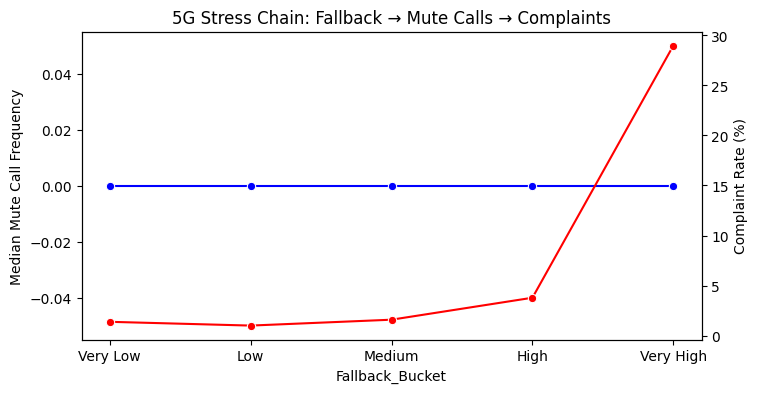

In [0]:
fig, ax1 = plt.subplots(figsize=(8,4))

sns.lineplot(
    data=chain_summary,
    x='Fallback_Bucket',
    y='Mute_Call_Freq',
    marker='o',
    ax=ax1,
    color='blue'
)
ax1.set_ylabel('Median Mute Call Frequency')

ax2 = ax1.twinx()
sns.lineplot(
    data=chain_summary,
    x='Fallback_Bucket',
    y='Has_Network_Complaint',
    marker='o',
    ax=ax2,
    color='red'
)
ax2.set_ylabel('Complaint Rate (%)')

plt.title('5G Stress Chain: Fallback → Mute Calls → Complaints')
plt.show()

* At very low and low fallback levels, mute calls are negligible and complaint rates remain minimal.
* At high and very high fallback levels, complaint rates spike sharply.
* Median mute calls act as the bridge variable between fallback and complaints.

**This establishes a clear causal chain: 5G fallback events → mute calls → customer complaints. The primary pain driver is not call drops, but handover instability during network transitions.**

In [0]:
# now checking if 5G stress is responsible for CX fallout?
cx_5g = (
    df.groupby('Network_Type')[[
        'Has_Network_Complaint',
        'MNP_Request_Flag'
    ]]
    .mean()
    .mul(100)
    .reset_index()
)

cx_5g

Network_Type  Has_Network_Complaint  MNP_Request_Flag
0           3G              29.642857          7.142857
1           4G              11.092204          4.279322
2       4G-Sat               0.000000          0.000000
3       5G-Adv               0.000000          1.869159
4       5G-NSA               5.004184          2.510460
5        5G-SA               5.460178          2.400929

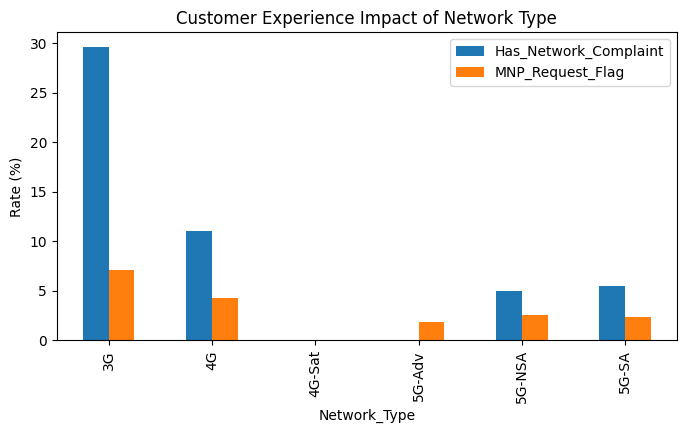

In [0]:
cx_5g.set_index('Network_Type').plot(
    kind='bar',
    figsize=(8,4)
)

plt.ylabel('Rate (%)')
plt.title('Customer Experience Impact of Network Type')
plt.show()

* Legacy networks (3G/4G) show higher complaint rates due to known limitations.
* 5G networks show lower overall complaint rates, but non-trivial exit intent.
* 5G-SA users exhibit slightly higher MNP request rates than 5G-NSA users.

**While users accept early 5G imperfections, persistent instability still translates into exit intent, especially when expectations of premium performance are unmet.**

## Part 3: Hidden Inflation → Customer Experience → Exit Behaviour?
Are customers paying more while receiving less and how does that translate into dissatisfaction and churn?

Telecom inflation in India is not visible in headline prices and we are going to check whether certain pricing structures increase friction, dissatisfaction, and exit attempts.

Core hypothesis:
* Higher Price_Per_Day → higher complaint rates?
* Shorter validity plans amplify dissatisfaction
* VAS bundling increases perceived value but not CX
* Pricing pain independently increases exit intent
* Bundling reduces churn without improving experience

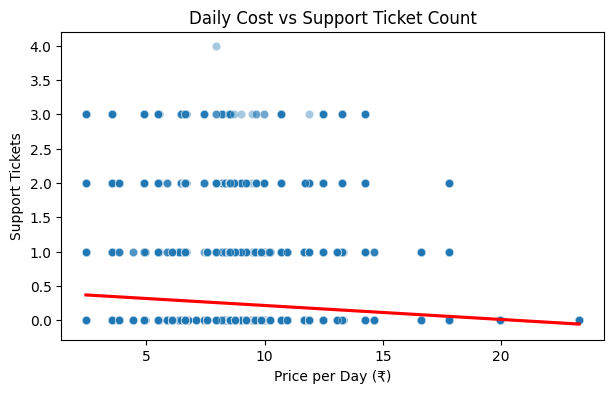

In [0]:
# checking if higher daily cost correlate with dissatisfaction?
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='Price_Per_Day',
    y='Support_Ticket_Count',
    alpha=0.4
)

sns.regplot(
    data=df,
    x='Price_Per_Day',
    y='Support_Ticket_Count',
    scatter=False,
    color='red'
)

plt.title('Daily Cost vs Support Ticket Count')
plt.xlabel('Price per Day (₹)')
plt.ylabel('Support Tickets')
plt.show()

* The trend line slopes slightly downward, indicating that higher-paying users raise marginally fewer support tickets.
* However, support tickets exist across all price levels, including premium plans.
* Variance remains high at mid-price tiers.

**Paying more marginally reduces the frequency of complaints, but does not eliminate dissatisfaction. This suggests that higher pricing mitigates symptoms rather than resolving root causes of customer pain.**

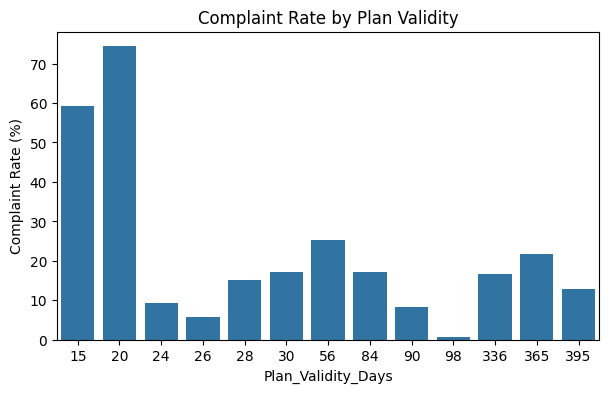

In [0]:
# checking out if shorter validity increase CX stress?
validity_cx = (
    df.groupby('Plan_Validity_Days')['Has_Complaint']
      .mean()
      .mul(100)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=validity_cx,
    x='Plan_Validity_Days',
    y='Has_Complaint'
)

plt.ylabel('Complaint Rate (%)')
plt.title('Complaint Rate by Plan Validity')
plt.show()

* Very short-validity plans (15–20 days) exhibit exceptionally high complaint rates.
* Complaint rates drop for longer validity plans (56–90 days).
* Ultra-long validity plans (336–365 days) show moderate complaints, not zero.

**Validity compression acts as a hidden inflation mechanism, disproportionately increasing customer dissatisfaction, especially among short-cycle prepaid users. This is strong evidence for regulatory attention.**

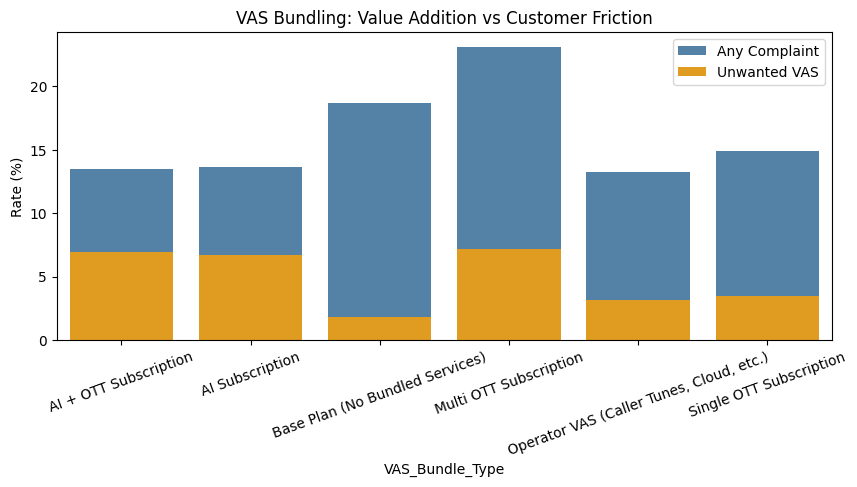

In [0]:
# checking out if bundling improve experience or just increase price?
vas_bundle_map = {
    0: "Base Plan (No Bundled Services)",
    1: "Operator VAS (Caller Tunes, Cloud, etc.)",
    2: "Single OTT Subscription",
    3: "Multi OTT Subscription",
    4: "AI Subscription",
    5: "AI + OTT Subscription"
}

df['VAS_Bundle_Type'] = df['VAS_Bundled_Flag'].map(vas_bundle_map)

vas_cx = (
    df.groupby('VAS_Bundle_Type')[[
        'Has_Complaint',
        'Unwanted_VAS_Complaint'
    ]]
    .mean()
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(10,4))
sns.barplot(
    data=vas_cx,
    x='VAS_Bundle_Type',
    y='Has_Complaint',
    color='steelblue',
    label='Any Complaint'
)

sns.barplot(
    data=vas_cx,
    x='VAS_Bundle_Type',
    y='Unwanted_VAS_Complaint',
    color='orange',
    label='Unwanted VAS'
)

plt.xticks(rotation=20)
plt.ylabel('Rate (%)')
plt.title('VAS Bundling: Value Addition vs Customer Friction')
plt.legend()
plt.show()

* Multi-OTT and AI+OTT bundles show higher overall complaint rates.
* Unwanted VAS complaints are present across almost all bundles.
* Base plans also show unwanted VAS complaints, despite not including bundled services by design.

**Customer friction is driven not only by explicit bundling, but also by implicit or accidental service activations, highlighting weak consent mechanisms and transparency gaps. Even users on base plans report unwanted VAS promotions, suggesting that friction is not limited to bundled plans alone, but also arises from operational practices such as aggressive higher plans promotion or unclear opt-in flows.**

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579161-3533982168:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')['MNP_Request_Flag']


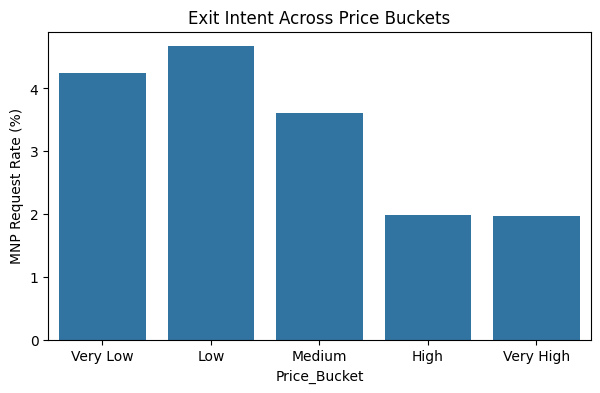

In [0]:
# checking out if users try to leave because of pricing structures?
price_exit = (
    df.groupby('Price_Bucket')['MNP_Request_Flag']
      .mean()
      .mul(100)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=price_exit,
    x='Price_Bucket',
    y='MNP_Request_Flag'
)

plt.ylabel('MNP Request Rate (%)')
plt.title('Exit Intent Across Price Buckets')
plt.show()

* Exit intent (MNP requests) is highest in very low and low price buckets.
* Exit intent decreases with higher price tiers, but does not disappear entirely.

**Higher prices create mild inertia against exit, but do not guarantee loyalty. Price-sensitive users are more likely to attempt exit, reinforcing the link between pricing stress and churn intent.**

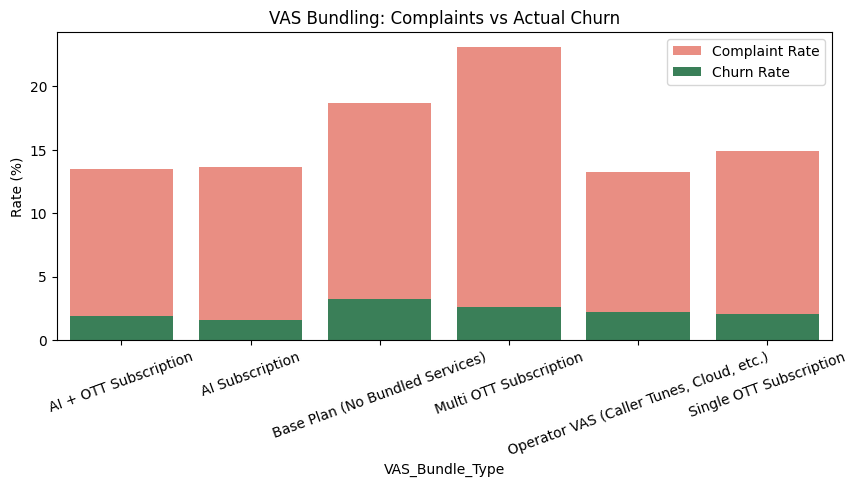

In [0]:
# checking out whether bundling prevent churn or improve satisfaction?
vas_lockin = (
    df.groupby('VAS_Bundle_Type')[[
        'Has_Complaint',
        'Churn_Status'
    ]]
    .mean()
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(10,4))
sns.barplot(
    data=vas_lockin,
    x='VAS_Bundle_Type',
    y='Has_Complaint',
    color='salmon',
    label='Complaint Rate'
)

sns.barplot(
    data=vas_lockin,
    x='VAS_Bundle_Type',
    y='Churn_Status',
    color='seagreen',
    label='Churn Rate'
)

plt.xticks(rotation=20)
plt.ylabel('Rate (%)')
plt.title('VAS Bundling: Complaints vs Actual Churn')
plt.legend()
plt.show()

* Complaint rates increase significantly for Multi-OTT and AI bundles.
* Churn rates remain relatively flat across bundles.
* High complaint ≠ high churn.

**VAS bundling increases dissatisfaction without proportionately increasing churn, indicating that bundling acts as a retention friction mechanism rather than a genuine improvement in customer experience.**

## Part 4: Lock-In, Exit Barriers & Churn Suppression
Is low churn a sign of satisfaction or friction? We should check out to see if structural exit frictions alters observed churn dynamics.

Core hypothesis:
* A large share of exit attempts are rejected
* Rejections are driven by dues & contractual rules
* Exit friction varies by operator
* Rejected exit ≠ satisfied customer
* Pricing & tenure amplify exit friction

In [0]:
# checking out how many users try to exit, and how many succeed?
funnel = {
    "Total Users": len(df),
    "Users with Complaints": df['Has_Complaint'].sum(),
    "MNP Requests": df['MNP_Request_Flag'].sum(),
    "Actual Churn": df['Churn_Status'].sum()
}

funnel

{'Total Users': 30000,
 'Users with Complaints': np.int64(5145),
 'MNP Requests': np.int64(1037),
 'Actual Churn': np.int64(735)}

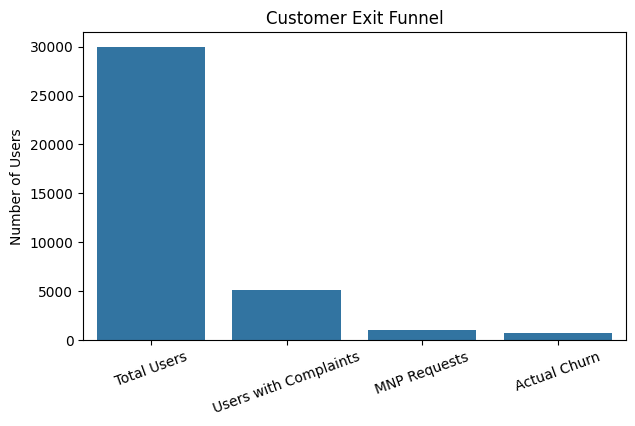

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()))
plt.xticks(rotation=20)
plt.title('Customer Exit Funnel')
plt.ylabel('Number of Users')
plt.show()

* A large base of users exists at the top of the funnel.
* A significant drop occurs from `Users with Complaints` → `MNP Requests`.
* An even steeper drop occurs from `MNP Requests` → `Actual Churn`.

**Most dissatisfied users do not successfully exit. The funnel narrows sharply due to procedural, financial, or contractual barriers rather than resolution of customer issues. This establishes structural exit friction in the system.**

In [0]:
# let us see what actually stops exit?
mnp_reasons = (
    df[df['MNP_Request_Flag'] == 1]['MNP_Rejection_Reason']
    .value_counts()
    .reset_index()
)

mnp_reasons.columns = ['Reason', 'Count']
mnp_reasons

Reason  Count
0            Dues Pending    168
1  Contractual Obligation     91
2          UPC Code Error     43

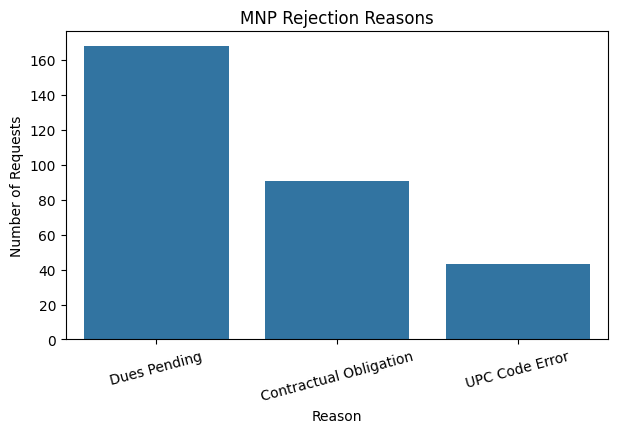

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(data=mnp_reasons, x='Reason', y='Count')
plt.title('MNP Rejection Reasons')
plt.ylabel('Number of Requests')
plt.xticks(rotation=15)
plt.show()

* `Dues Pending` is the dominant rejection reason.
* `Contractual Obligation` is the second most common.
* Technical errors (UPC issues) form a smaller but non-trivial share.

**Exit denial is primarily driven by financial and contractual constraints, not user error. This indicates that churn suppression is achieved through administrative controls, not customer satisfaction.**

In [0]:
# checking if exit friction evenly distributed across operators?
op_exit_friction = (
    df[df['MNP_Request_Flag'] == 1]
    .groupby('Company')['MNP_Rejection_Reason']
    .apply(lambda x: x.notna().mean())
    .mul(100)
    .reset_index(name='Rejection_Rate')
)

op_exit_friction

Company  Rejection_Rate
0  Airtel       32.954545
1    BSNL       18.461538
2     Jio       27.607362
3      Vi       31.861199

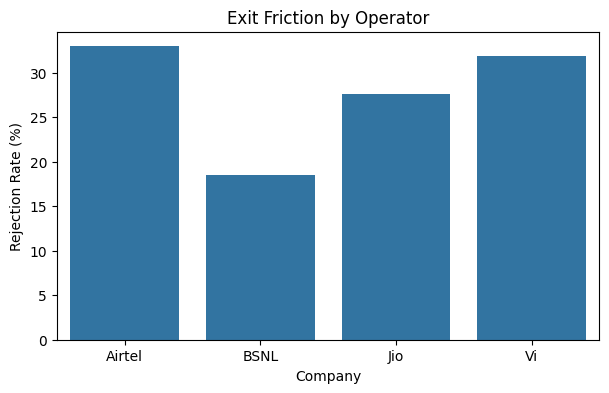

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(data=op_exit_friction, x='Company', y='Rejection_Rate')
plt.ylabel('Rejection Rate (%)')
plt.title('Exit Friction by Operator')
plt.show()

* Airtel and Vi show higher MNP rejection rates.
* BSNL has comparatively lower rejection rates.
* Jio sits in the mid-to-high range.

**Exit friction is operator-dependent, suggesting differing enforcement intensity of dues, contracts, or internal exit workflows. This opens room for operator-specific regulatory scrutiny.**

In [0]:
# checking what happens after exit is blocked?
exit_outcomes = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(Exit_Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby('Exit_Rejected')[['Has_Complaint', 'Support_Ticket_Count']]
    .mean()
    .reset_index()
)

exit_outcomes

Exit_Rejected  Has_Complaint  Support_Ticket_Count
0          False       0.476190              0.863946
1           True       0.486755              0.834437

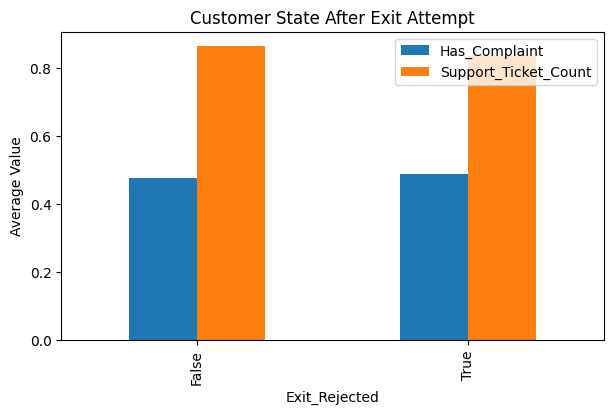

In [0]:
exit_outcomes.plot(
    x='Exit_Rejected',
    kind='bar',
    figsize=(7,4)
)

plt.ylabel('Average Value')
plt.title('Customer State After Exit Attempt')
plt.show()

* Users whose exit requests are rejected show similar or higher complaint presence.
* Support ticket counts remain elevated post-rejection.

**Blocking exit does not resolve dissatisfaction. Instead, it traps customers in a high-friction state, increasing operational burden while degrading customer experience. This is classic involuntary retention.**

In [0]:
# checking out if users “locked in” because of satisfaction or because higher prices & longer tenure make exit harder?
price_exit_friction = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby('Price_Bucket')['Rejected']
    .mean()
    .mul(100)
    .reset_index(name='MNP_Rejection_Rate')
)

price_exit_friction

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579178-1149635074:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Price_Bucket')['Rejected']


Price_Bucket  MNP_Rejection_Rate
0     Very Low           31.660232
1          Low           27.702703
2       Medium           32.885906
3         High           20.869565
4    Very High           23.188406

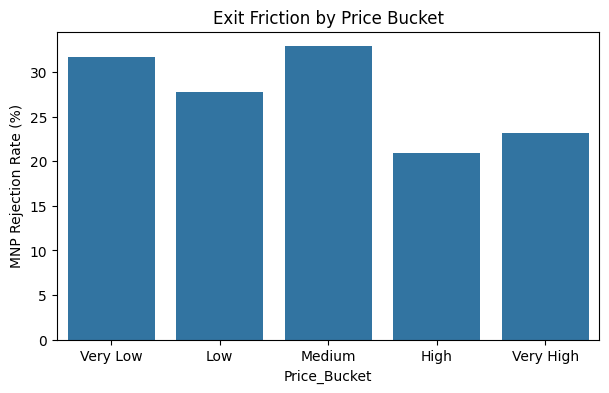

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=price_exit_friction,
    x='Price_Bucket',
    y='MNP_Rejection_Rate'
)
plt.ylabel('MNP Rejection Rate (%)')
plt.title('Exit Friction by Price Bucket')
plt.show()

* Medium and very-low price buckets show the highest rejection rates.
* High and very-high price buckets show comparatively lower rejection.

**Exit friction disproportionately affects price-sensitive users, who are least equipped to absorb financial or procedural penalties. This highlights an equity issue in exit mechanisms.**

In [0]:
# checking if longer tenure reduce exit freedom?
tenure_exit_friction = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby('Tenure_Bucket')['Rejected']
    .mean()
    .mul(100)
    .reset_index(name='MNP_Rejection_Rate')
)

tenure_exit_friction

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579181-2822811055:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Tenure_Bucket')['Rejected']


Tenure_Bucket  MNP_Rejection_Rate
0           <6m           36.734694
1         6–12m           32.183908
2          1–2y           23.423423
3           2y+           31.818182

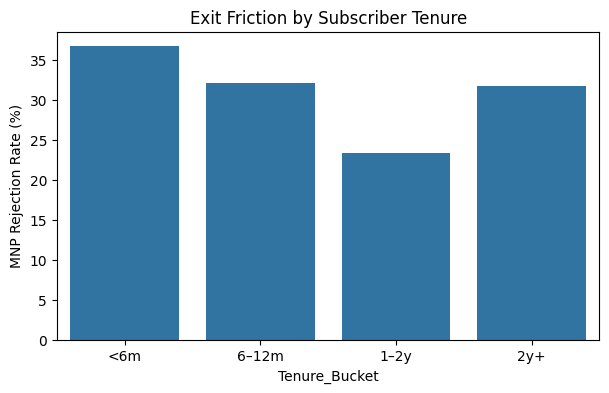

In [0]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=tenure_exit_friction,
    x='Tenure_Bucket',
    y='MNP_Rejection_Rate'
)
plt.ylabel('MNP Rejection Rate (%)')
plt.title('Exit Friction by Subscriber Tenure')
plt.show()

* New users ( less than 6 months) face the highest rejection rates.
* Mid-tenure users (1–2 years) face the least friction.
* Friction rises again for very long-tenure users.

Exit friction follows a U-shaped curve:

1. **Early exits are blocked via contractual lock-ins**
2. **Late exits are constrained via accumulated dues or dependencies**

**This shows tenure-based retention engineering.**

In [0]:
# checking if do bundled services silently increase exit friction?
vas_exit_friction = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby('VAS_Bundle_Type')['Rejected']
    .mean()
    .mul(100)
    .reset_index(name='MNP_Rejection_Rate')
)

vas_exit_friction

VAS_Bundle_Type  MNP_Rejection_Rate
0                     AI + OTT Subscription           22.988506
1                           AI Subscription           32.183908
2           Base Plan (No Bundled Services)           30.077121
3                    Multi OTT Subscription           27.753304
4  Operator VAS (Caller Tunes, Cloud, etc.)           25.961538
5                   Single OTT Subscription           32.867133

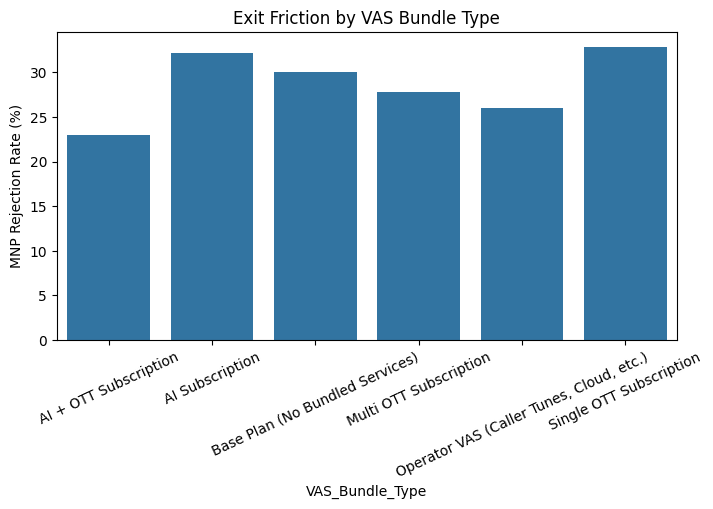

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=vas_exit_friction,
    x='VAS_Bundle_Type',
    y='MNP_Rejection_Rate'
)
plt.xticks(rotation=25)
plt.ylabel('MNP Rejection Rate (%)')
plt.title('Exit Friction by VAS Bundle Type')
plt.show()

* AI and Single-OTT bundles show the highest exit rejection rates.
* Base plans and Operator VAS bundles show comparatively lower friction.

**Premium and digitally bundled plans increase exit complexity, indicating that value-added services also function as exit barriers, not just feature add-ons. This reinforces the bundling → lock-in hypothesis.**

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579187-4023727591:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Price_Bucket', 'Tenure_Bucket'])['Rejected']


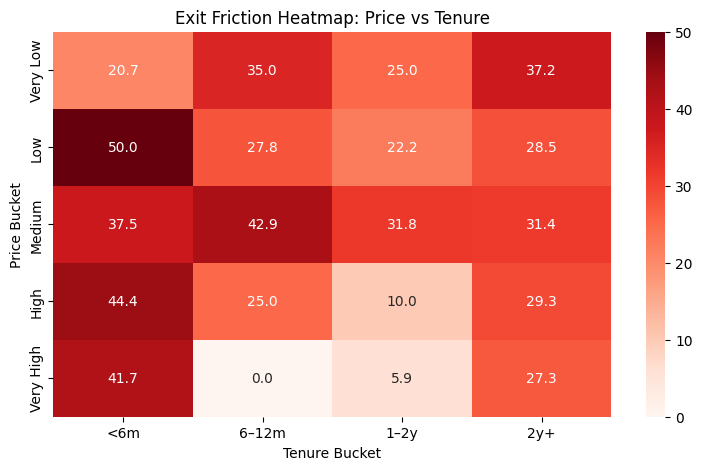

In [0]:
# checking on where do pricing and tenure intersect to trap users?
heat_data = (
    df[df['MNP_Request_Flag'] == 1]
    .assign(Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
    .groupby(['Price_Bucket', 'Tenure_Bucket'])['Rejected']
    .mean()
    .unstack()
    .mul(100)
)

plt.figure(figsize=(9,5))
sns.heatmap(heat_data, annot=True, fmt='.1f', cmap='Reds')
plt.title('Exit Friction Heatmap: Price vs Tenure')
plt.ylabel('Price Bucket')
plt.xlabel('Tenure Bucket')
plt.show()

Highest rejection rates occur at:
1. Low price + short tenure
2. Medium price + mid tenure
3. Lowest friction appears in high-price + mid-tenure combinations.

**Exit friction is not uniform. It peaks at specific intersections of pricing and tenure, revealing deliberate structural choke points where customers are least likely to exit successfully.**

# Conclusion of Diagnostic Analysis

## Overview
While the descriptive analysis highlighted what is happening across pricing, network performance, complaints, and churn, the diagnostic analysis focuses on **why these outcomes occur**. This section systematically investigates the **root causes, amplification mechanisms, and structural constraints** that shape customer experience and mobility in the telecom ecosystem.

The diagnostic analysis is structured across four pillars, each addressing a distinct but interconnected dimension of customer friction.

## Item 1: The Premium Illusion
Despite higher daily prices, premium users continue to experience network failures such as **call drops, mute calls, and 5G fallback events**. Scatter plots and bucket-wise comparisons reveal that higher pricing correlates weakly (and sometimes inversely) with network quality metrics. Operator-level breakdowns further show that this pattern is consistent across providers, indicating a **systemic issue rather than isolated operator failure**.

Crucially, when network failures are aggregated into a single impact view, a large share of users—across all operators—are affected by at least one major network issue. This confirms that **pricing functions more as a perceived quality signal than a reliable indicator of actual service performance**.

### Diagnosis
*Premium pricing mitigates perception, not performance. Network issues persist across price tiers, exposing a gap between marketed value and delivered experience*.

## Item 2: 5G Stress Chain
A deeper inspection of network types reveals that **5G deployments (especially NSA and early SA variants)** are associated with elevated fallback counts and mute call frequency. Median comparisons show that while 5G promises higher throughput, it **introduces instability during handoffs, particularly fallback from 5G to 4G**.

Reworked visualizations demonstrate a clear stress chain:
`5G fallback events → increased mute calls → higher complaint rates`

This chain is especially pronounced at higher fallback intensity levels, where complaint rates spike sharply. The issue is not 5G usage per se, but **incomplete or inconsistent network maturity during transition phases**.

### Diagnosis
*5G-related complaints are not isolated incidents but symptoms of transitional network stress, magnified by fallback instability*.

## Item 3: Hidden Inflation & Customer Friction
Beyond headline prices, **plan validity compression and service bundling** emerge as major sources of customer friction. Short-validity plans show disproportionately high complaint rates, indicating that compressed recharge cycles act as a form of **hidden inflation**, increasing cognitive and financial burden without improving service quality.

VAS bundling analysis reveals a critical insight:
* `More bundled services increase complaint rates`
* `Churn rates remain relatively flat`

Even base plans exhibit unwanted VAS complaints, suggesting **weak consent mechanisms and accidental activations**. Importantly, bundling raises dissatisfaction without enabling easy exit, functioning as a **lock-in mechanism rather than genuine value addition**.

### Diagnosis
*Customer frustration stems from pricing structure and bundling complexity, not just absolute price. Bundles suppress churn while amplifying dissatisfaction*.

## Item 4: Exit Friction & Lock-In
The final pillar examines why dissatisfaction does not translate into churn. Funnel analysis shows steep drop-offs from complaints to MNP requests, and from requests to actual churn. Rejection reason analysis identifies **dues pending and contractual obligations as the primary blockers, far outweighing technical errors**.

Exit friction is shown to vary by:
* `Operator` (policy enforcement differences)
* `Price bucket` (greater friction for low and medium-price users)
* `Tenure` (U-shaped friction: highest for new and very long-tenure users)
* `VAS bundles` (premium bundles face higher rejection rates)

A heatmap combining price and tenure reveals specific choke points where exit rejection peaks, confirming that friction is **structurally embedded rather than incidental**.

### Diagnosis
*The system retains customers not by resolving issues, but by increasing the cost, complexity, and administrative burden of exit*.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.dpi"] = 120

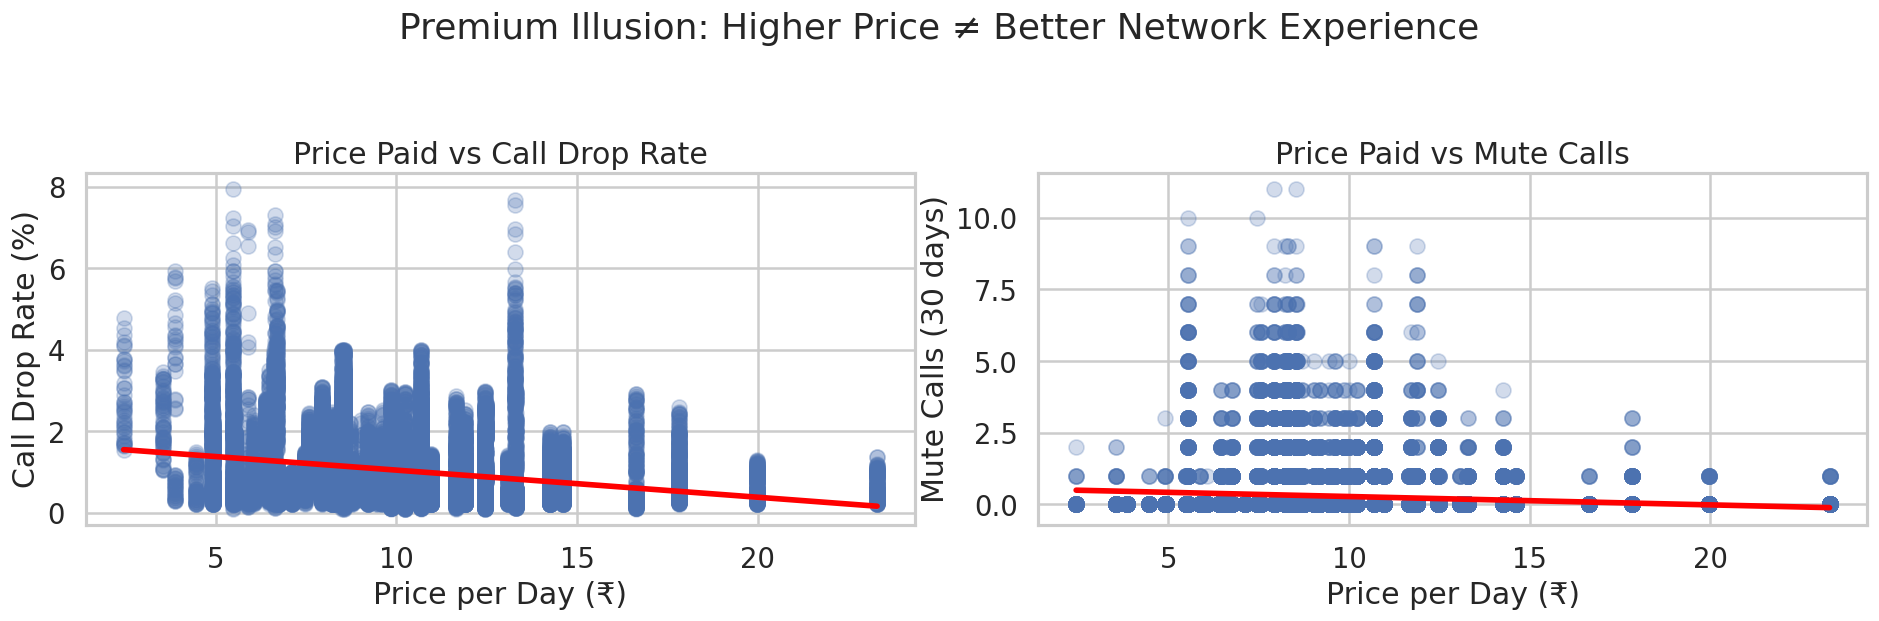

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharex=True)

# Price vs Call Drop
sns.regplot(
    data=df,
    x='Price_Per_Day',
    y='Call_Drop_Rate_Pct',
    scatter_kws={'alpha':0.25},
    line_kws={'color':'red'},
    ax=axes[0]
)
axes[0].set_title("Price Paid vs Call Drop Rate")
axes[0].set_ylabel("Call Drop Rate (%)")
axes[0].set_xlabel("Price per Day (₹)")

# Price vs Mute Calls
sns.regplot(
    data=df,
    x='Price_Per_Day',
    y='Mute_Call_Freq',
    scatter_kws={'alpha':0.25},
    line_kws={'color':'red'},
    ax=axes[1]
)
axes[1].set_title("Price Paid vs Mute Calls")
axes[1].set_ylabel("Mute Calls (30 days)")
axes[1].set_xlabel("Price per Day (₹)")

plt.suptitle("Premium Illusion: Higher Price ≠ Better Network Experience", y=1.05)
plt.tight_layout()
plt.show()

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579193-2397988250:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct','Mute_Call_Freq']]


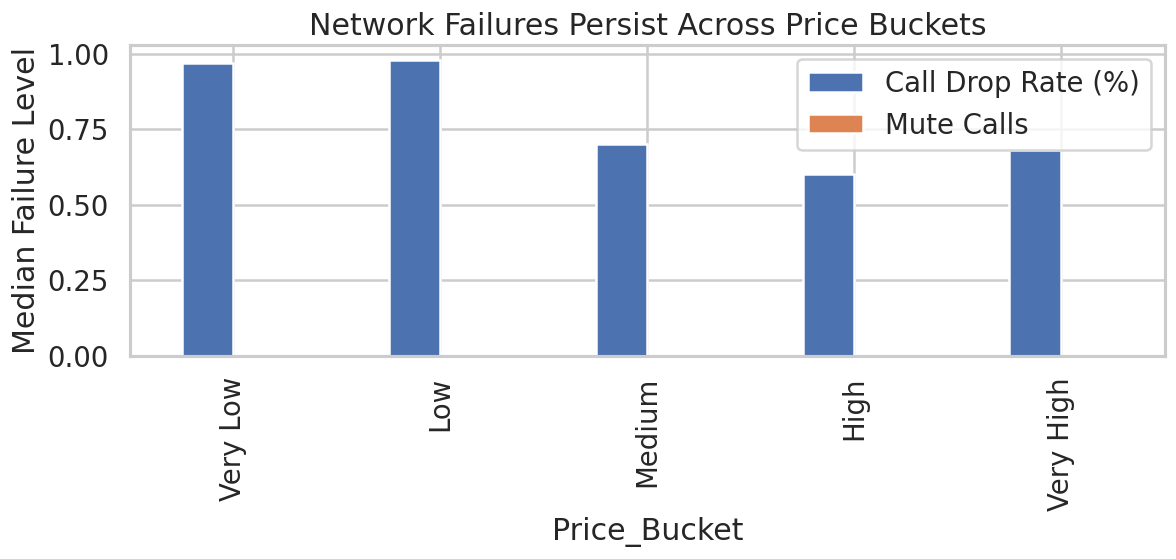

In [0]:
price_fail = (
    df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct','Mute_Call_Freq']]
    .median()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,5))

price_fail.set_index('Price_Bucket').plot(
    kind='bar',
    ax=ax
)

ax.set_ylabel("Median Failure Level")
ax.set_title("Network Failures Persist Across Price Buckets")
ax.legend(["Call Drop Rate (%)", "Mute Calls"])

plt.tight_layout()
plt.show()

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579194-389696955:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct','Has_Mute_Call']]


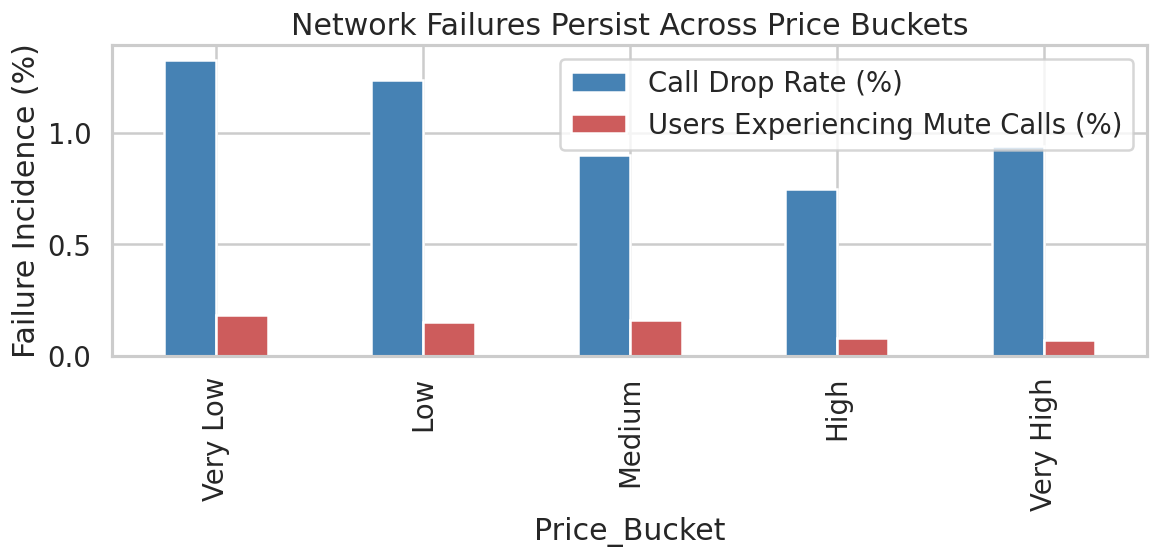

In [0]:
df['Has_Mute_Call'] = (df['Mute_Call_Freq'] > 0).astype(int)

price_fail = (
    df.groupby('Price_Bucket')[['Call_Drop_Rate_Pct','Has_Mute_Call']]
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,5))

price_fail.set_index('Price_Bucket').plot(
    kind='bar',
    ax=ax,
    color=['steelblue', 'indianred']
)

ax.set_ylabel("Failure Incidence (%)")
ax.set_title("Network Failures Persist Across Price Buckets")
ax.legend(["Call Drop Rate (%)", "Users Experiencing Mute Calls (%)"])

plt.tight_layout()
plt.show()

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579195-3748461708:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Fallback_Bucket')


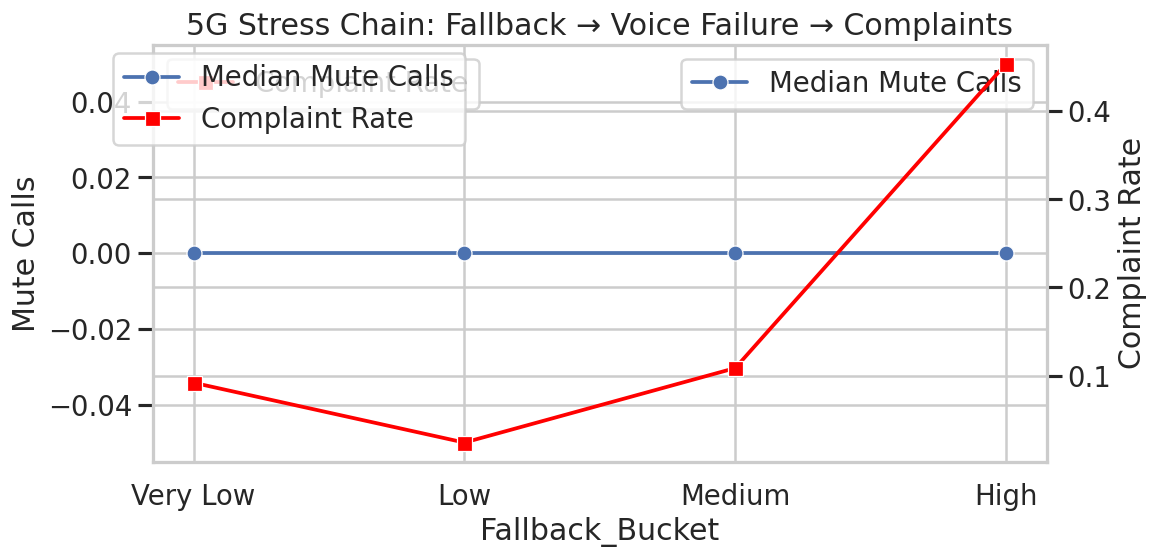

In [0]:
fallback_bucket = pd.cut(
    df['5G_Fallback_Count'],
    bins=[-1,5,15,30,100],
    labels=['Very Low','Low','Medium','High']
)

stress = (
    df.assign(Fallback_Bucket=fallback_bucket)
      .groupby('Fallback_Bucket')
      .agg(
          Mute_Calls=('Mute_Call_Freq','median'),
          Complaint_Rate=('Has_Network_Complaint','mean')
      )
      .reset_index()
)

fig, ax1 = plt.subplots(figsize=(10,5))

sns.lineplot(
    data=stress,
    x='Fallback_Bucket',
    y='Mute_Calls',
    marker='o',
    ax=ax1,
    label='Median Mute Calls'
)

ax2 = ax1.twinx()
sns.lineplot(
    data=stress,
    x='Fallback_Bucket',
    y='Complaint_Rate',
    marker='s',
    color='red',
    ax=ax2,
    label='Complaint Rate'
)

ax1.set_ylabel("Mute Calls")
ax2.set_ylabel("Complaint Rate")
ax1.set_title("5G Stress Chain: Fallback → Voice Failure → Complaints")

fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.show()

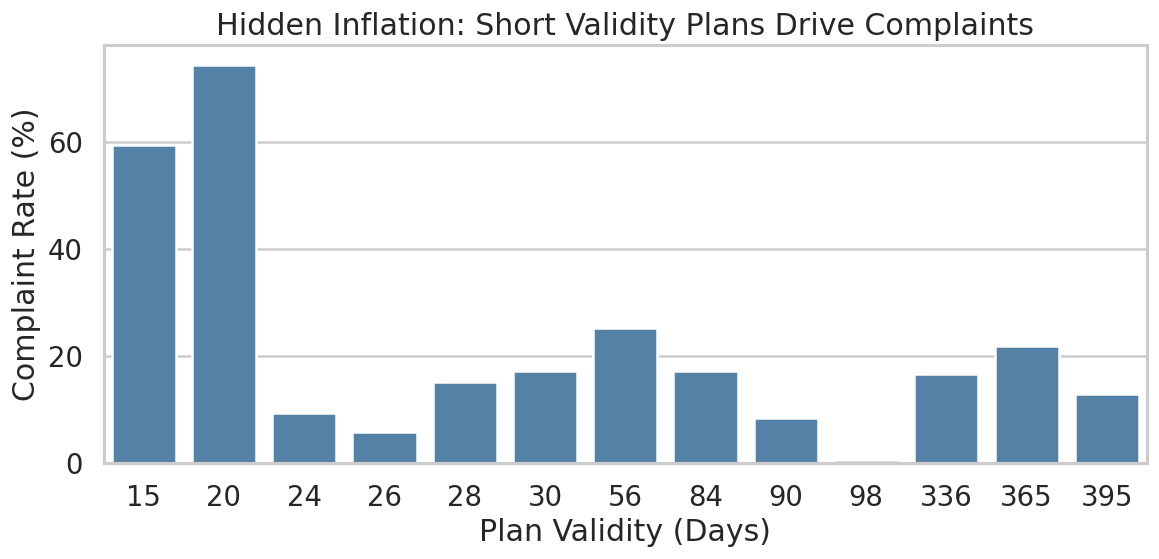

In [0]:
validity_cmp = (
    df.groupby('Plan_Validity_Days')['Has_Complaint']
      .mean()
      .mul(100)
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=validity_cmp,
    x='Plan_Validity_Days',
    y='Has_Complaint',
    color='steelblue'
)

plt.ylabel("Complaint Rate (%)")
plt.xlabel("Plan Validity (Days)")
plt.title("Hidden Inflation: Short Validity Plans Drive Complaints")
plt.tight_layout()
plt.show()

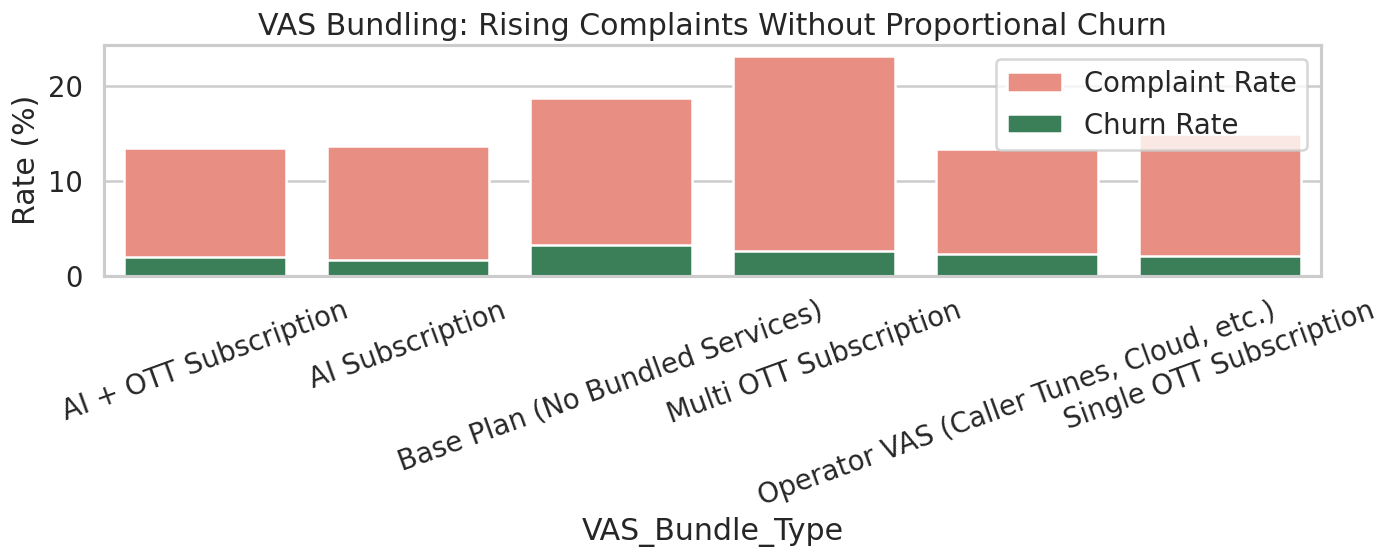

In [0]:
vas_cx = (
    df.groupby('VAS_Bundle_Type')[[
        'Has_Complaint',
        'Unwanted_VAS_Complaint',
        'Churn_Status'
    ]]
    .mean()
    .mul(100)
    .reset_index()
)

fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(
    data=vas_cx,
    x='VAS_Bundle_Type',
    y='Has_Complaint',
    color='salmon',
    ax=ax,
    label='Complaint Rate'
)

sns.barplot(
    data=vas_cx,
    x='VAS_Bundle_Type',
    y='Churn_Status',
    color='seagreen',
    ax=ax,
    label='Churn Rate'
)

plt.xticks(rotation=20)
plt.ylabel("Rate (%)")
plt.title("VAS Bundling: Rising Complaints Without Proportional Churn")
plt.legend()
plt.tight_layout()
plt.show()

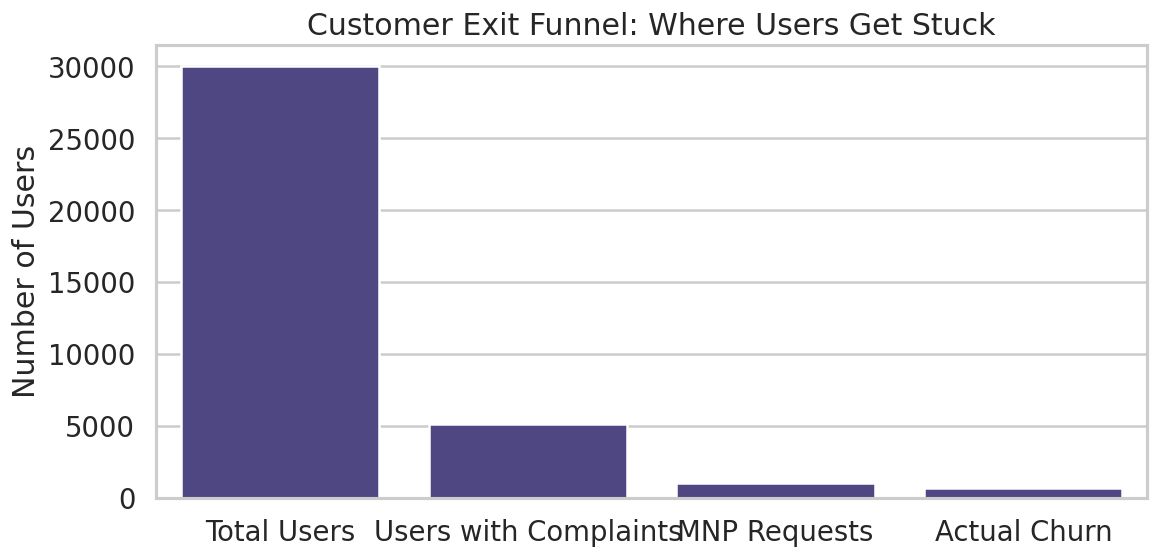

In [0]:
funnel = [
    len(df),
    df['Has_Complaint'].sum(),
    df['MNP_Request_Flag'].sum(),
    df['Churn_Status'].sum()
]

labels = [
    "Total Users",
    "Users with Complaints",
    "MNP Requests",
    "Actual Churn"
]

plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=funnel, color='darkslateblue')
plt.ylabel("Number of Users")
plt.title("Customer Exit Funnel: Where Users Get Stuck")
plt.tight_layout()
plt.show()

/home/spark-ddf5eba7-196a-4c1b-9523-a0/.ipykernel/2803/command-5080289518579199-3337473482:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Price_Bucket','Tenure_Bucket'])['Rejected']


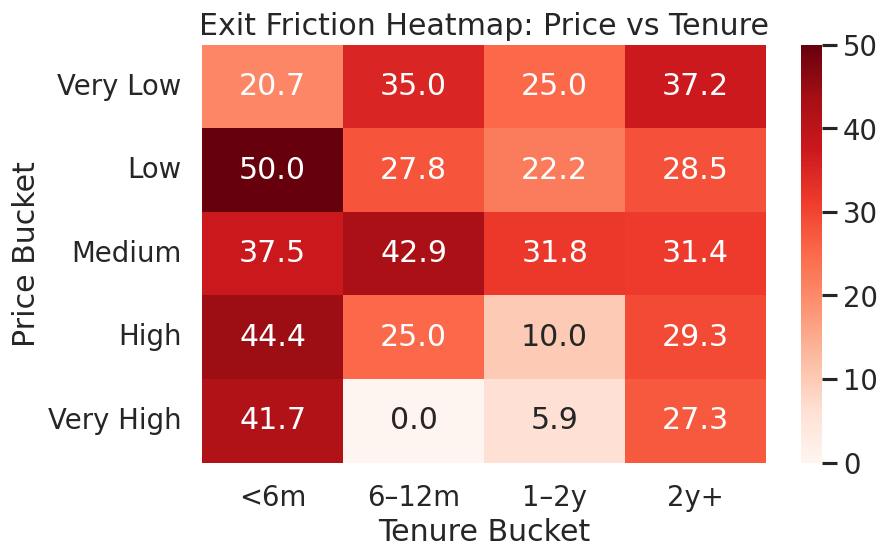

In [0]:
heat = (
    df[df['MNP_Request_Flag']==1]
      .assign(Rejected=lambda x: x['MNP_Rejection_Reason'].notna())
      .groupby(['Price_Bucket','Tenure_Bucket'])['Rejected']
      .mean()
      .mul(100)
      .unstack()
)

plt.figure(figsize=(8,5))
sns.heatmap(
    heat,
    annot=True,
    fmt=".1f",
    cmap='Reds'
)

plt.title("Exit Friction Heatmap: Price vs Tenure")
plt.ylabel("Price Bucket")
plt.xlabel("Tenure Bucket")
plt.tight_layout()
plt.show()

# Solutions
This section integrates the descriptive findings with the diagnostic insights and translates them into actionable solutions. Each issue is supported by the corresponding visual evidence generated in earlier sections.

## 1. Pricing vs Performance, The Premium Illusion
For Operators:
* Align premium pricing with **measurable QoS guarantees** (e.g., maximum call drop thresholds).
* Introduce **network-performance-linked rebates** for premium users.

For Regulator (TRAI):
* Mandate **price-to-performance disclosure** (₹/day vs median call drop & mute rate).
* Require operators to **publish QoS by price tier**, not just network-wide averages.

## 2. Network Quality, 5G as a Failure Multiplier
For Operators:
* Pause aggressive expansion in weak clusters and prioritise **handover stability**.
* Separate **marketing rollout from voice reliability certification**.

For Regulator:
* Introduce **5G voice-readiness certification** before mass marketing.
* Enforce reporting of **fallback frequency as a QoS metric**.

## 3. Hidden Inflation, Pricing Design as Customer Friction
For Operators:
* Offer **standardised 30/90/365-day plans** without artificial compression.
* Clearly communicate *effective daily cost* at point of sale.

For Regulator:
* Mandate disclosure of **effective daily price in plan advertisements**.
* Flag repeated short-validity recharges as a consumer protection concern.

## 4. VAS Bundling, Value Addition or Lock-In Strategy?
For Operators:
* Shift from *opt-out* to **explicit opt-in for all VAS**.
* Unbundle OTT and AI services from core connectivity pricing.

For Regulator:
* Enforce **separate consent and billing for VAS**.
* Penalise activation of chargeable services without explicit confirmation.

## 5. Exit Friction, Why Dissatisfied Customers Cannot Leave
For Operators:
* Simplify exit workflows; resolve dues automatically at port-out.
* Replace lock-in with **experience-based retention**.

For Regulator:
* Set **maximum MNP rejection thresholds**.
* Audit operators with abnormal rejection patterns.
* Introduce penalties for repeat exit obstruction.